In [2]:
 import pandas as pd

car_assignments = pd.read_csv('car-assignments.csv')
gps_data = pd.read_csv('gps.csv')
loyalty_data = pd.read_csv('loyalty_data.csv', encoding='ISO-8859-1') 
cc_data = pd.read_csv('cc_data.csv', encoding='ISO-8859-1')  

print("Car Assignments:")
print(car_assignments.head())

print("\nGPS Data:")
print(gps_data.head())

print("\nLoyalty Card Transactions:")
print(loyalty_data.head())

print("\nCredit/Debit Card Transactions:")
print(cc_data.head())


Car Assignments:
   LastName FirstName  CarID   CurrentEmploymentType CurrentEmploymentTitle
0   Alcazar     Lucas    1.0  Information Technology            IT Helpdesk
1     Azada      Lars    2.0             Engineering               Engineer
2     Balas     Felix    3.0             Engineering               Engineer
3  Barranco    Ingrid    4.0               Executive                SVP/CFO
4      Baza      Isak    5.0  Information Technology          IT Technician

GPS Data:
             Timestamp  id        lat       long
0  01/06/2014 06:28:01  35  36.076225  24.874689
1  01/06/2014 06:28:01  35  36.076220  24.874596
2  01/06/2014 06:28:03  35  36.076211  24.874443
3  01/06/2014 06:28:05  35  36.076217  24.874253
4  01/06/2014 06:28:06  35  36.076214  24.874167

Loyalty Card Transactions:
  timestamp             location  price FirstName  LastName
0  1/6/2014  Brew've Been Served   4.17  Cornelia      Lais
1  1/6/2014  Brew've Been Served   9.60       Mat    Bramar
2  1/6/2014   

In [3]:
def display_missing_values(df, df_name):
    print(f"Missing values in {df_name}:")
    print(df.isnull().sum())
    print("\n")
display_missing_values(car_assignments, 'Car Assignments')
display_missing_values(cc_data, 'Credit Card Data')
display_missing_values(gps_data, 'GPS Data')
display_missing_values(loyalty_data, 'Loyalty Data')


Missing values in Car Assignments:
LastName                  0
FirstName                 0
CarID                     9
CurrentEmploymentType     0
CurrentEmploymentTitle    0
dtype: int64


Missing values in Credit Card Data:
timestamp    0
location     0
price        0
FirstName    0
LastName     0
dtype: int64


Missing values in GPS Data:
Timestamp    0
id           0
lat          0
long         0
dtype: int64


Missing values in Loyalty Data:
timestamp    0
location     0
price        0
FirstName    0
LastName     0
dtype: int64




The missing values in the Car Assignments Dataset are for the truck drivers as they use company assigned trucks for business purposes

In [4]:
missing_car_id_employees = car_assignments[car_assignments['CarID'].isnull()]
employees_with_missing_car_id = missing_car_id_employees[['FirstName', 'LastName','CurrentEmploymentType','CurrentEmploymentTitle']]
employees_with_missing_car_id

FirstName   LastName CurrentEmploymentType CurrentEmploymentTitle
35    Albina      Hafon            Facilities           Truck Driver
36    Benito    Hawelon            Facilities           Truck Driver
37   Claudio    Hawelon            Facilities           Truck Driver
38      Henk       Mies            Facilities           Truck Driver
39   Valeria     Morlun            Facilities           Truck Driver
40      Adan     Morlun            Facilities           Truck Driver
41   Cecilia  Morluniau            Facilities           Truck Driver
42     Irene       Nant            Facilities           Truck Driver
43     Dylan   Scozzese            Facilities           Truck Driver

In [5]:
gps_data['Timestamp'] = pd.to_datetime(gps_data['Timestamp'])
gps_merged = pd.merge(gps_data, car_assignments, left_on='id', right_on='CarID')
gps_merged.head()


Timestamp  id        lat       long    LastName FirstName  CarID  \
0 2014-01-06 06:28:01  35  36.076225  24.874689  Vasco-Pais    Willem   35.0   
1 2014-01-06 06:28:01  35  36.076220  24.874596  Vasco-Pais    Willem   35.0   
2 2014-01-06 06:28:03  35  36.076211  24.874443  Vasco-Pais    Willem   35.0   
3 2014-01-06 06:28:05  35  36.076217  24.874253  Vasco-Pais    Willem   35.0   
4 2014-01-06 06:28:06  35  36.076214  24.874167  Vasco-Pais    Willem   35.0   

  CurrentEmploymentType        CurrentEmploymentTitle  
0             Executive  Environmental Safety Advisor  
1             Executive  Environmental Safety Advisor  
2             Executive  Environmental Safety Advisor  
3             Executive  Environmental Safety Advisor  
4             Executive  Environmental Safety Advisor

In [6]:
cc_data['timestamp'] = pd.to_datetime(cc_data['timestamp'], format='%m/%d/%Y %H:%M')
gps_data['Timestamp'] = pd.to_datetime(gps_data['Timestamp'], format='%m/%d/%Y %H:%M:%S')
cc_data.sort_values(by='timestamp', inplace=True)
gps_data.sort_values(by='Timestamp', inplace=True)
merged_cc = pd.merge(
    cc_data,
    car_assignments,
    left_on=['FirstName', 'LastName'],
    right_on=['FirstName', 'LastName'],
    how='left'
)
merged_cc


timestamp             location  price FirstName   LastName  \
0    2014-01-06 07:28:00  Brew've Been Served  11.34    Edvard       Vann   
1    2014-01-06 07:34:00     Hallowed Grounds  52.22    Hideki   Cocinaro   
2    2014-01-06 07:35:00  Brew've Been Served   8.33    Stenig      Fusil   
3    2014-01-06 07:36:00     Hallowed Grounds  16.72  Birgitta     Frente   
4    2014-01-06 07:37:00  Brew've Been Served   4.24      Sven     Flecha   
...                  ...                  ...    ...       ...        ...   
1486 2014-01-19 20:16:00          Guy's Gyros  37.48     Brand  Tempestad   
1487 2014-01-19 20:22:00      Katerinas Café  38.90  Birgitta     Frente   
1488 2014-01-19 20:25:00          Guy's Gyros  20.94    Loreto    Bodrogi   
1489 2014-01-19 20:30:00          Guy's Gyros  31.94     Minke       Mies   
1490 2014-01-19 20:51:00          Guy's Gyros  39.60     Felix    Resumir   

      CarID   CurrentEmploymentType  CurrentEmploymentTitle  
0      34.0                Security       Perimeter Control  
1      12.0                Security            Site Control  
2      20.0                Security        Building Control  
3      18.0             Engineering               Geologist  
4      17.0  Information Technology           IT Technician  
...     ...                     ...                     ...  
1486   33.0             Engineering        Drill Technician  
1487   18.0             Engineering               Geologist  
1488   15.0                Security            Site Control  
1489   24.0                Security       Perimeter Control  
1490   30.0                Security  Security Group Manager  

[1491 rows x 8 columns]

In [7]:
unique_locations = pd.concat([
    merged_cc['location']
]).unique()
print(unique_locations)

["Brew've Been Served" 'Hallowed Grounds' 'Coffee Cameleon'
 'Abila Airport' 'Kronos Pipe and Irrigation' 'Nationwide Refinery'
 'Maximum Iron and Steel' 'Stewart and Sons Fabrication'
 'Carlyle Chemical Inc.' 'Bean There Done That' 'Brewed Awakenings'
 "Jack's Magical Beans" 'Coffee Shack' 'Katerina\x92s Café' 'Hippokampos'
 'Abila Zacharo' 'Kalami Kafenion' 'Gelatogalore' 'Ouzeri Elian'
 "Guy's Gyros" 'U-Pump' "Frydos Autosupply n' More"
 "Albert's Fine Clothing" "Shoppers' Delight" 'Abila Scrapyard'
 "Frank's Fuel" 'Chostus Hotel' 'General Grocer' 'Kronos Mart'
 "Octavio's Office Supplies" 'Roberts and Sons' 'Ahaggo Museum'
 'Desafio Golf Course' 'Daily Dealz']


In [8]:
def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

merged_cc['time_of_day'] = merged_cc['timestamp'].apply(categorize_time_of_day)

pivot_table = pd.pivot_table(
    merged_cc,
    values='timestamp',
    index=['CurrentEmploymentType', 'time_of_day'],
    columns='location',
    aggfunc='count',
    fill_value=0
)

pivot_table

location                            Abila Airport  Abila Scrapyard  \
CurrentEmploymentType  time_of_day                                   
Engineering            afternoon                0                0   
                       evening                  0                0   
                       morning                  0                0   
                       night                    0                0   
Executive              afternoon                0                0   
                       evening                  0                0   
                       morning                  0                0   
                       night                    0                0   
Facilities             afternoon               19                4   
                       evening                  0                0   
                       morning                  6                0   
                       night                    0                0   
Information Technology afternoon                0                0   
                       evening                  0                0   
                       morning                  0                0   
                       night                    0                0   
Security               afternoon                0                0   
                       evening                  0                0   
                       morning                  0                0   
                       night                    0                0   

location                            Abila Zacharo  Ahaggo Museum  \
CurrentEmploymentType  time_of_day                                 
Engineering            afternoon               19              1   
                       evening                  0              1   
                       morning                  0              0   
                       night                    0              0   
Executive              afternoon                8              0   
                       evening                  0              0   
                       morning                  0              0   
                       night                    0              0   
Facilities             afternoon                2              0   
                       evening                  0              0   
                       morning                  0              0   
                       night                    0              0   
Information Technology afternoon                8              1   
                       evening                  0              0   
                       morning                  0              0   
                       night                    0              0   
Security               afternoon               24              3   
                       evening                  1              0   
                       morning                  0              0   
                       night                    0              0   

location                            Albert's Fine Clothing  \
CurrentEmploymentType  time_of_day                           
Engineering            afternoon                         3   
                       evening                           8   
                       morning                           0   
                       night                             0   
Executive              afternoon                         0   
                       evening                           3   
                       morning                           0   
                       night                             1   
Facilities             afternoon                         0   
                       evening                           0   
                       morning                           0   
                       night                             0   
Information Technology afternoon                         0   
                       evening  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3529626202.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_daily_routines_heatmap.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


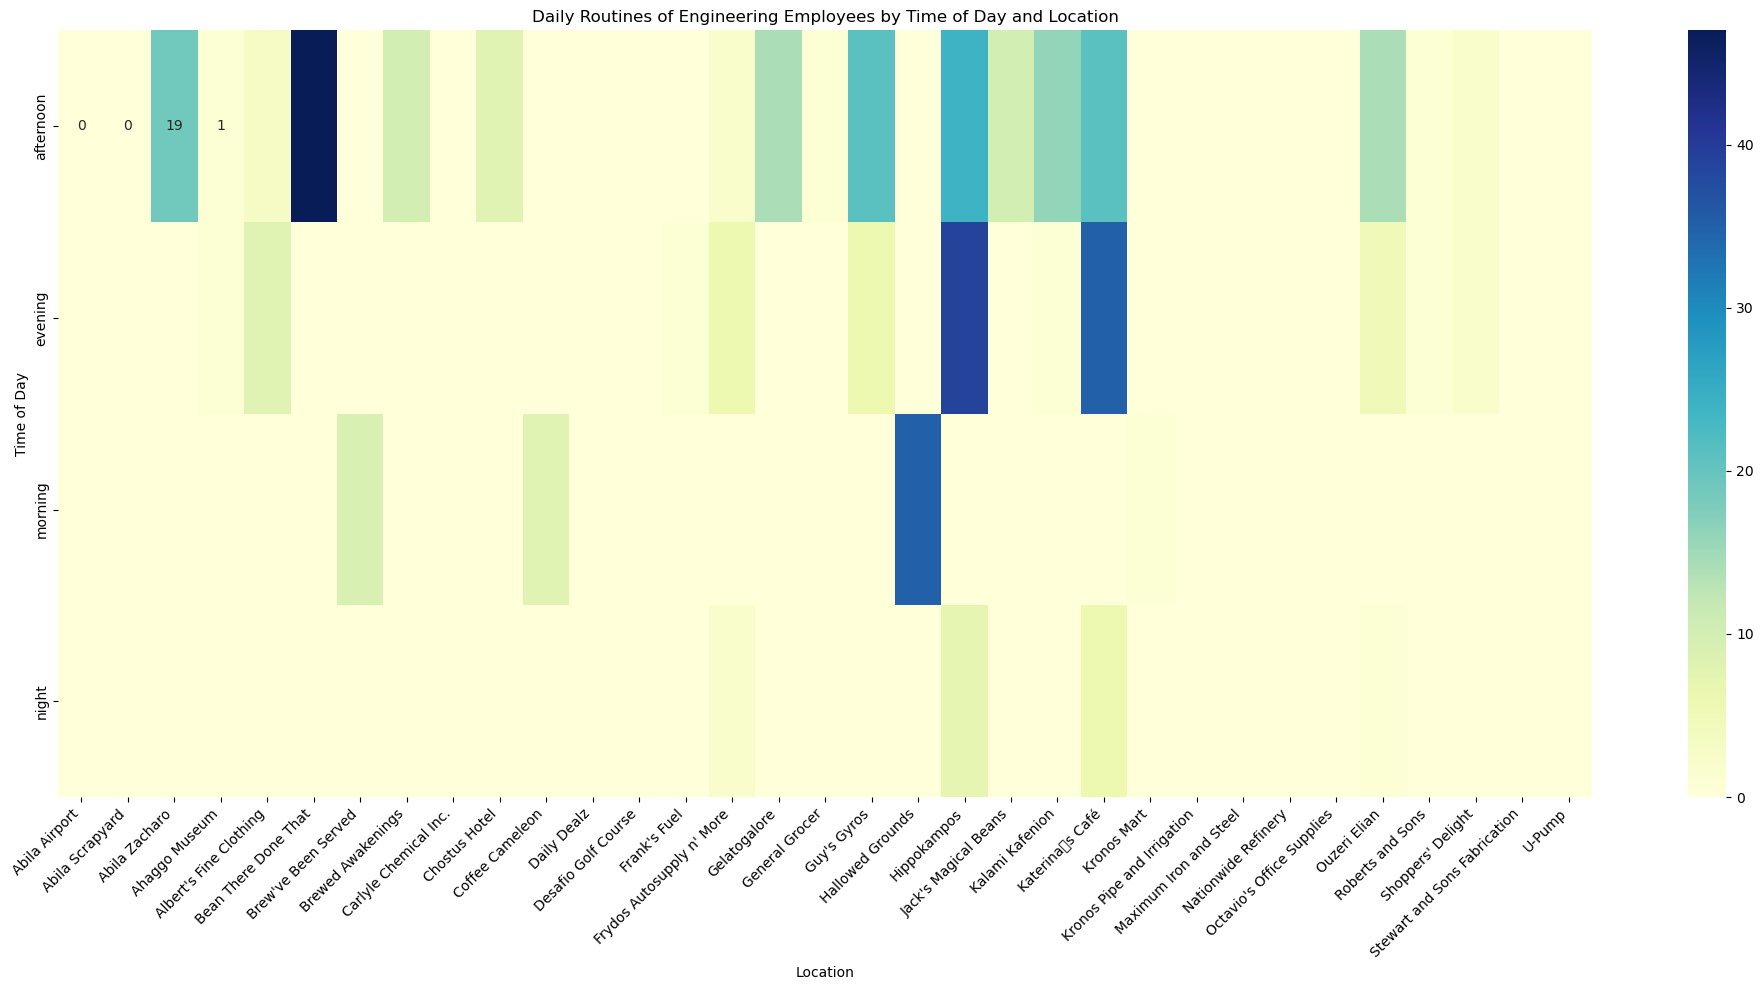

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3529626202.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_daily_routines_heatmap.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


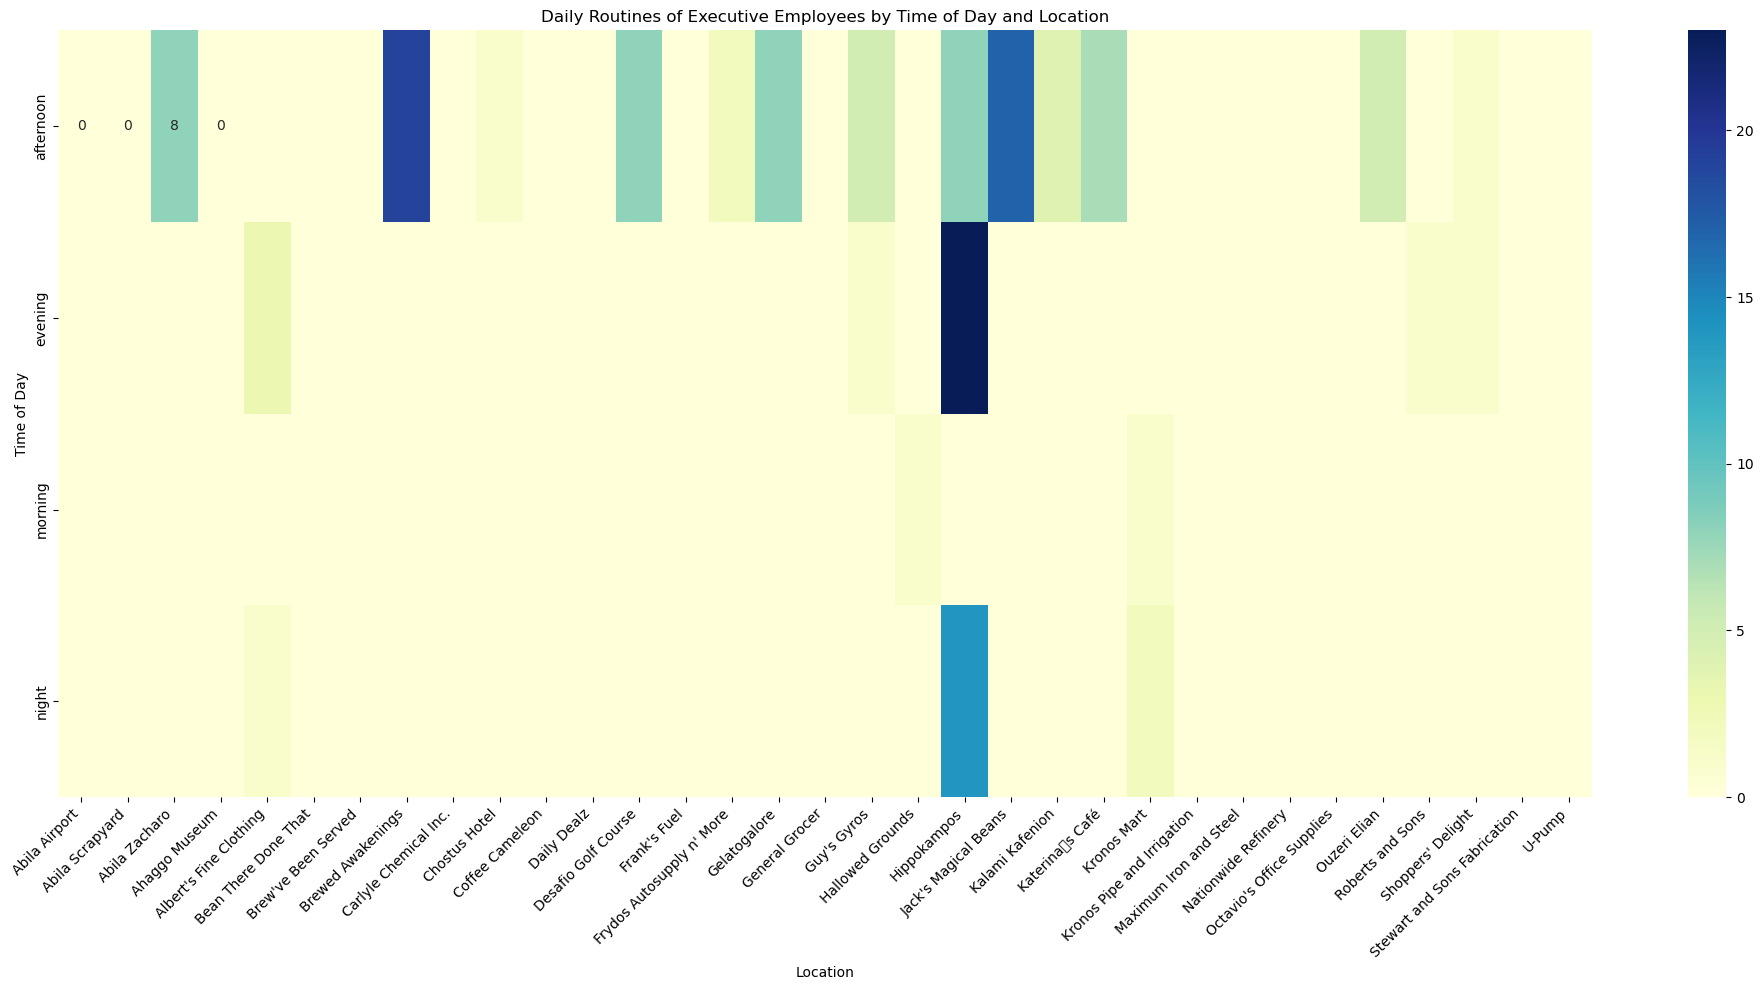

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3529626202.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_daily_routines_heatmap.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


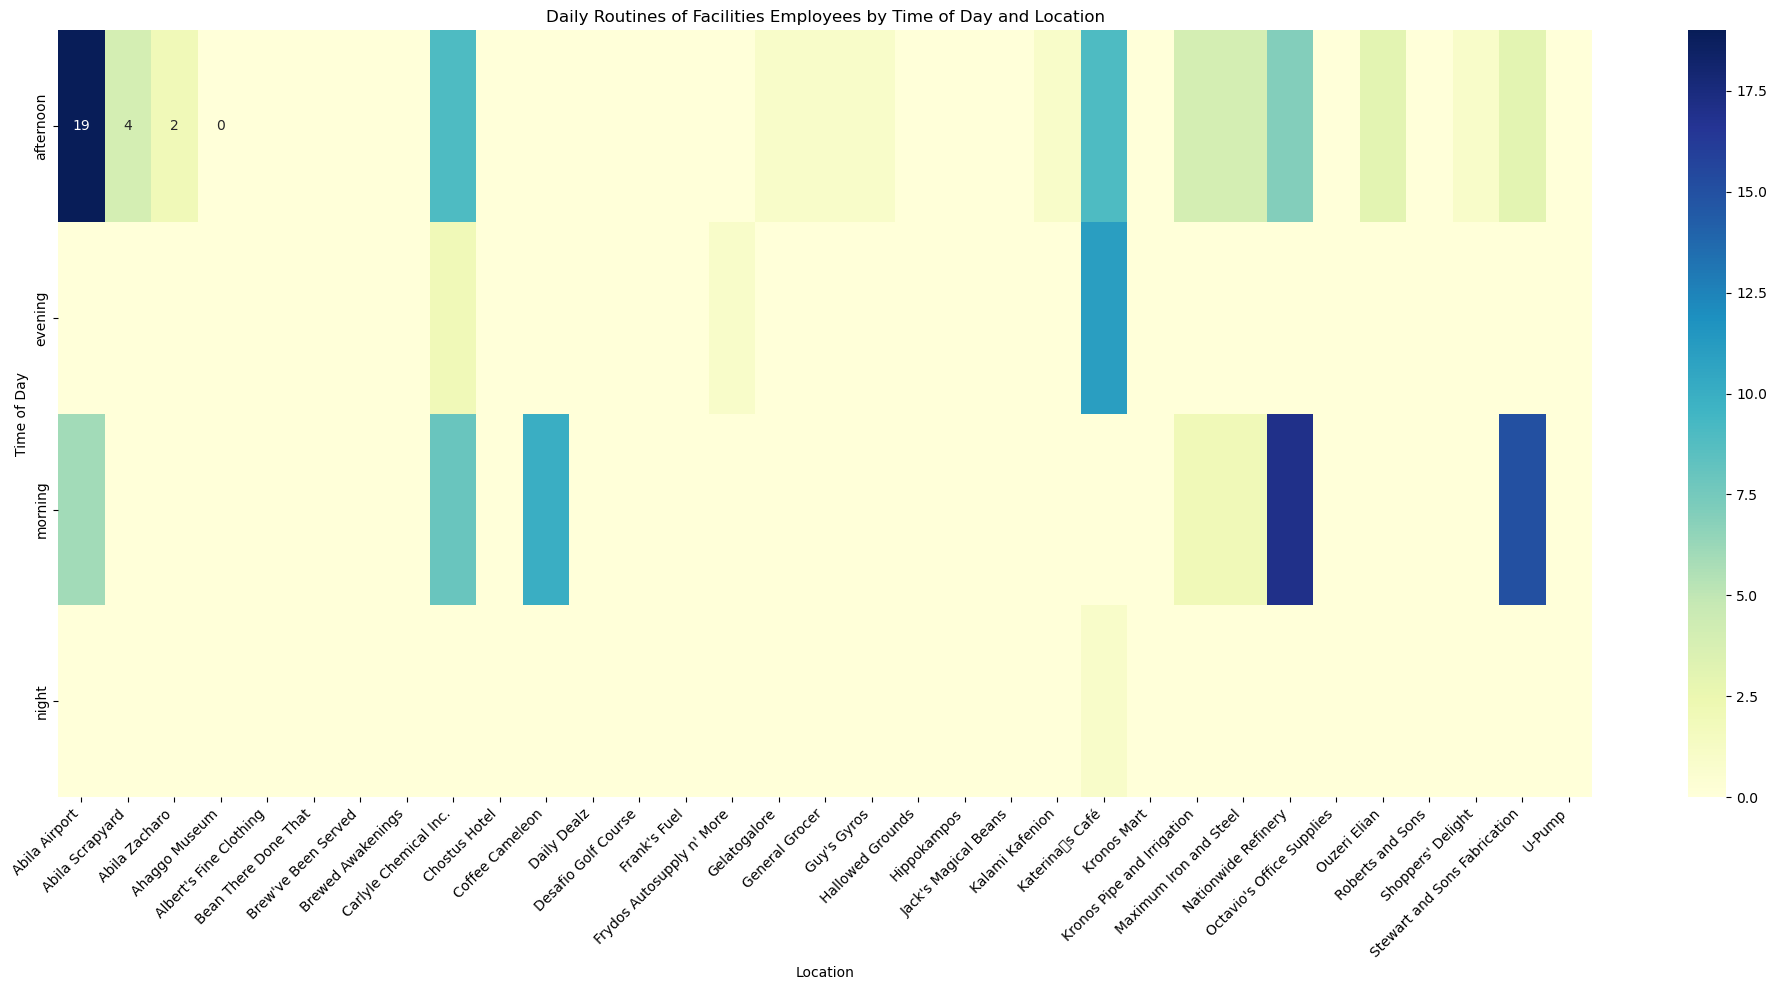

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3529626202.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_daily_routines_heatmap.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


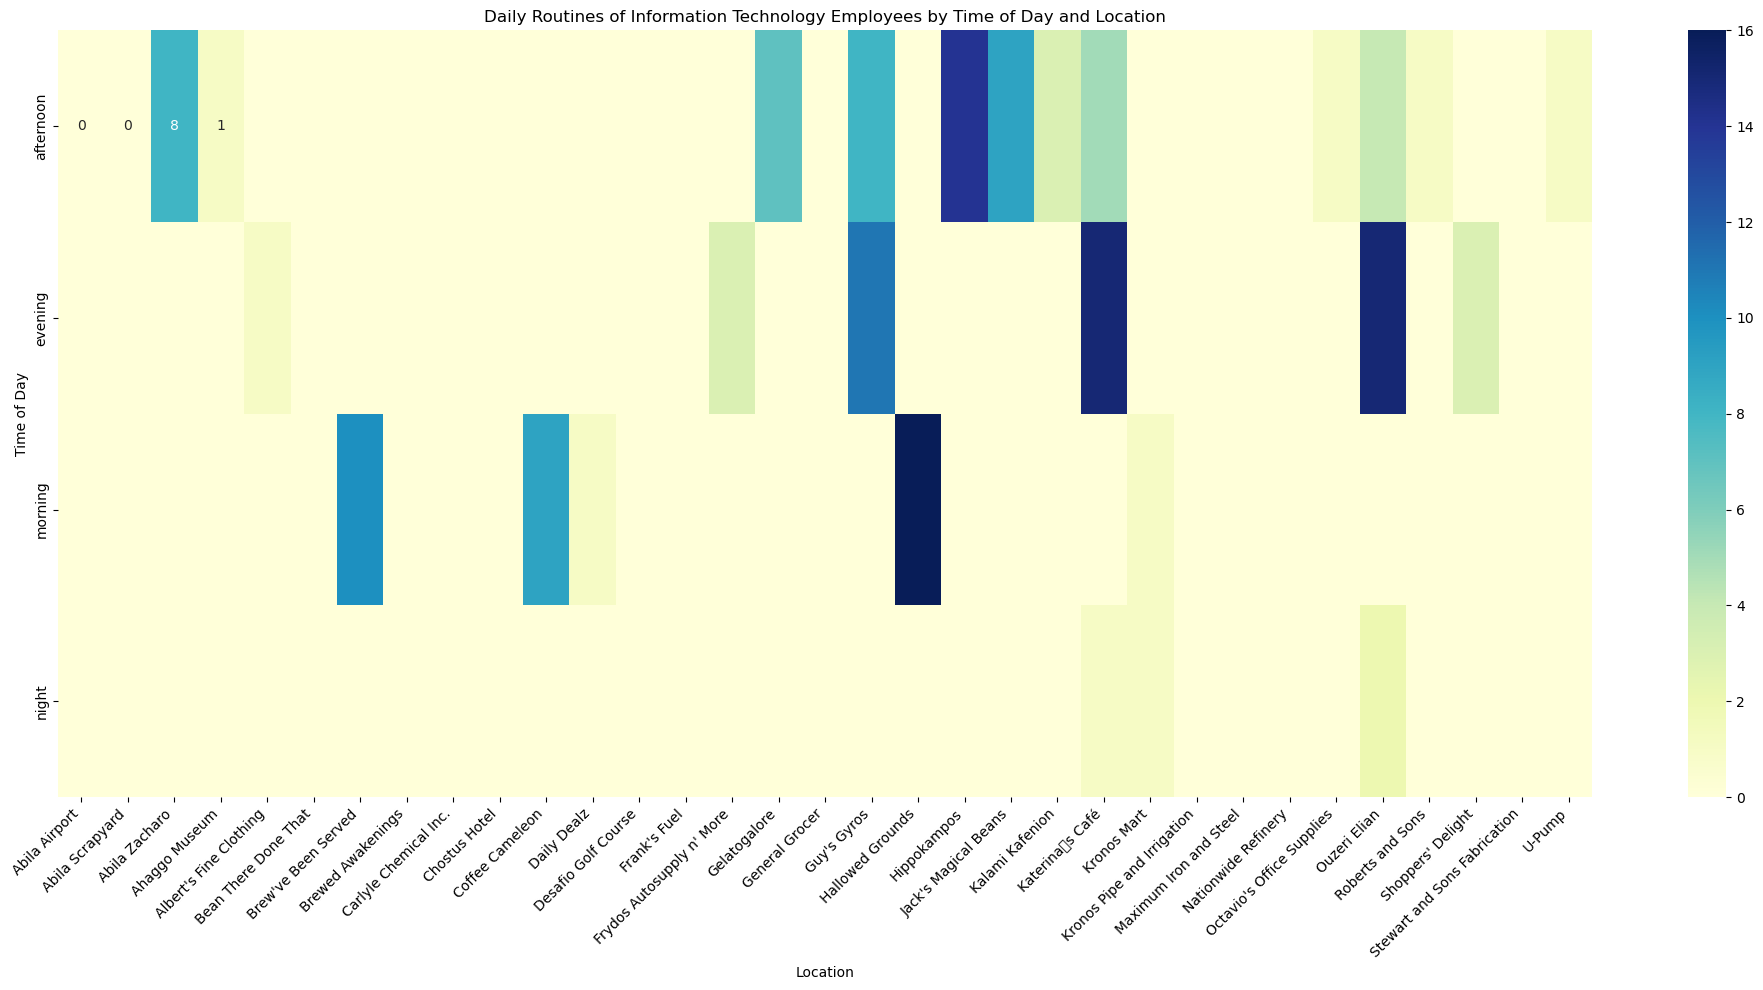

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3529626202.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_daily_routines_heatmap.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


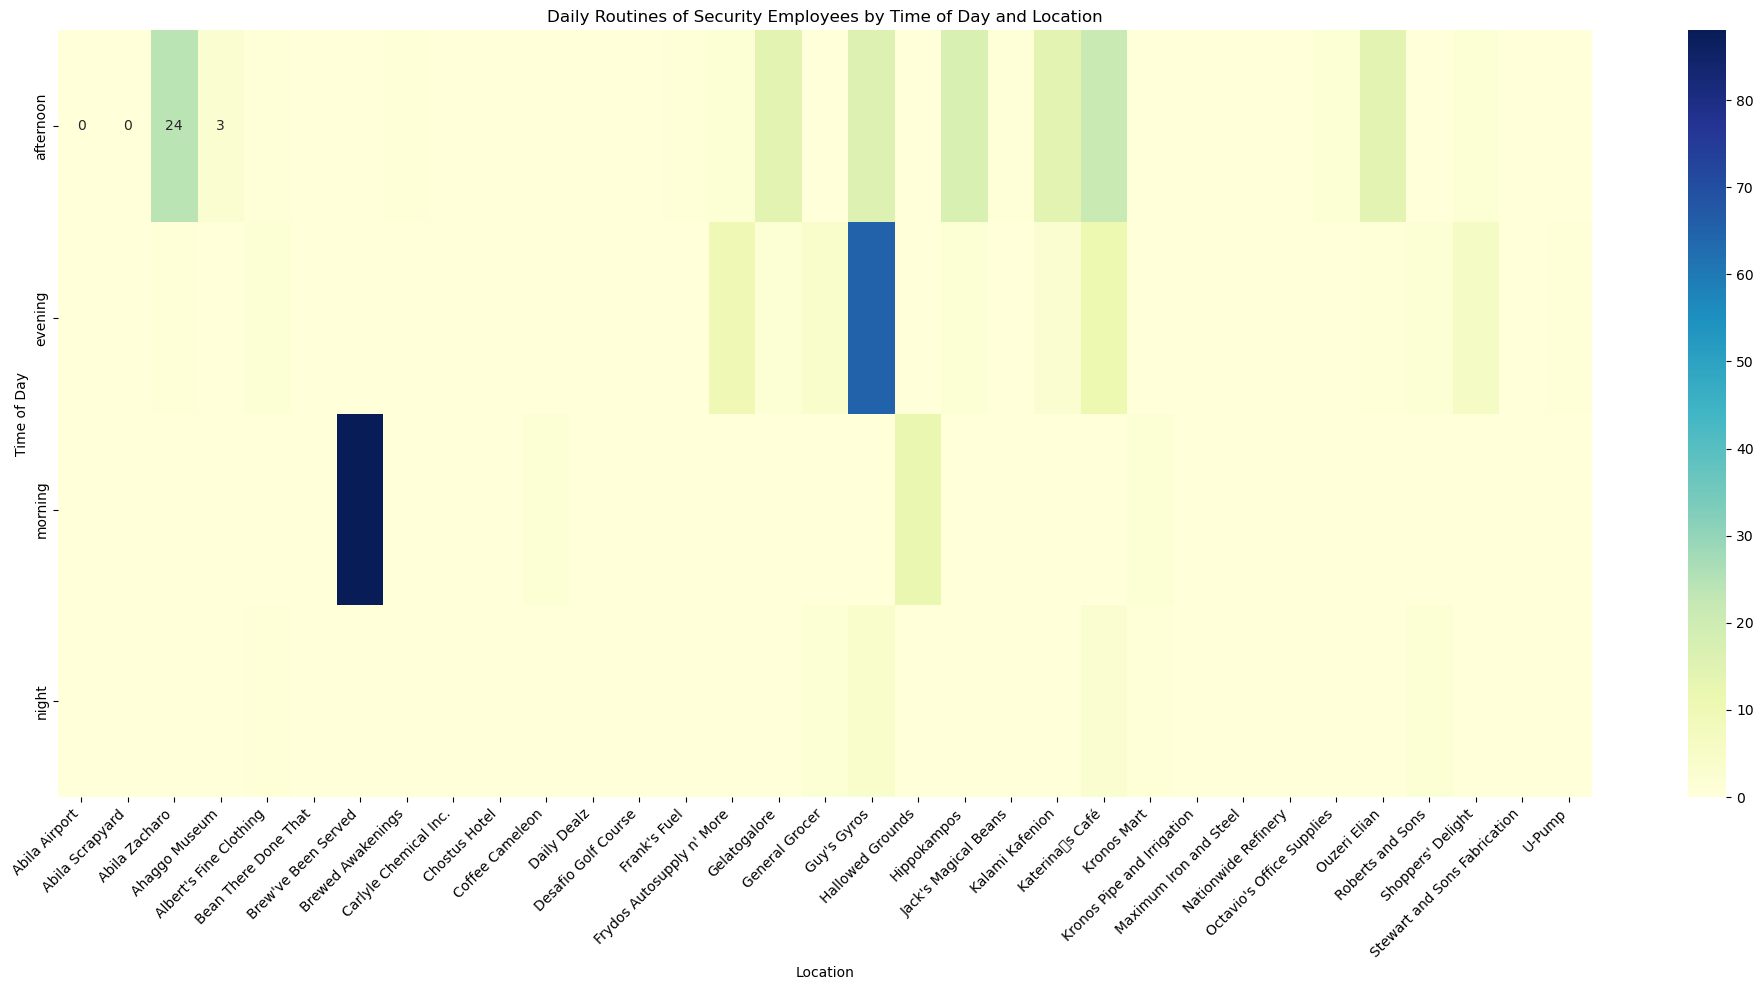

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
employment_types = pivot_table.index.get_level_values(0).unique()

for employment_type in employment_types:
    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot_table.loc[employment_type], cmap='YlGnBu', annot=True, fmt='d')
    plt.title(f'Daily Routines of {employment_type} Employees by Time of Day and Location')
    plt.xlabel('Location')
    plt.ylabel('Time of Day')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{employment_type}_daily_routines_heatmap.png')
    plt.show()

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:18: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_average_daily_spending.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


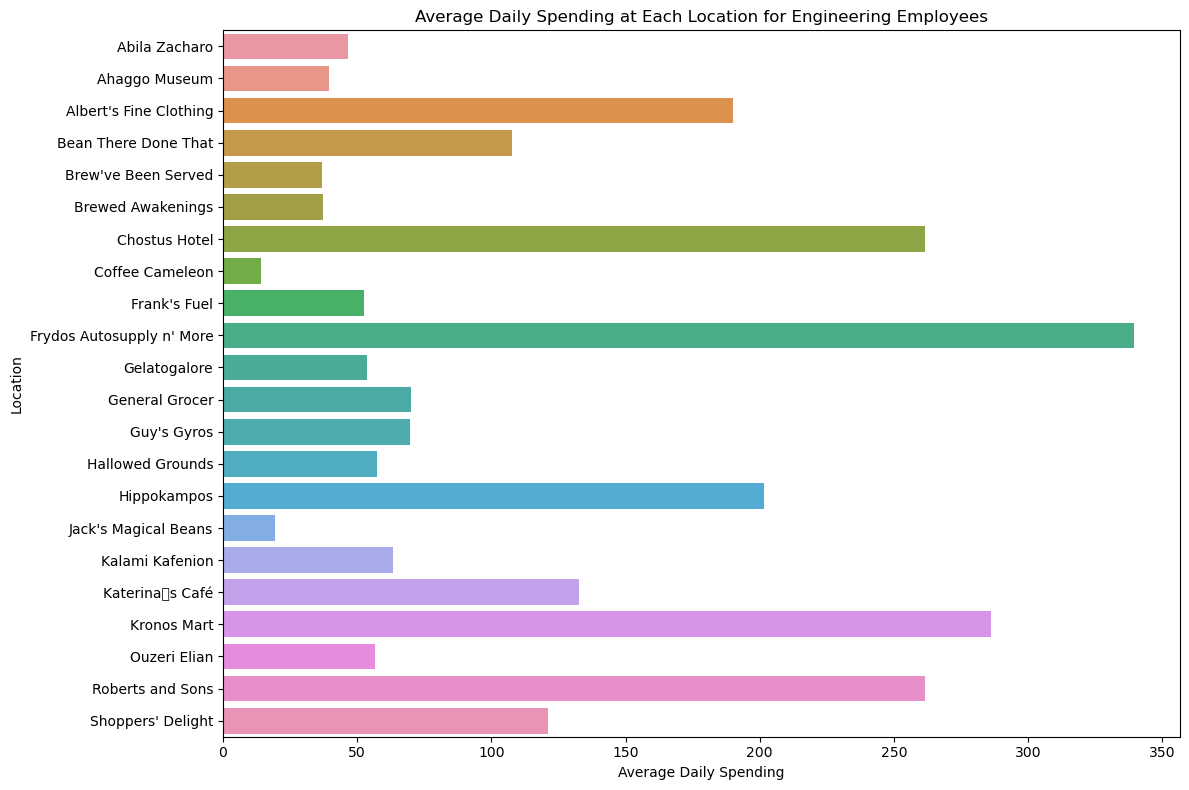

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:18: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_average_daily_spending.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


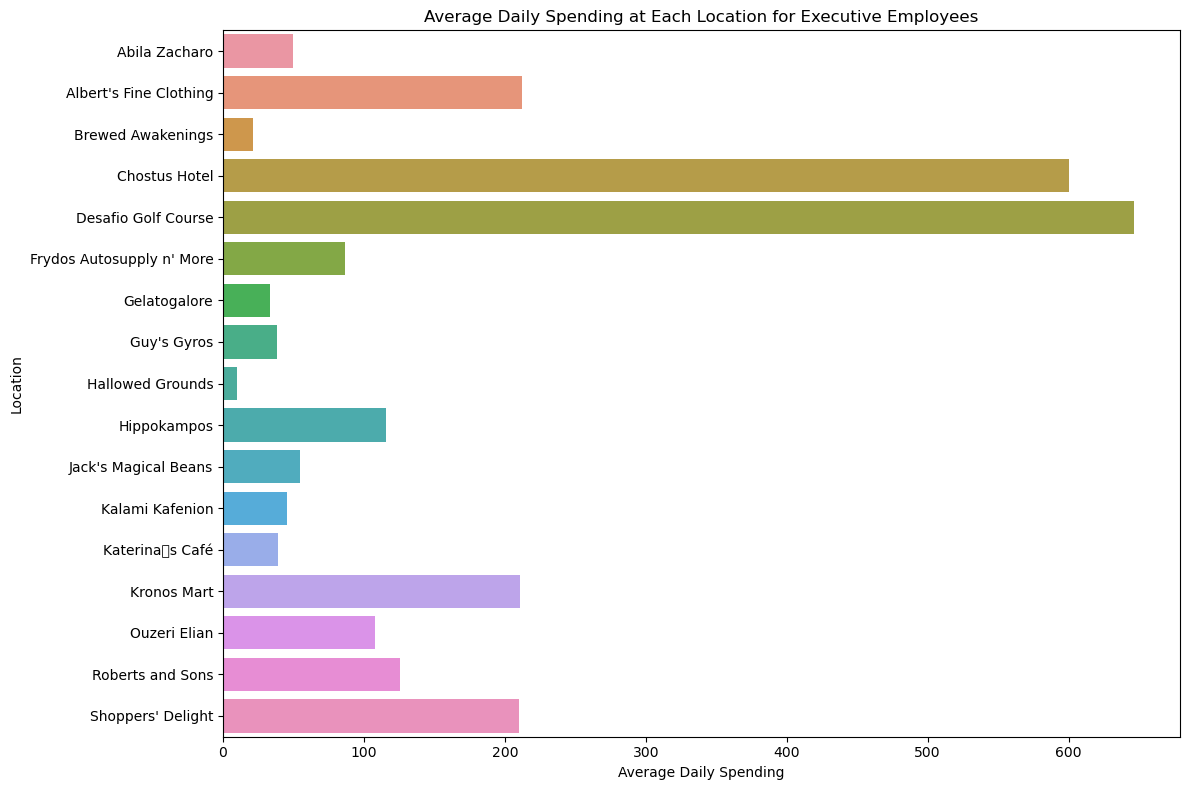

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:18: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_average_daily_spending.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


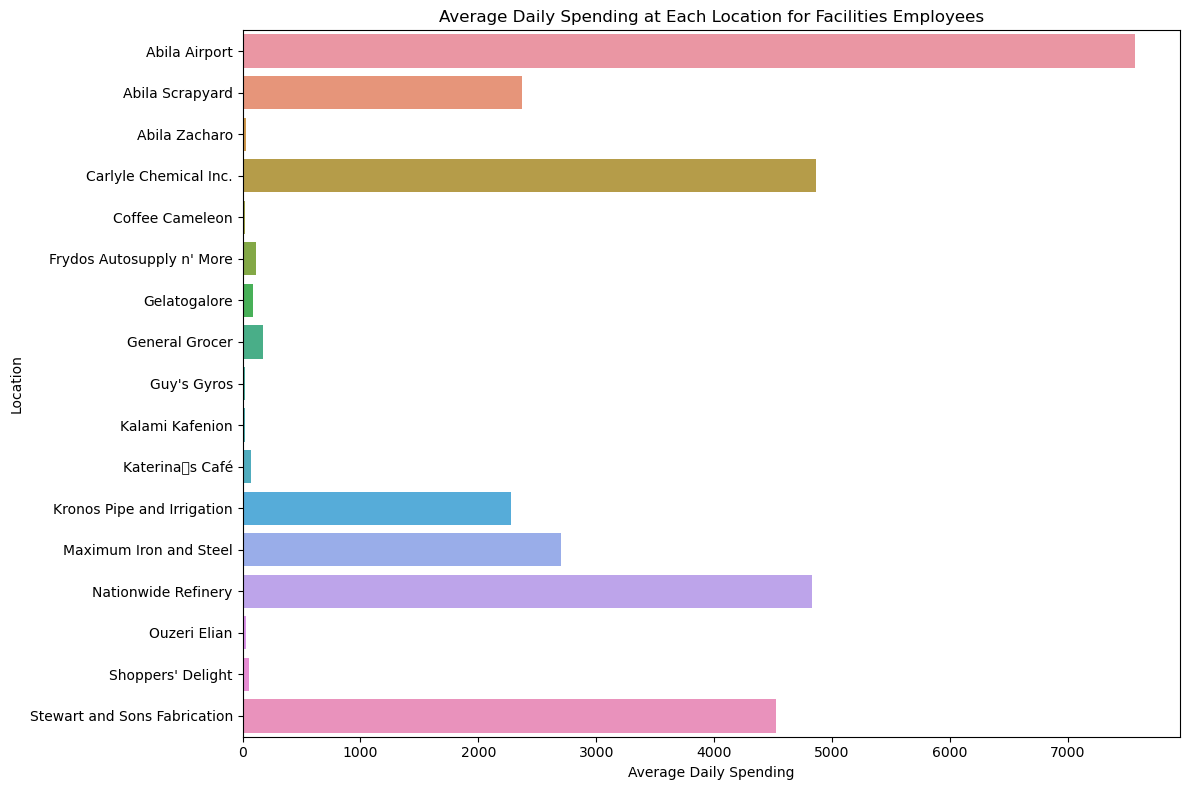

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:18: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_average_daily_spending.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


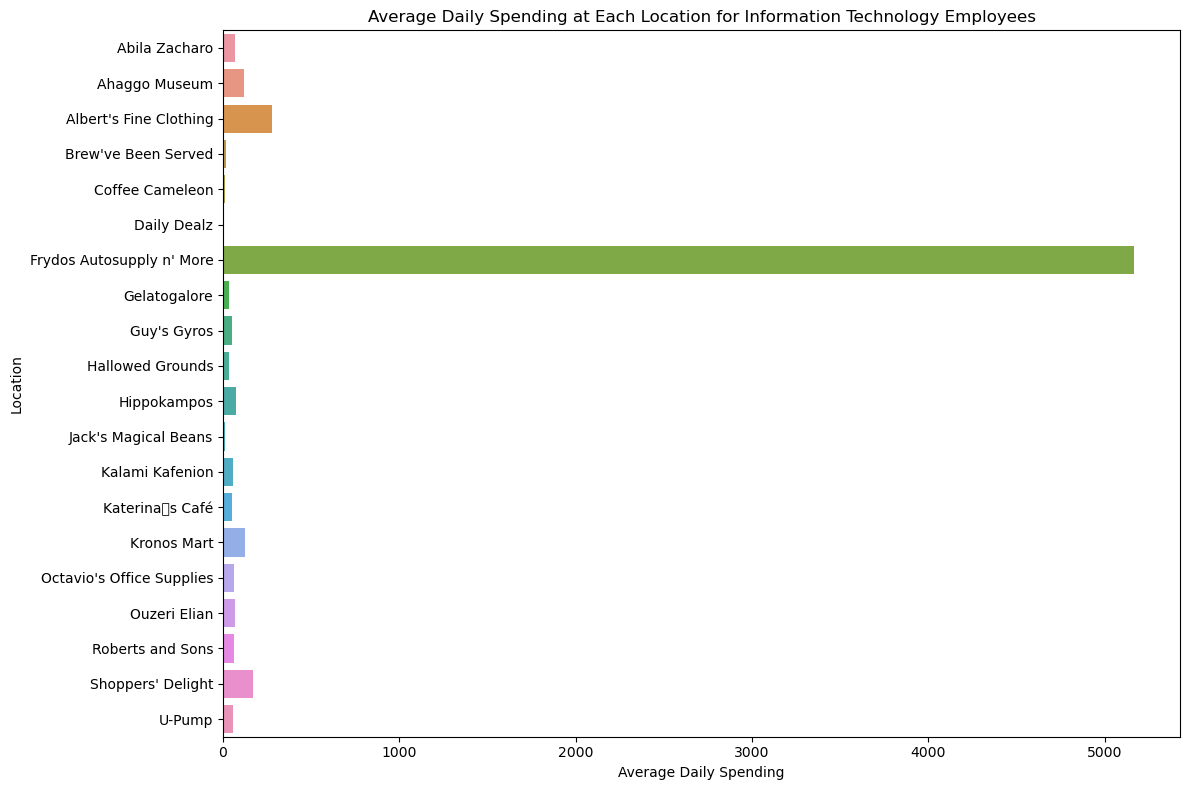

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:18: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1655928667.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'{employment_type}_average_daily_spending.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


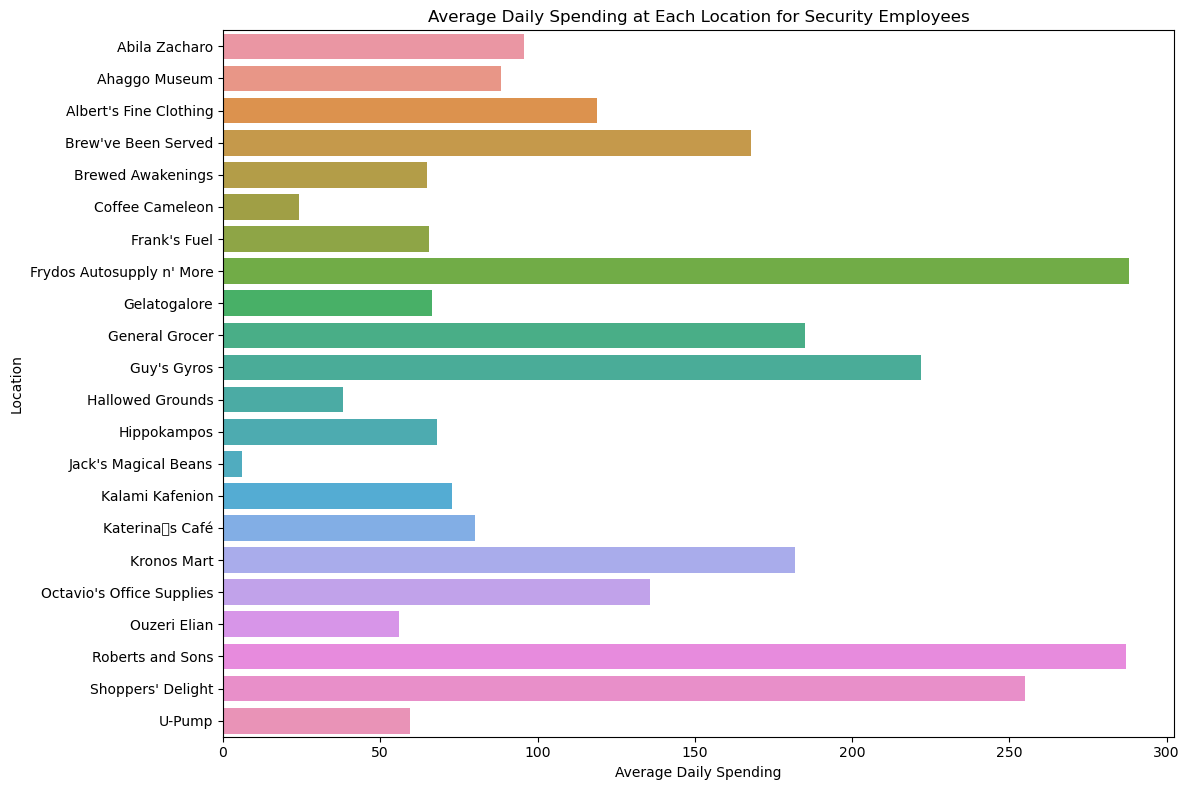

In [10]:
merged_cc['date'] = merged_cc['timestamp'].dt.date

daily_spending = merged_cc.groupby(['CurrentEmploymentType', 'date', 'location'])['price'].sum().reset_index()

average_daily_spending = daily_spending.groupby(['CurrentEmploymentType', 'location'])['price'].mean().reset_index()

average_daily_spending.columns = ['EmploymentType', 'Location', 'AverageDailySpending']

employment_types = average_daily_spending['EmploymentType'].unique()

for employment_type in employment_types:
    data = average_daily_spending[average_daily_spending['EmploymentType'] == employment_type]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='AverageDailySpending', y='Location', data=data)
    plt.title(f'Average Daily Spending at Each Location for {employment_type} Employees')
    plt.xlabel('Average Daily Spending')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.savefig(f'{employment_type}_average_daily_spending.png')
    plt.show()

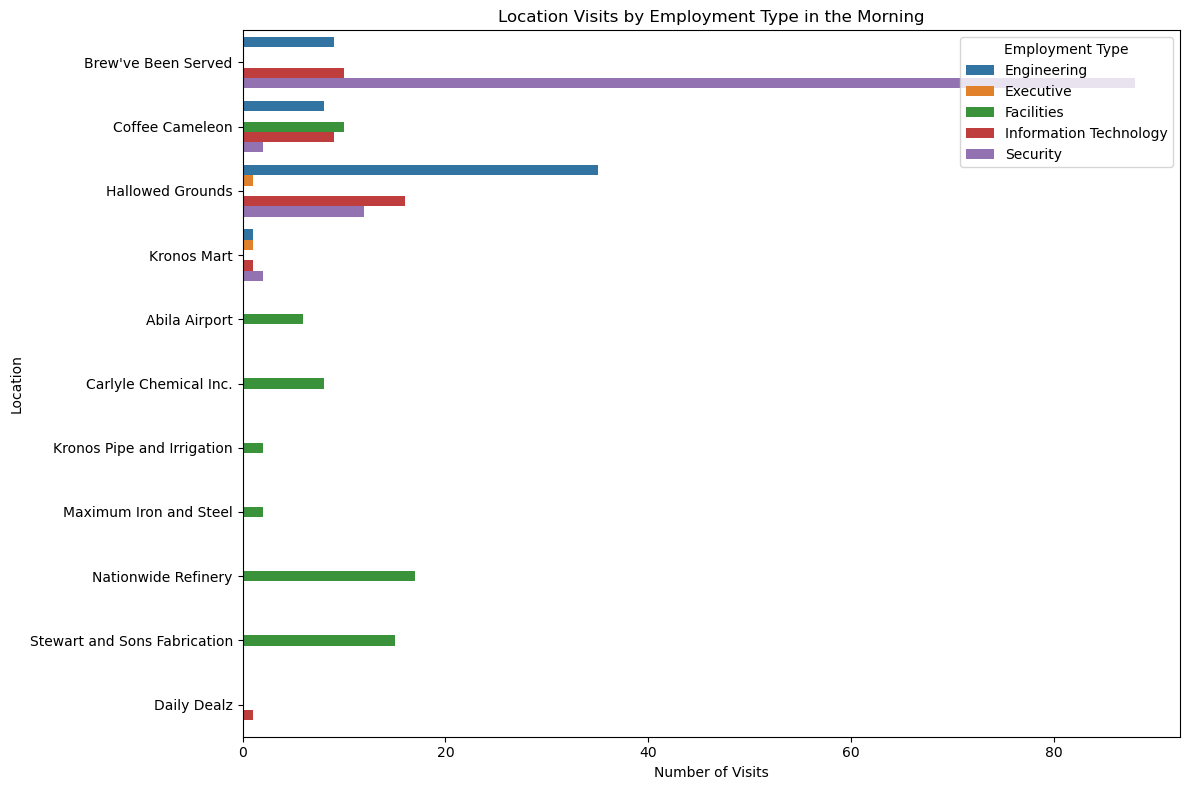

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'location_visits_{period}.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


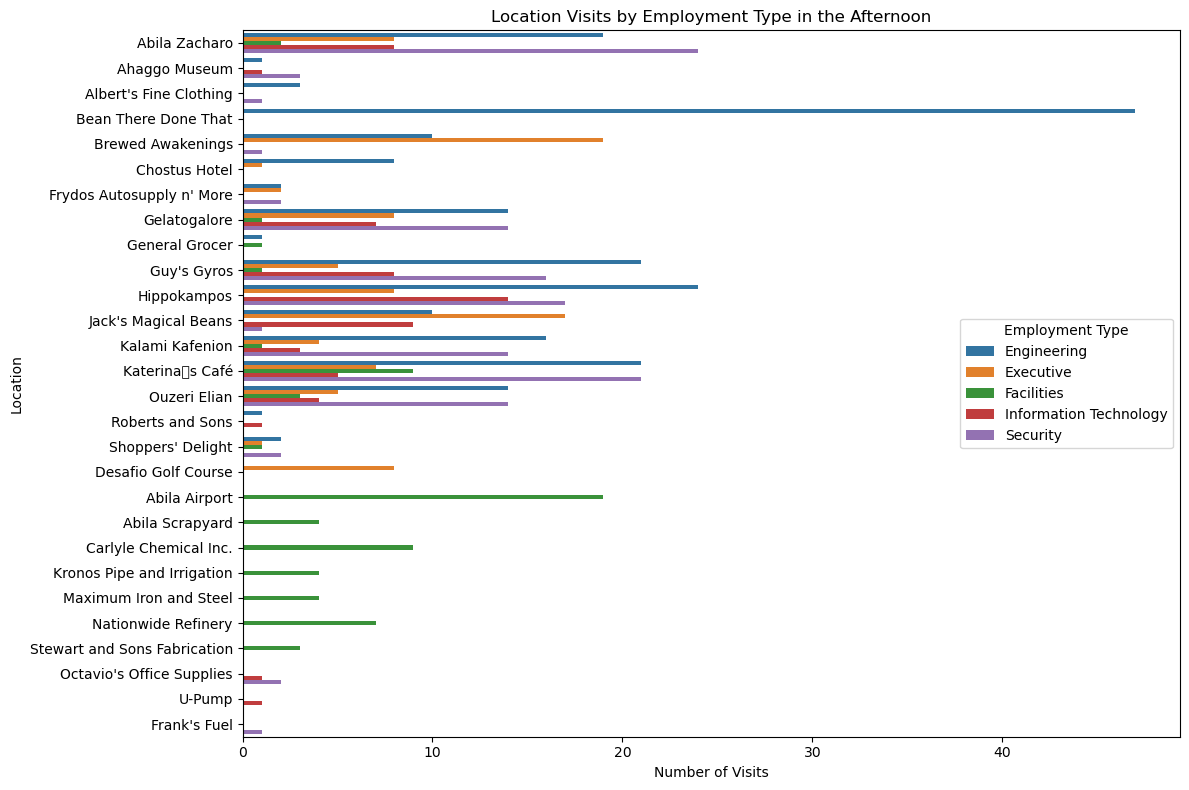

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'location_visits_{period}.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


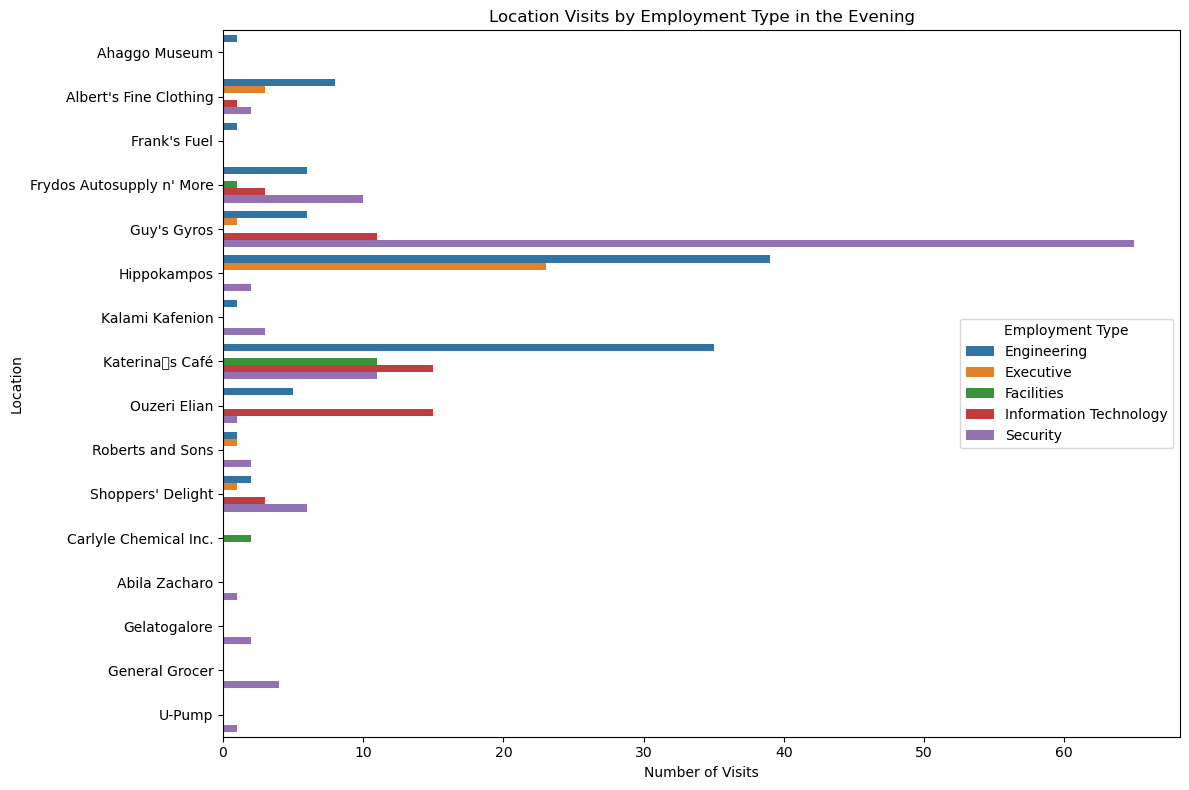

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'location_visits_{period}.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


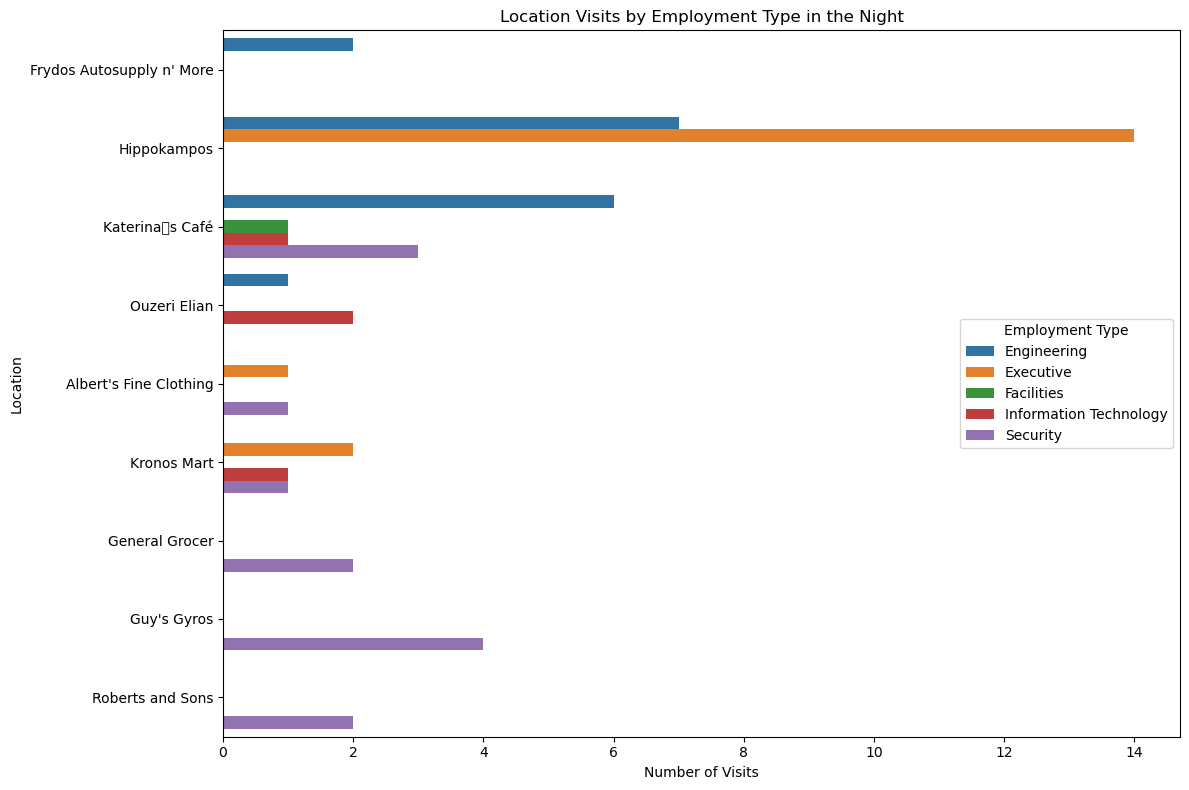

In [11]:
location_counts = merged_cc.groupby(['CurrentEmploymentType', 'time_of_day', 'location']).size().reset_index(name='count')

time_of_day_periods = ['morning', 'afternoon', 'evening', 'night']

for period in time_of_day_periods:
    plt.figure(figsize=(12, 8))
    data = location_counts[location_counts['time_of_day'] == period]
    sns.barplot(x='count', y='location', hue='CurrentEmploymentType', data=data)
    plt.title(f'Location Visits by Employment Type in the {period.capitalize()}')
    plt.xlabel('Number of Visits')
    plt.ylabel('Location')
    plt.legend(title='Employment Type')
    plt.tight_layout()
    plt.savefig(f'location_visits_{period}.png')
    plt.show()

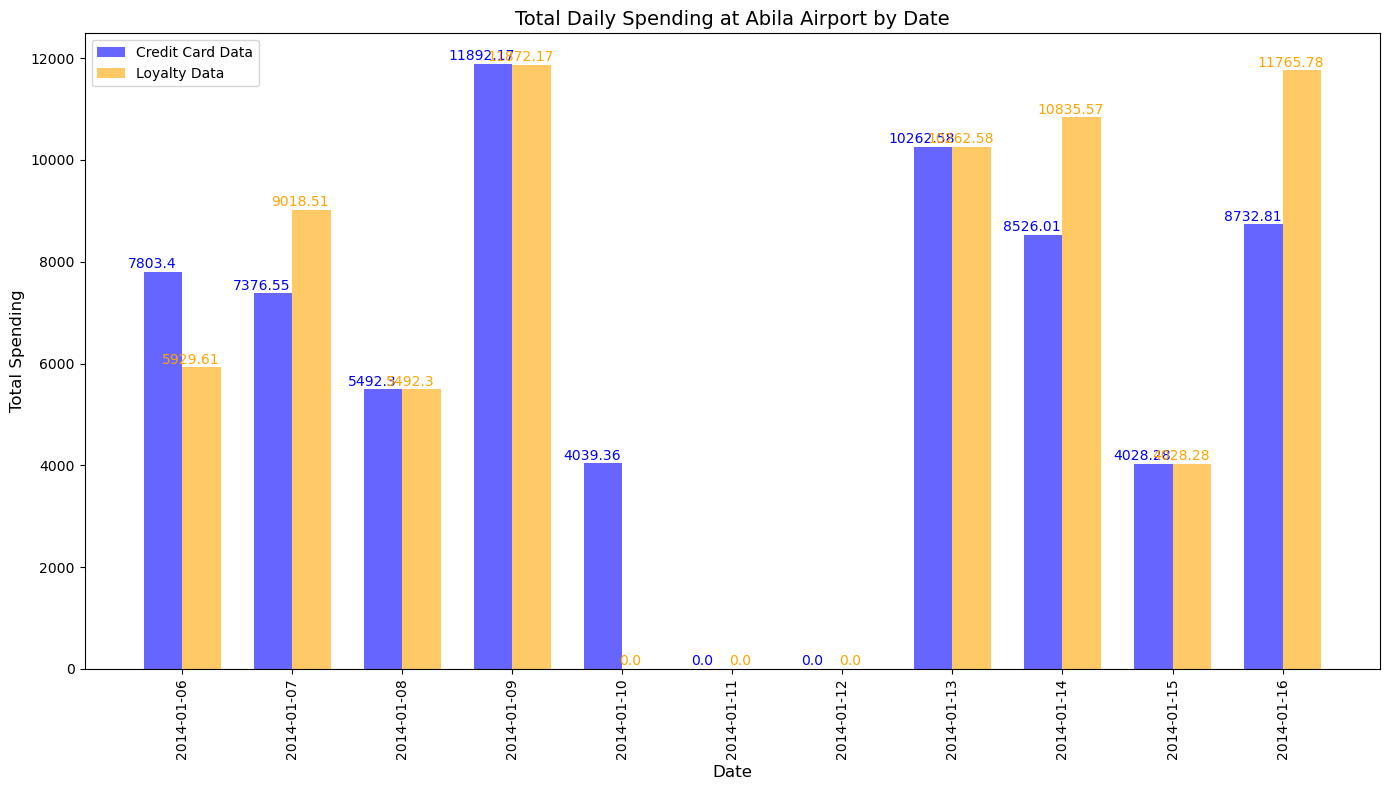

<Figure size 640x480 with 0 Axes>

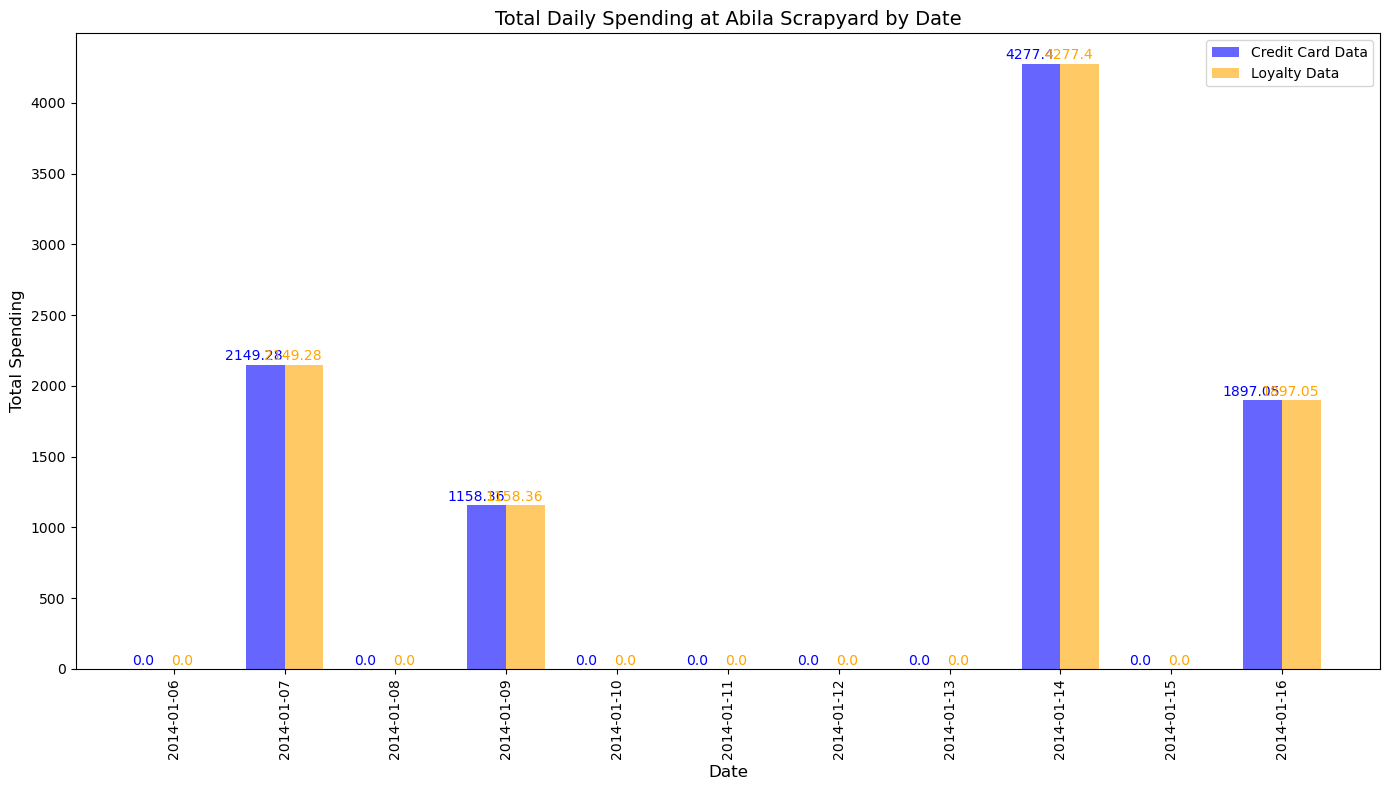

<Figure size 640x480 with 0 Axes>

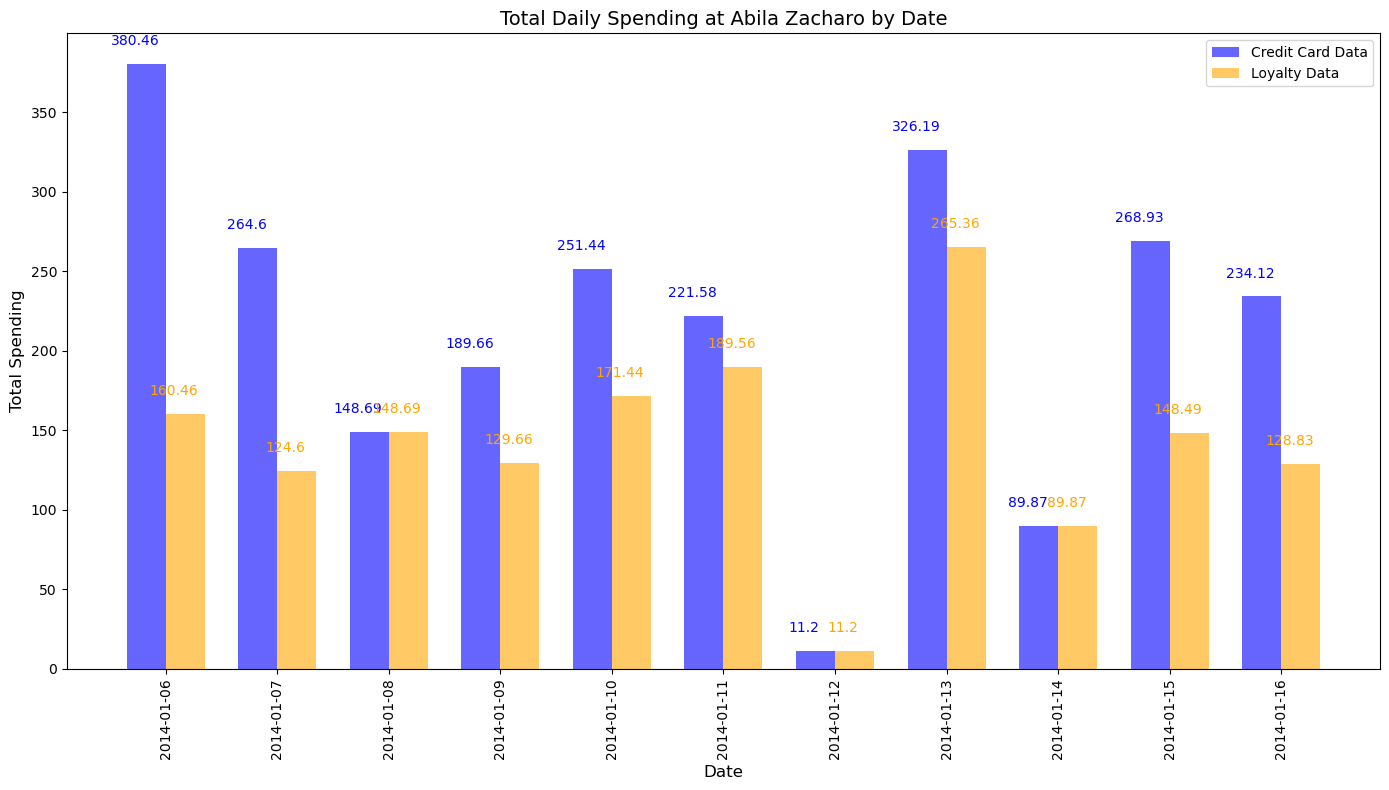

<Figure size 640x480 with 0 Axes>

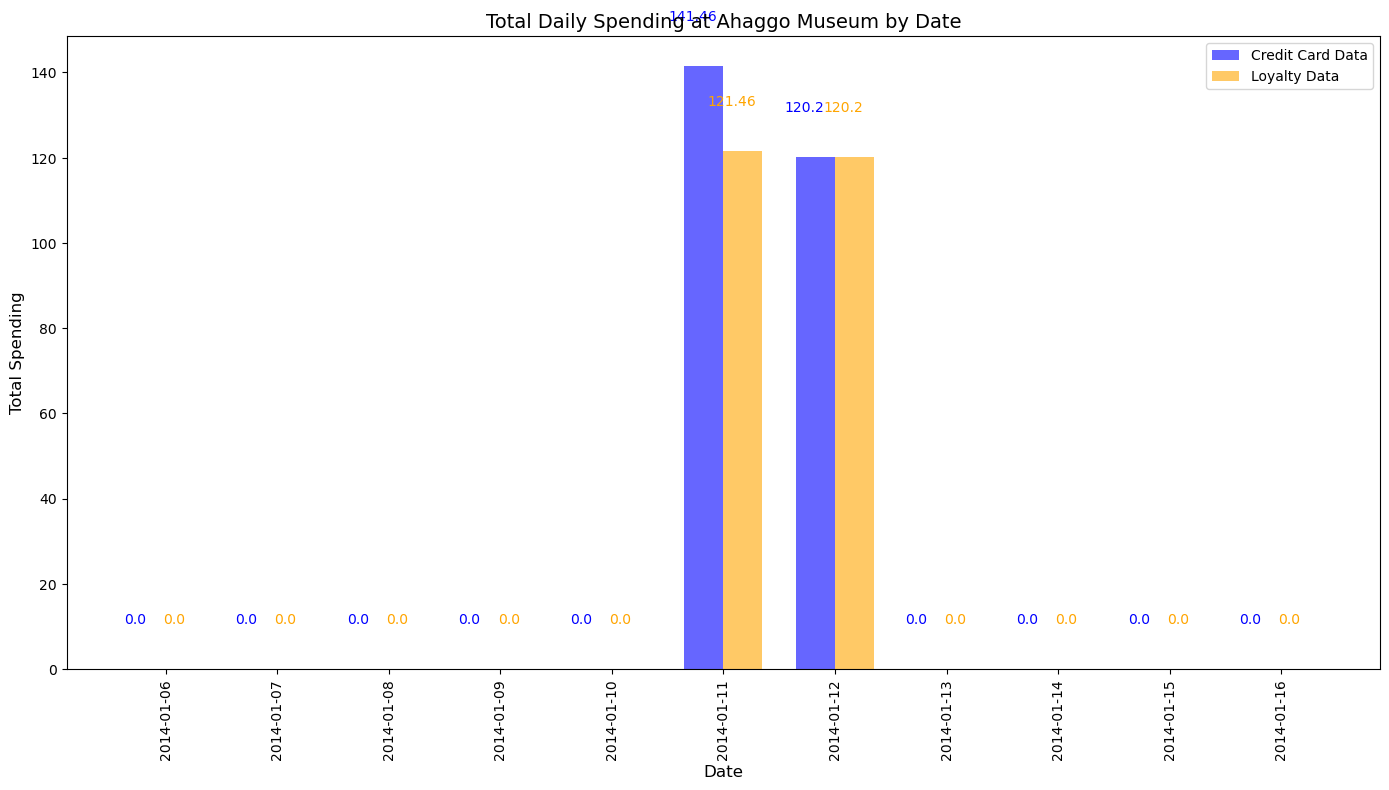

<Figure size 640x480 with 0 Axes>

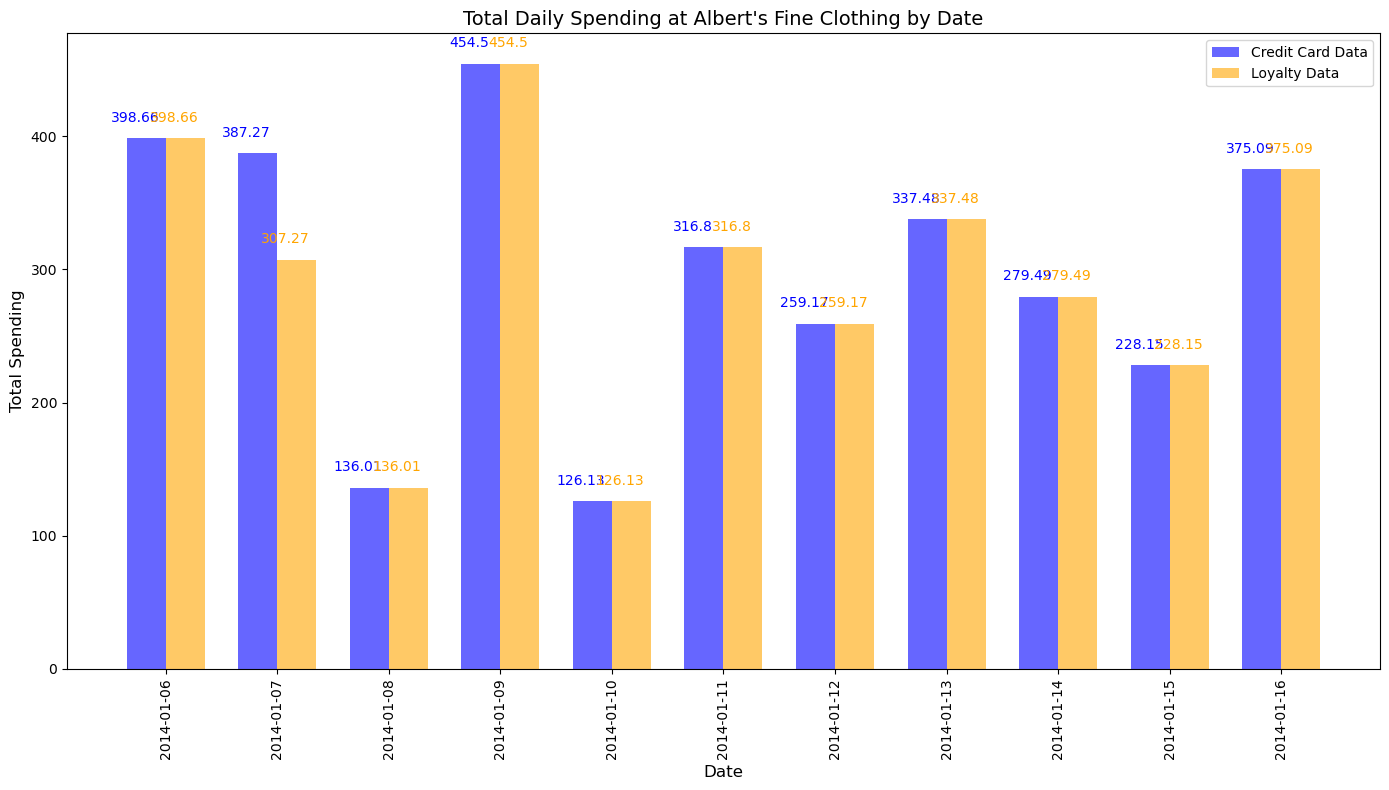

<Figure size 640x480 with 0 Axes>

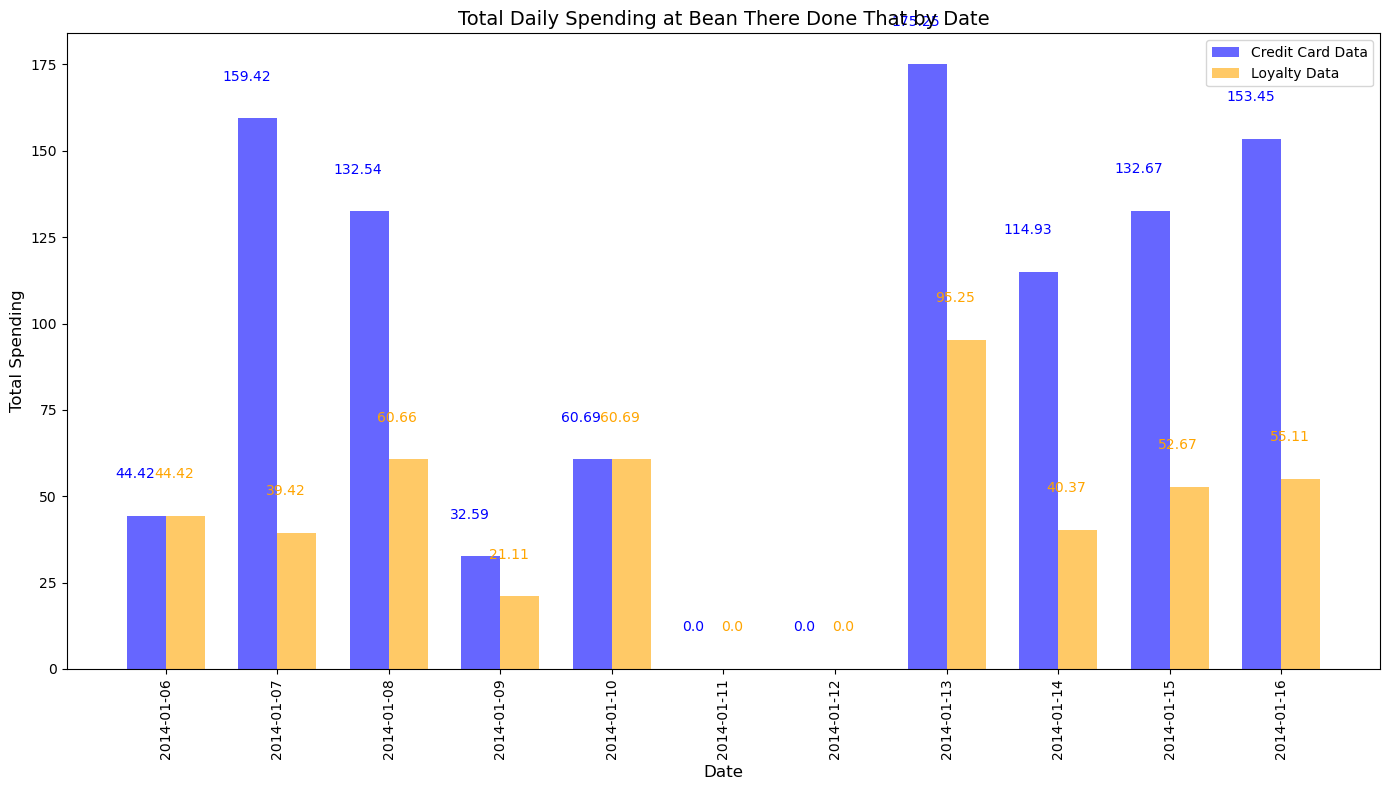

<Figure size 640x480 with 0 Axes>

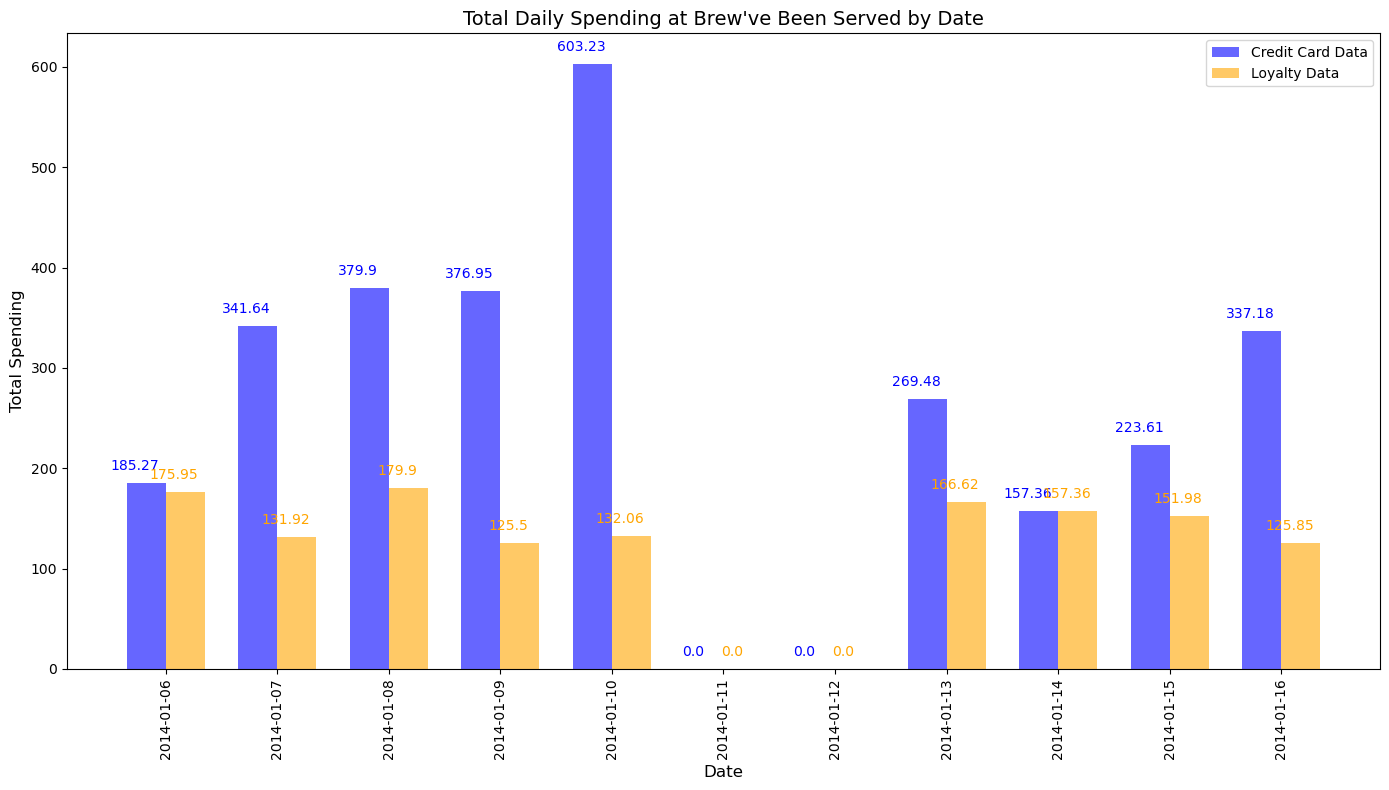

<Figure size 640x480 with 0 Axes>

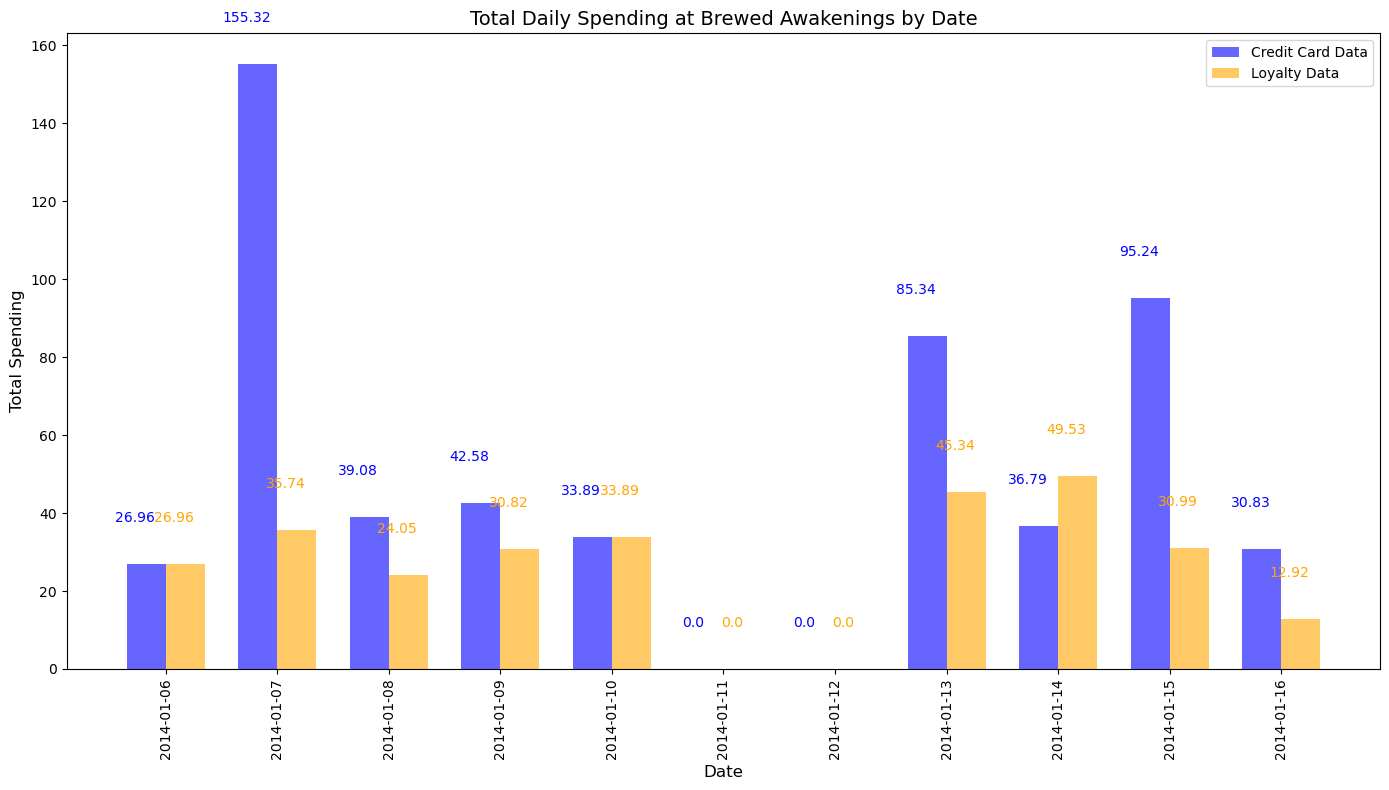

<Figure size 640x480 with 0 Axes>

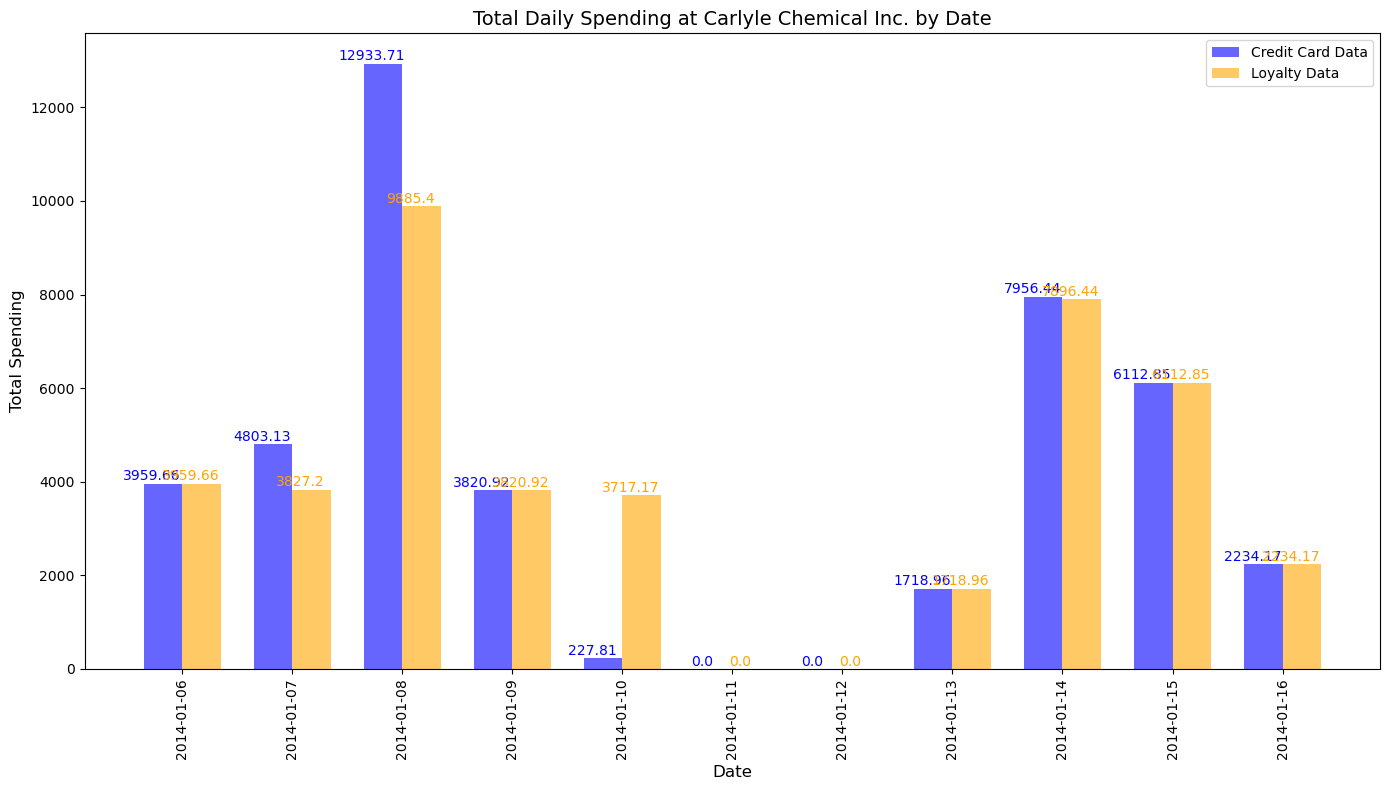

<Figure size 640x480 with 0 Axes>

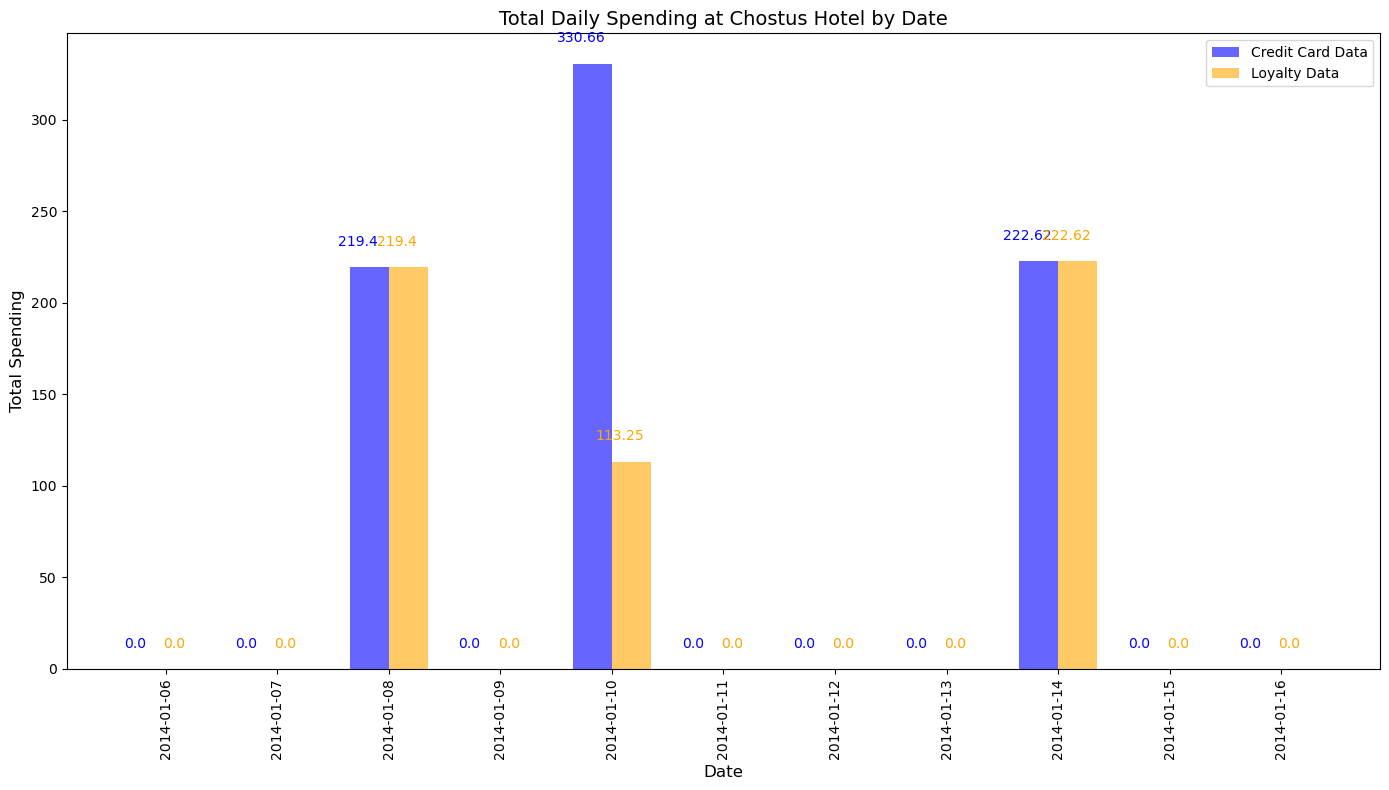

<Figure size 640x480 with 0 Axes>

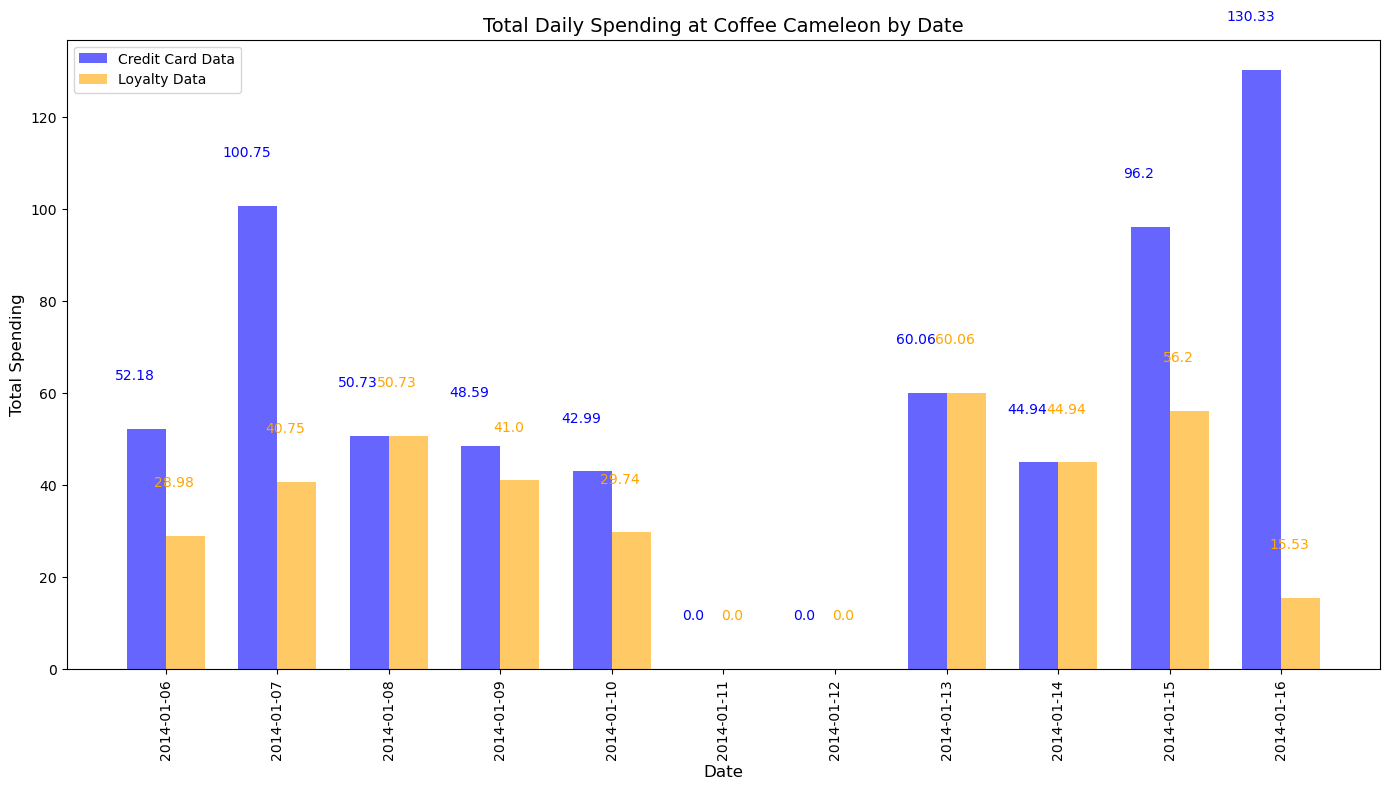

<Figure size 640x480 with 0 Axes>

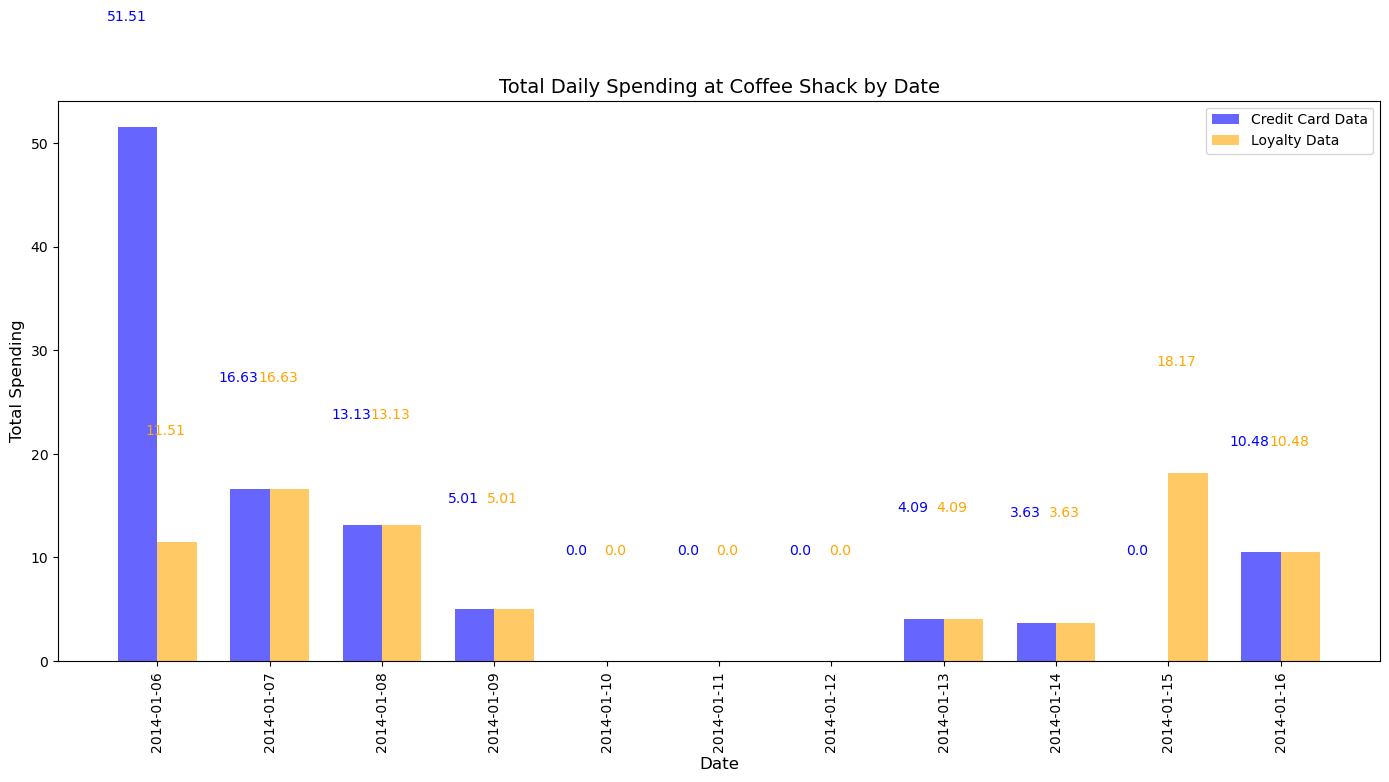

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3739528079.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

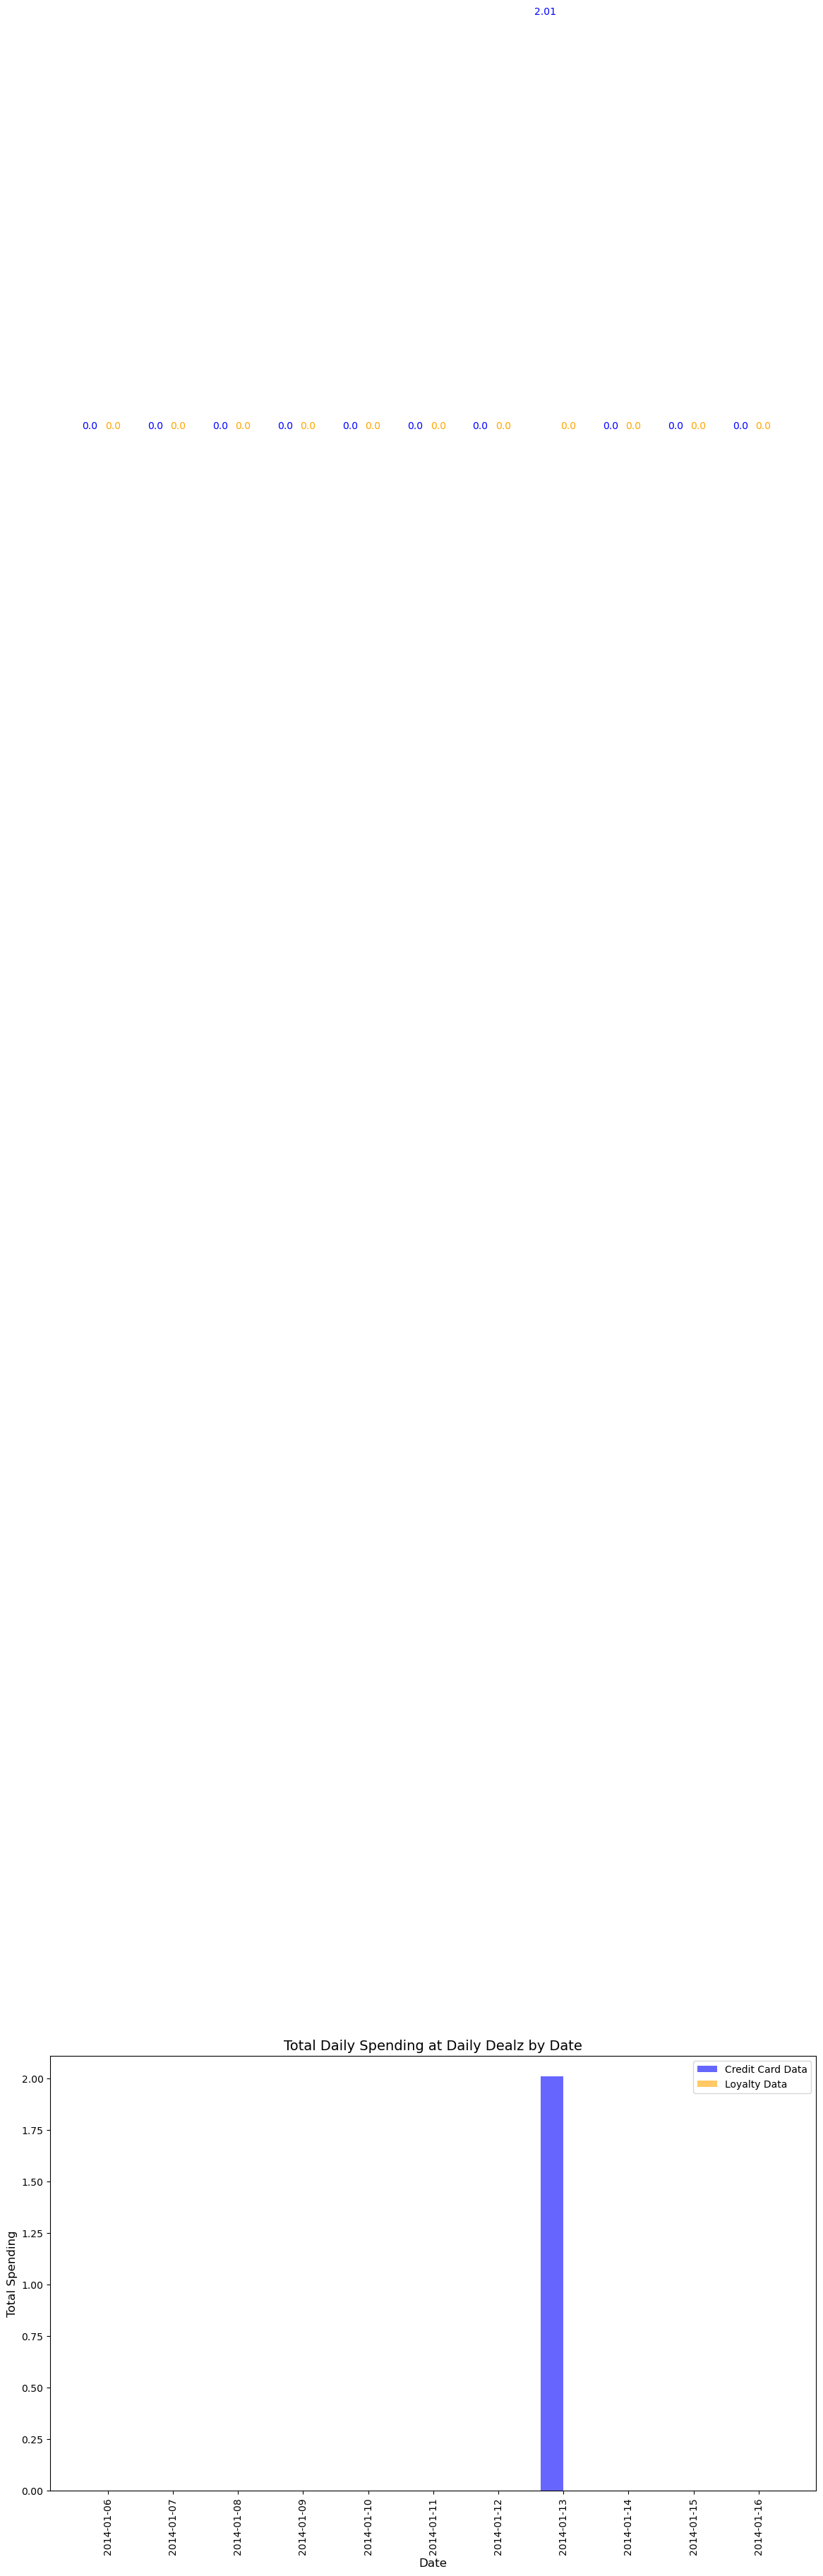

<Figure size 640x480 with 0 Axes>

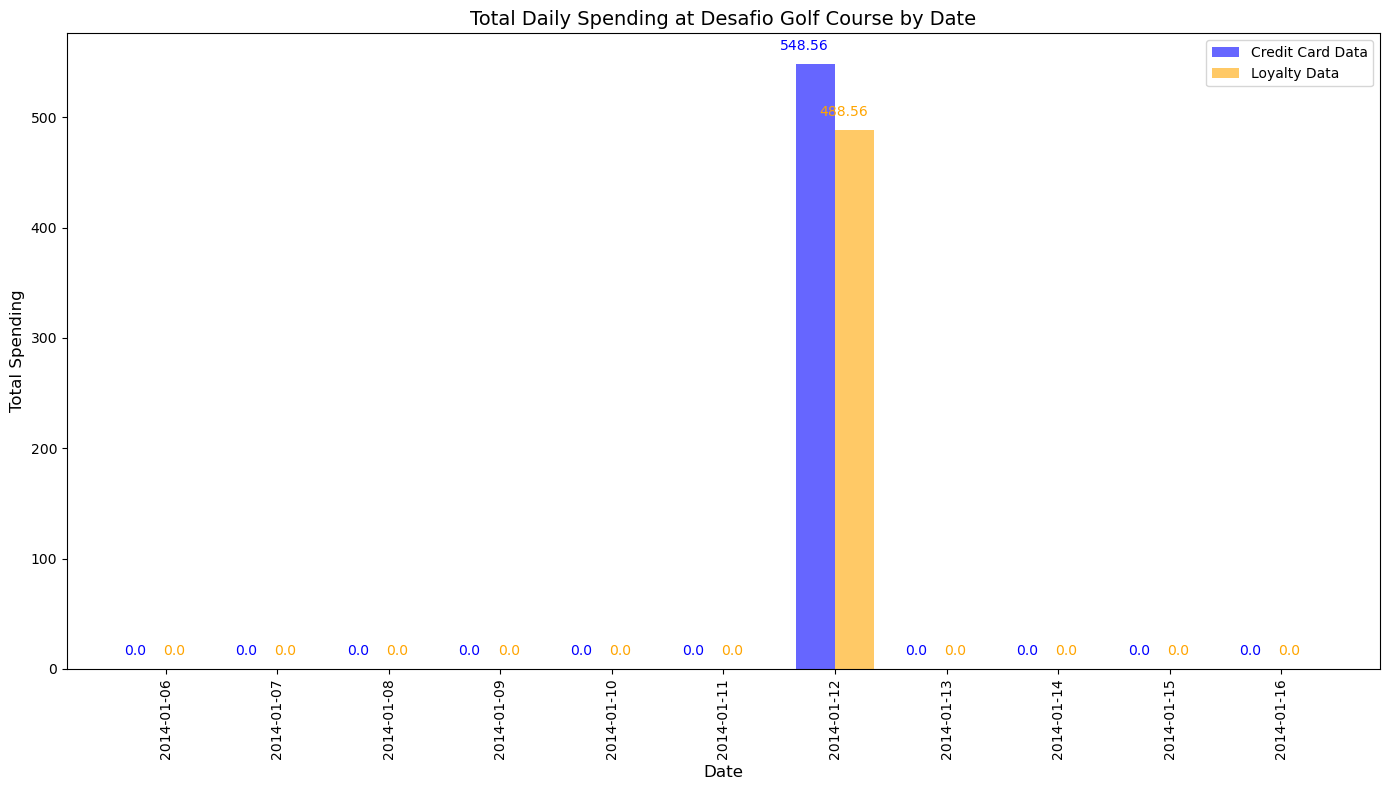

<Figure size 640x480 with 0 Axes>

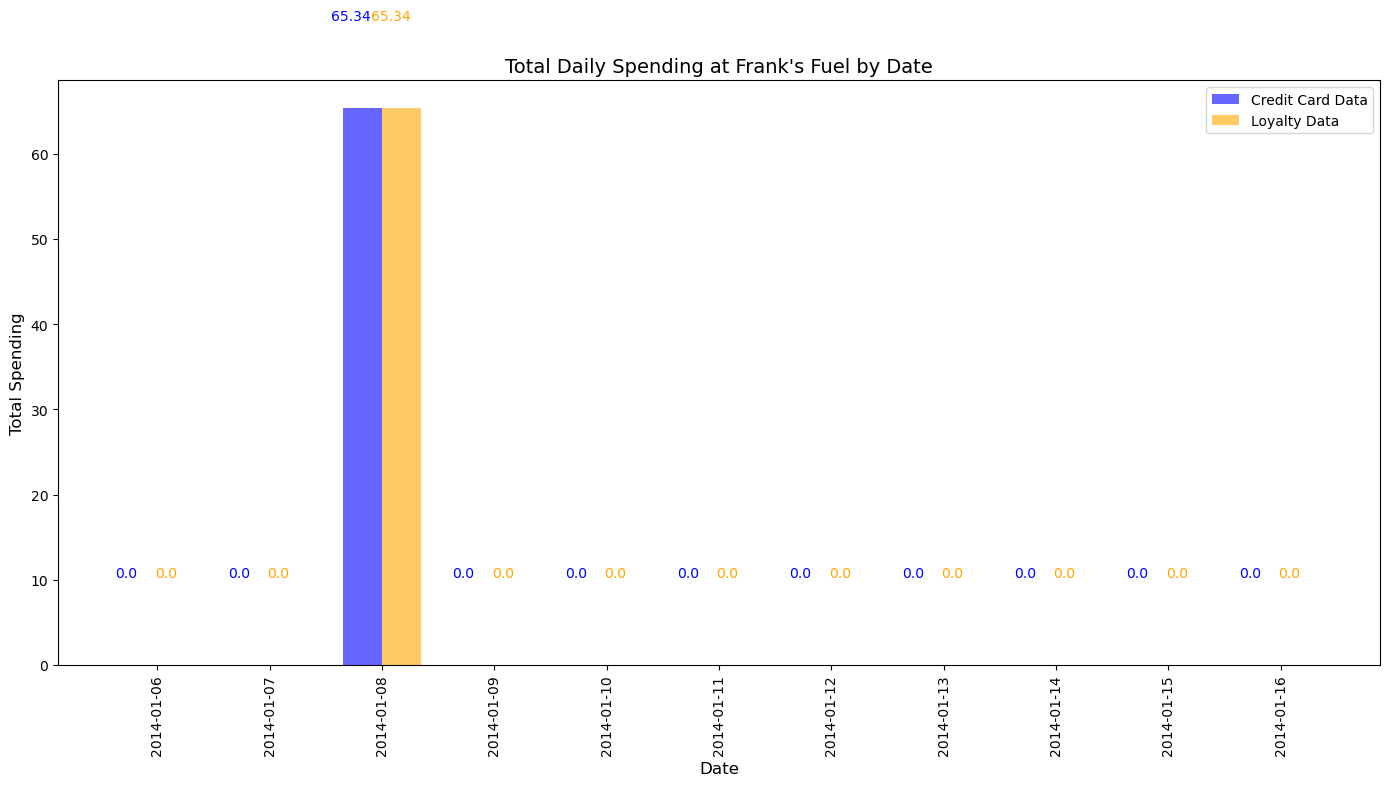

<Figure size 640x480 with 0 Axes>

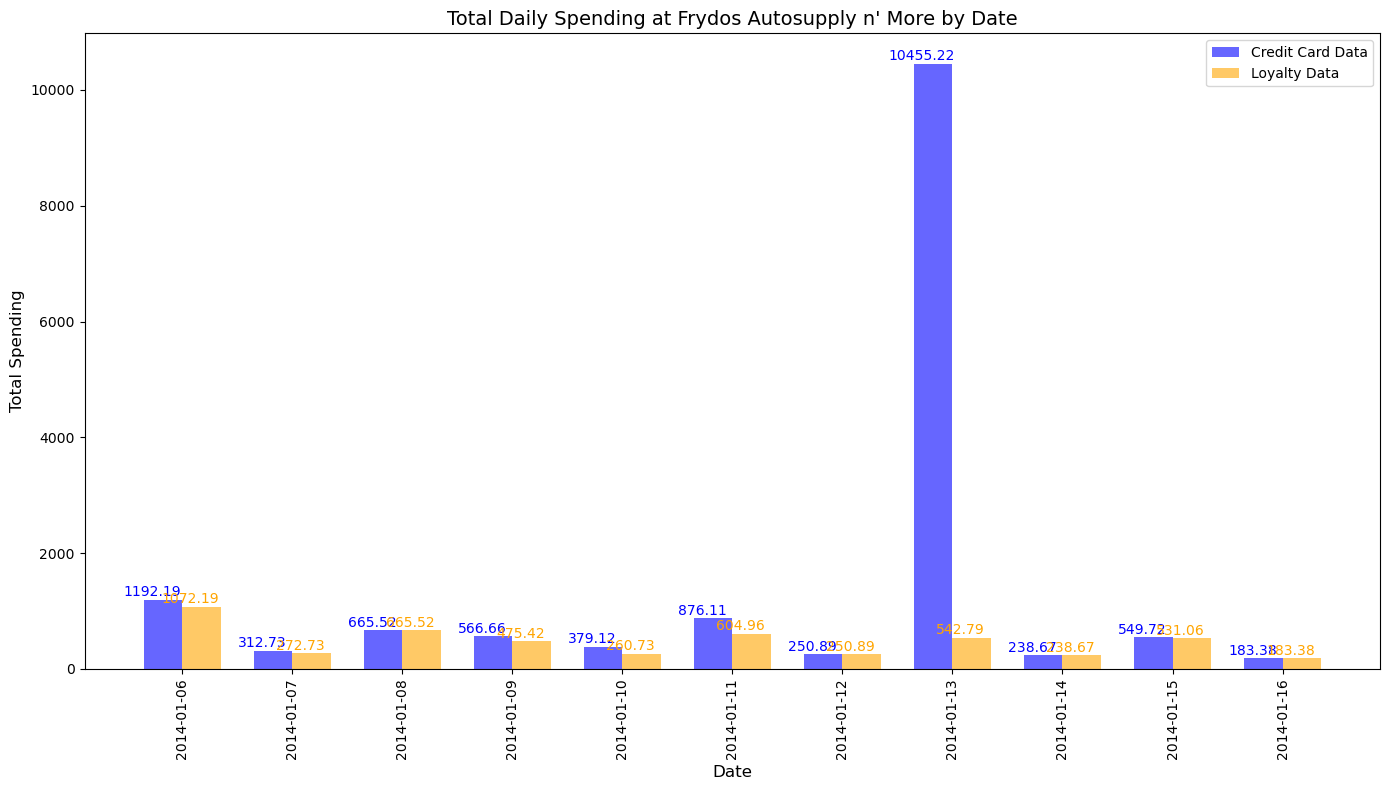

<Figure size 640x480 with 0 Axes>

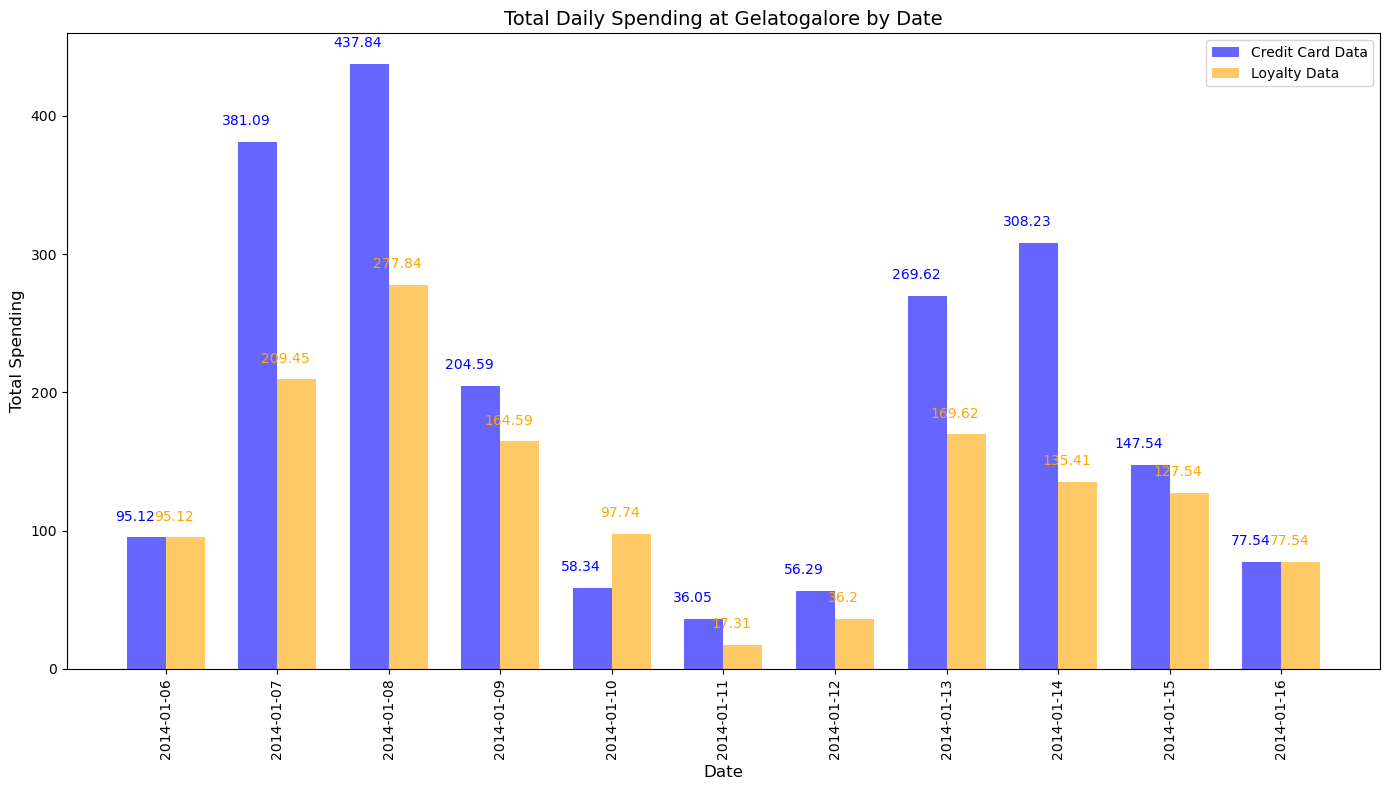

<Figure size 640x480 with 0 Axes>

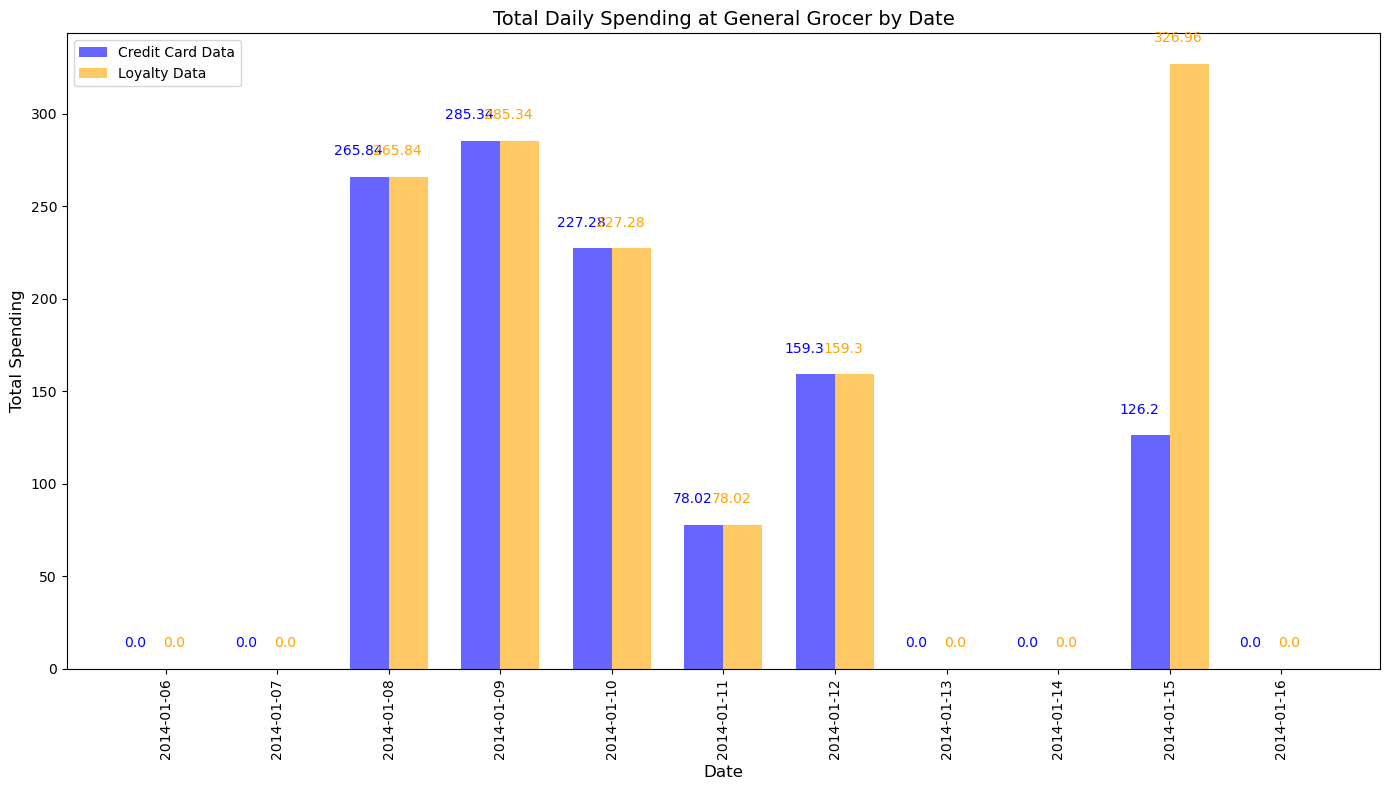

<Figure size 640x480 with 0 Axes>

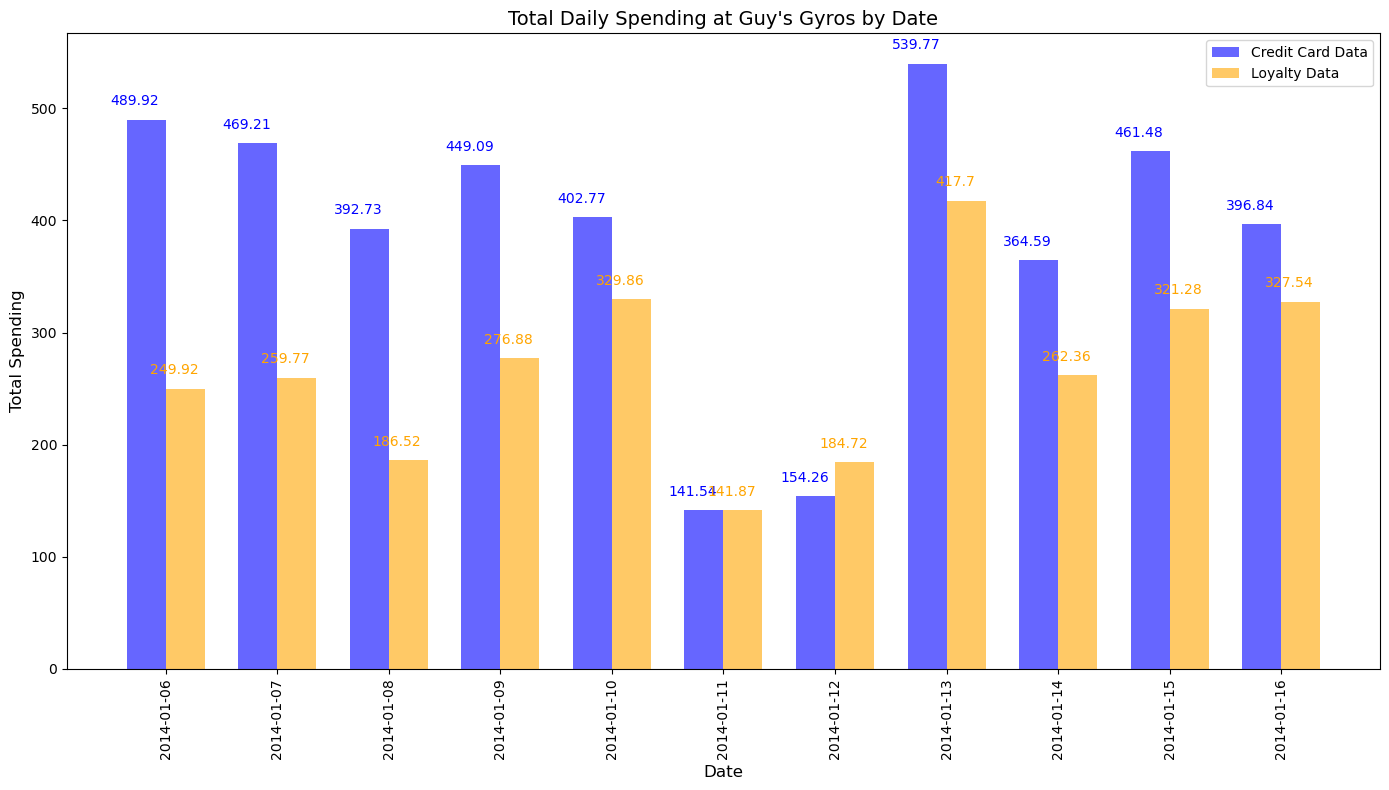

<Figure size 640x480 with 0 Axes>

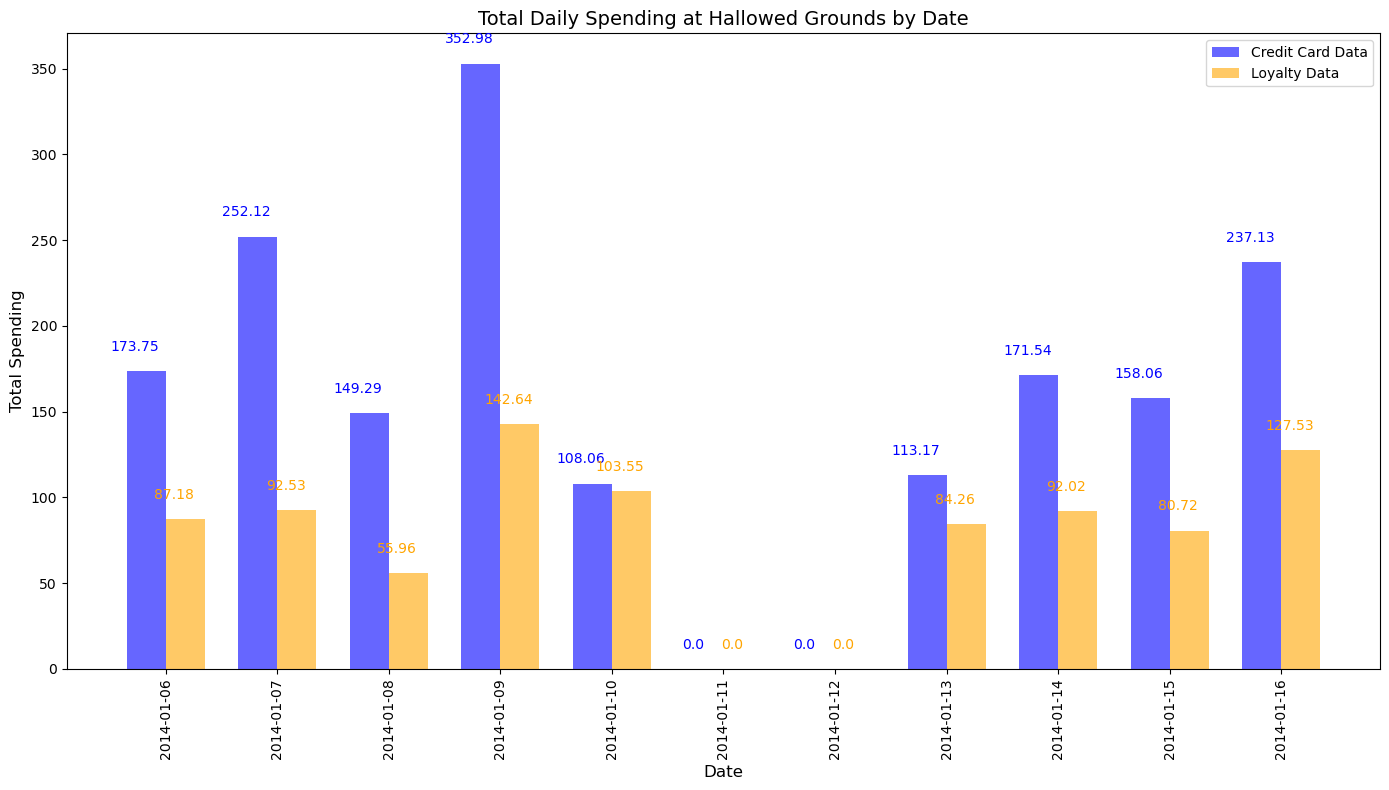

<Figure size 640x480 with 0 Axes>

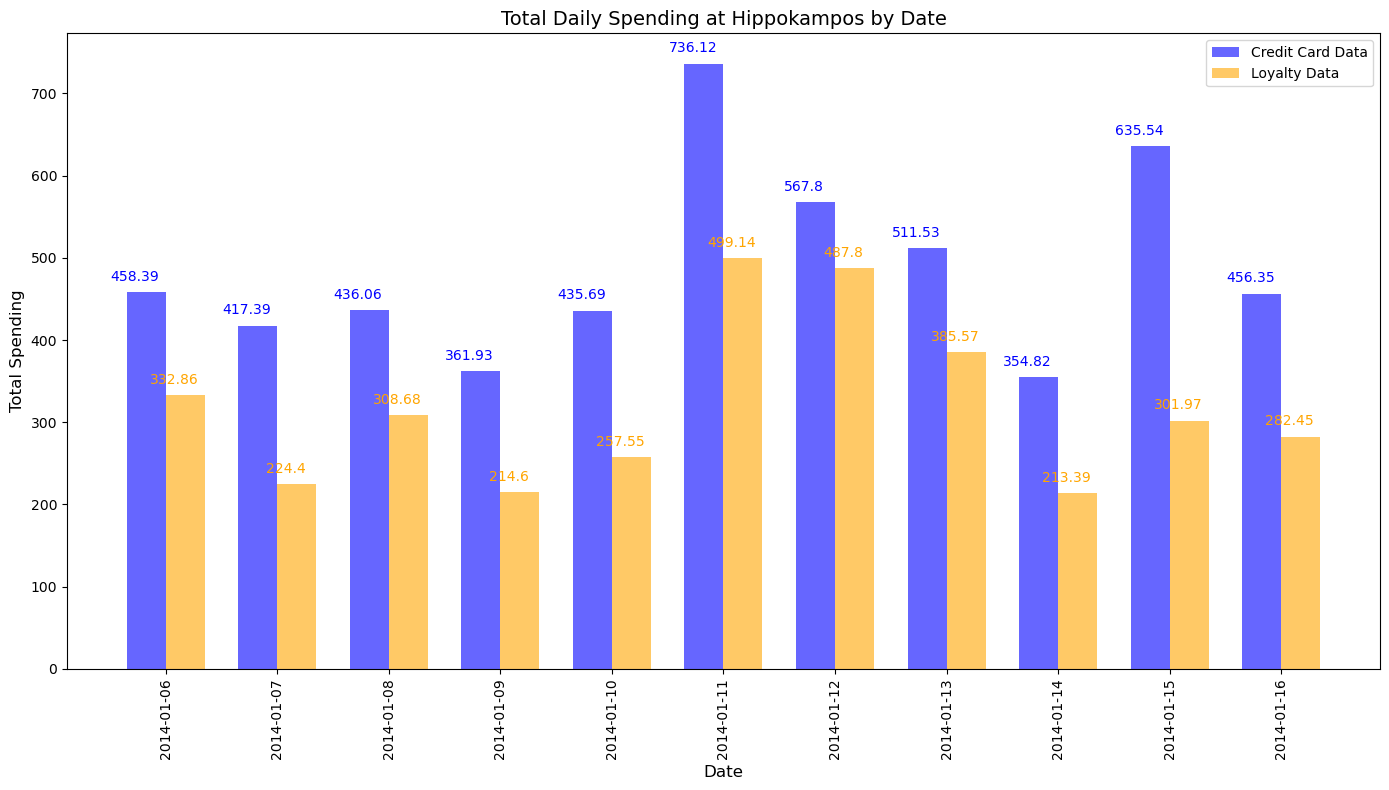

<Figure size 640x480 with 0 Axes>

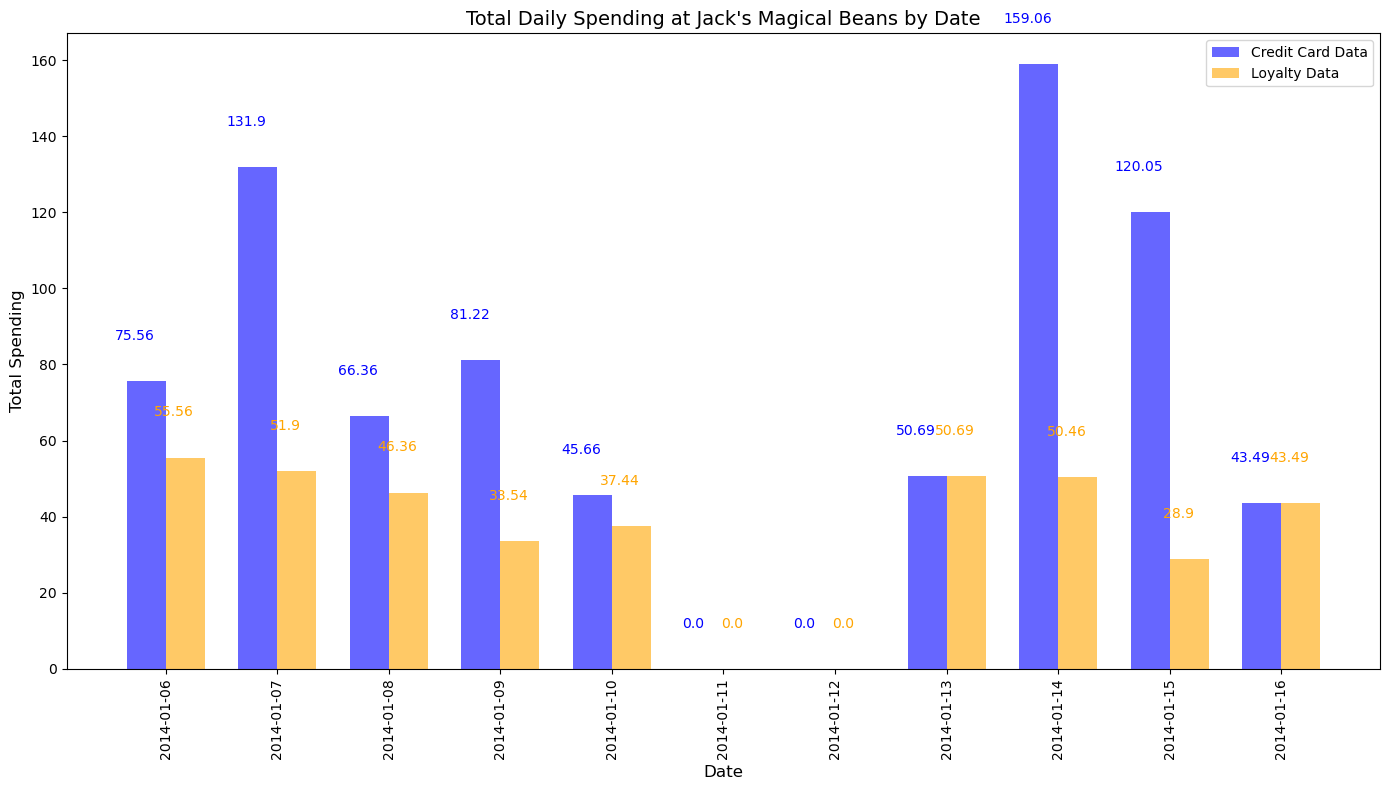

<Figure size 640x480 with 0 Axes>

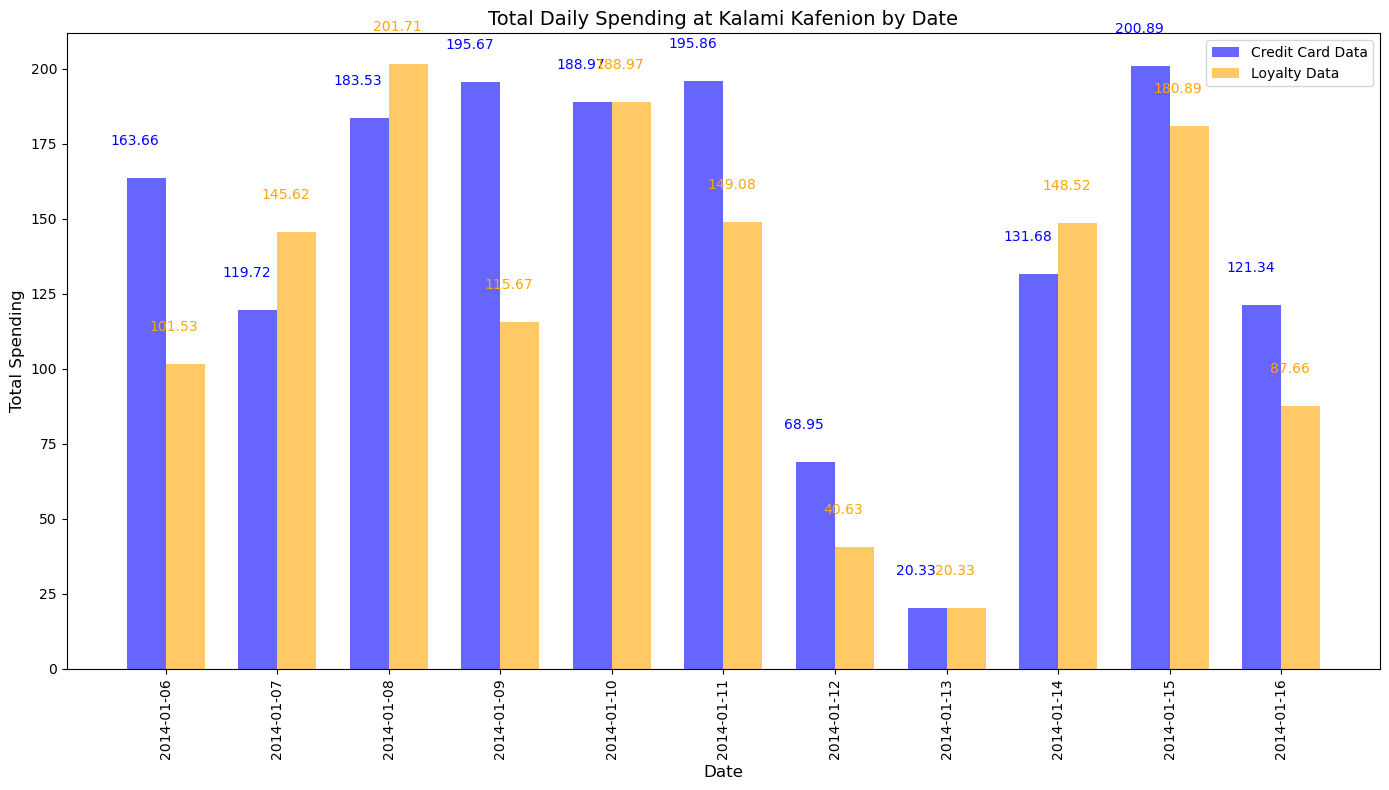

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3739528079.py:75: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


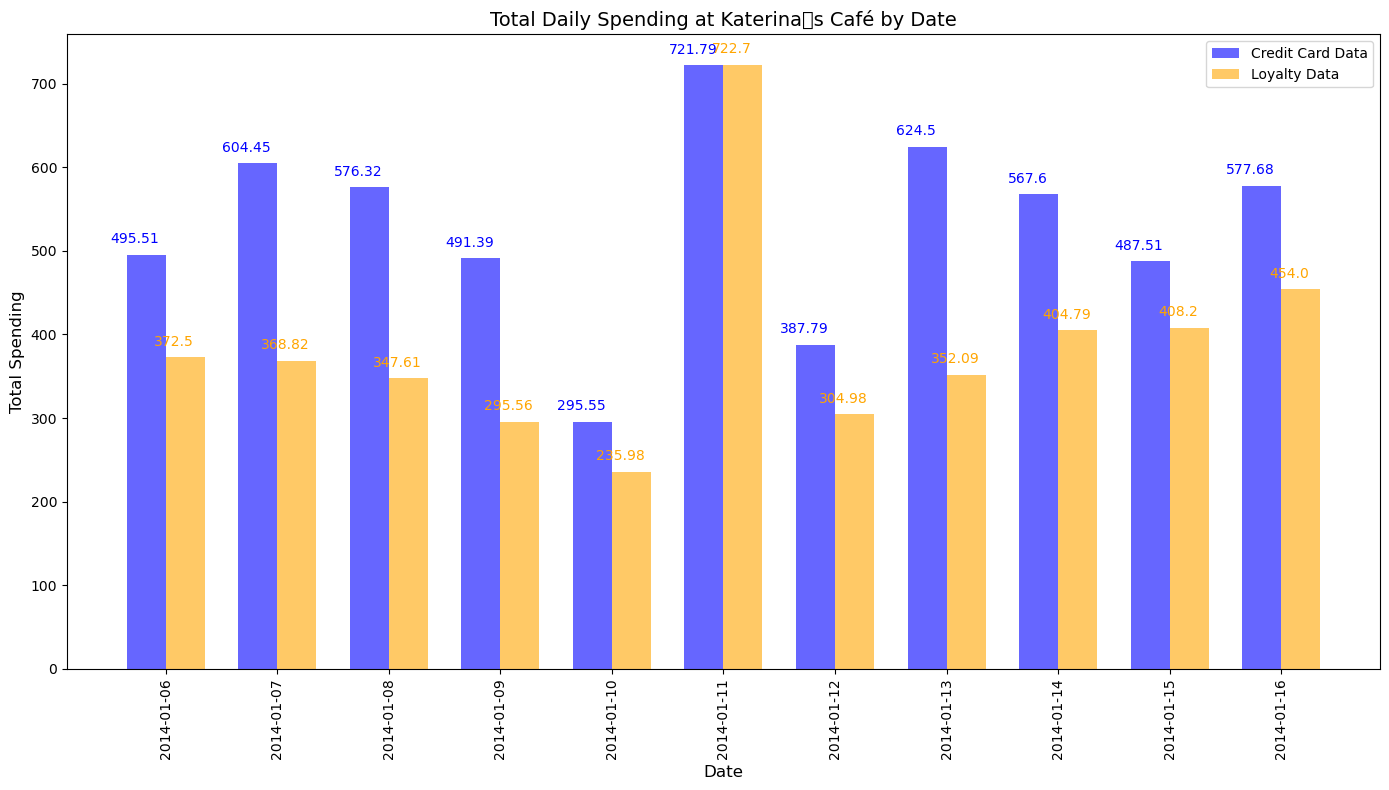

<Figure size 640x480 with 0 Axes>

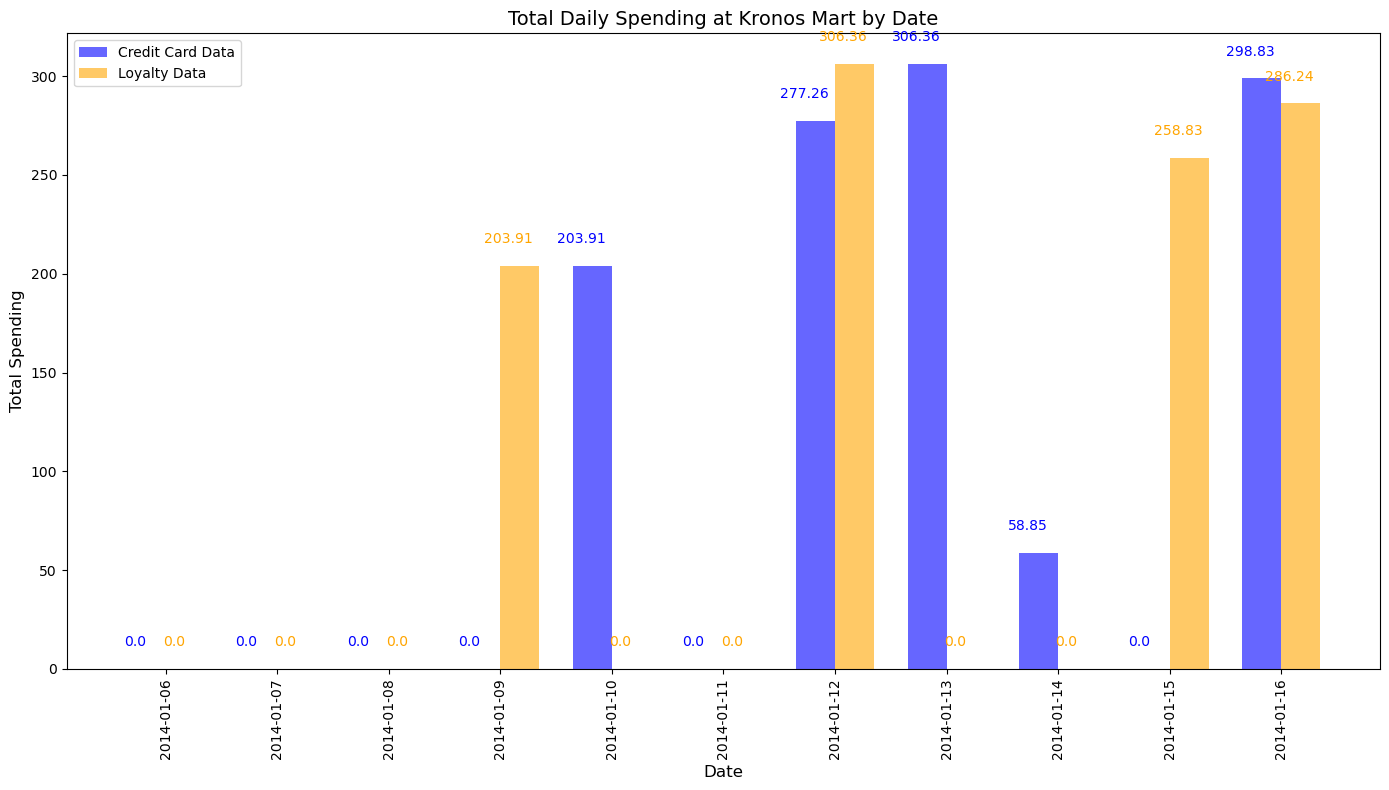

<Figure size 640x480 with 0 Axes>

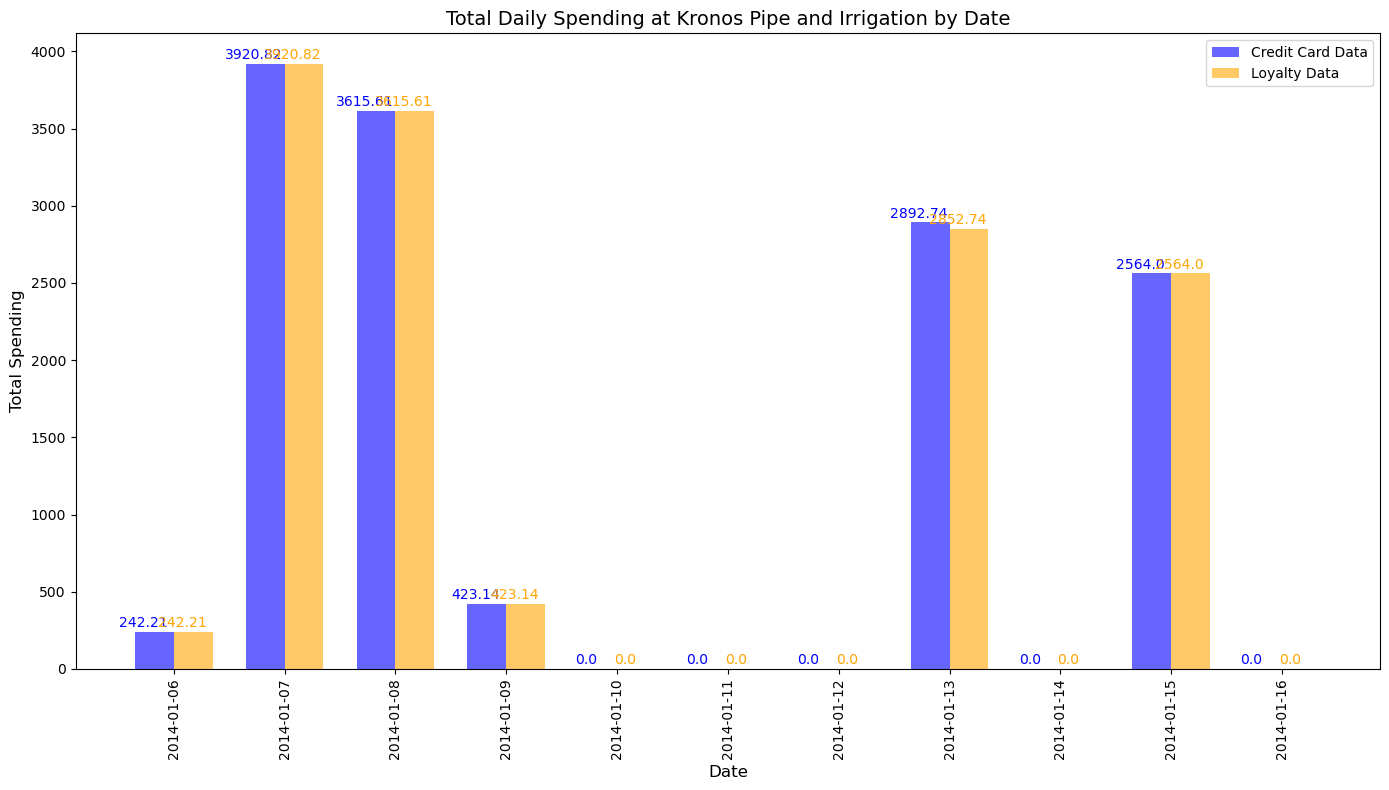

<Figure size 640x480 with 0 Axes>

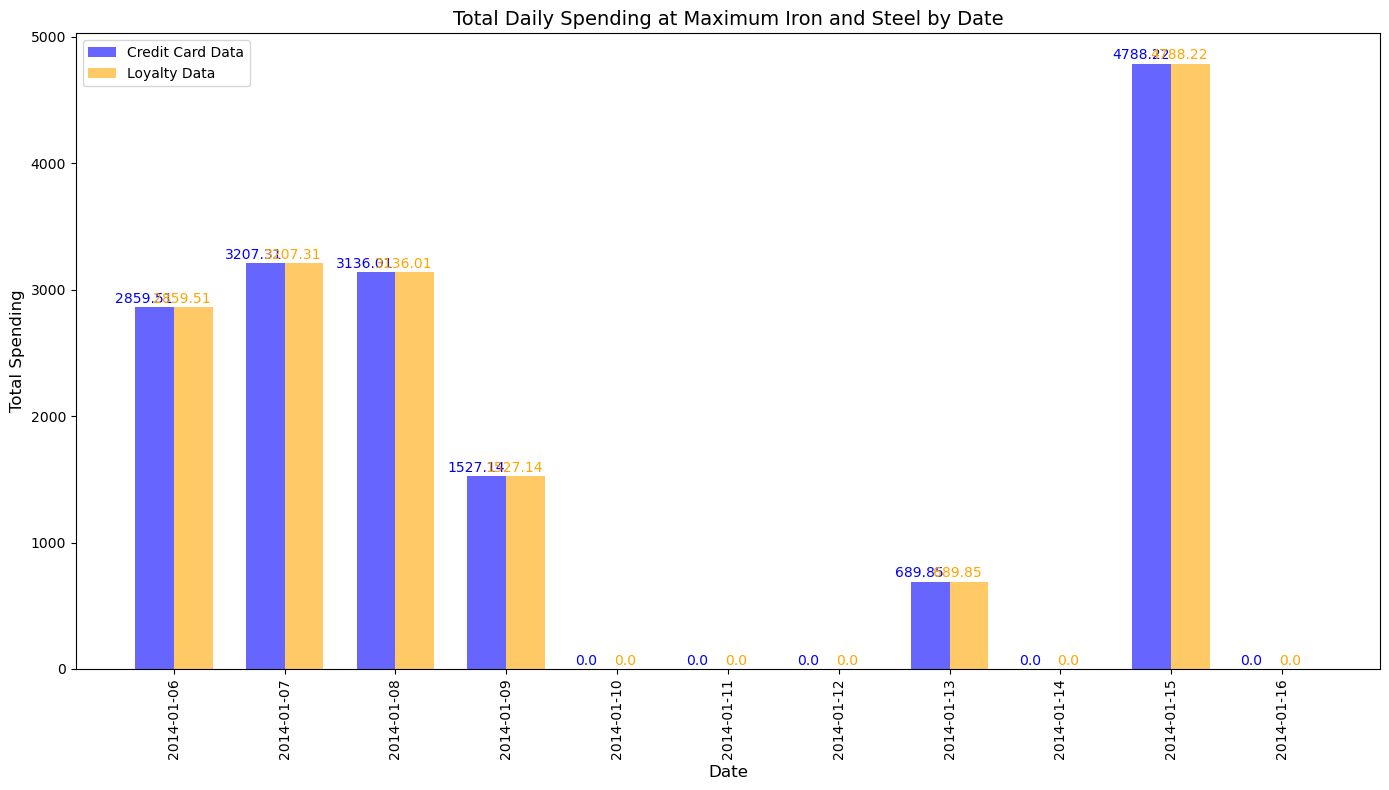

<Figure size 640x480 with 0 Axes>

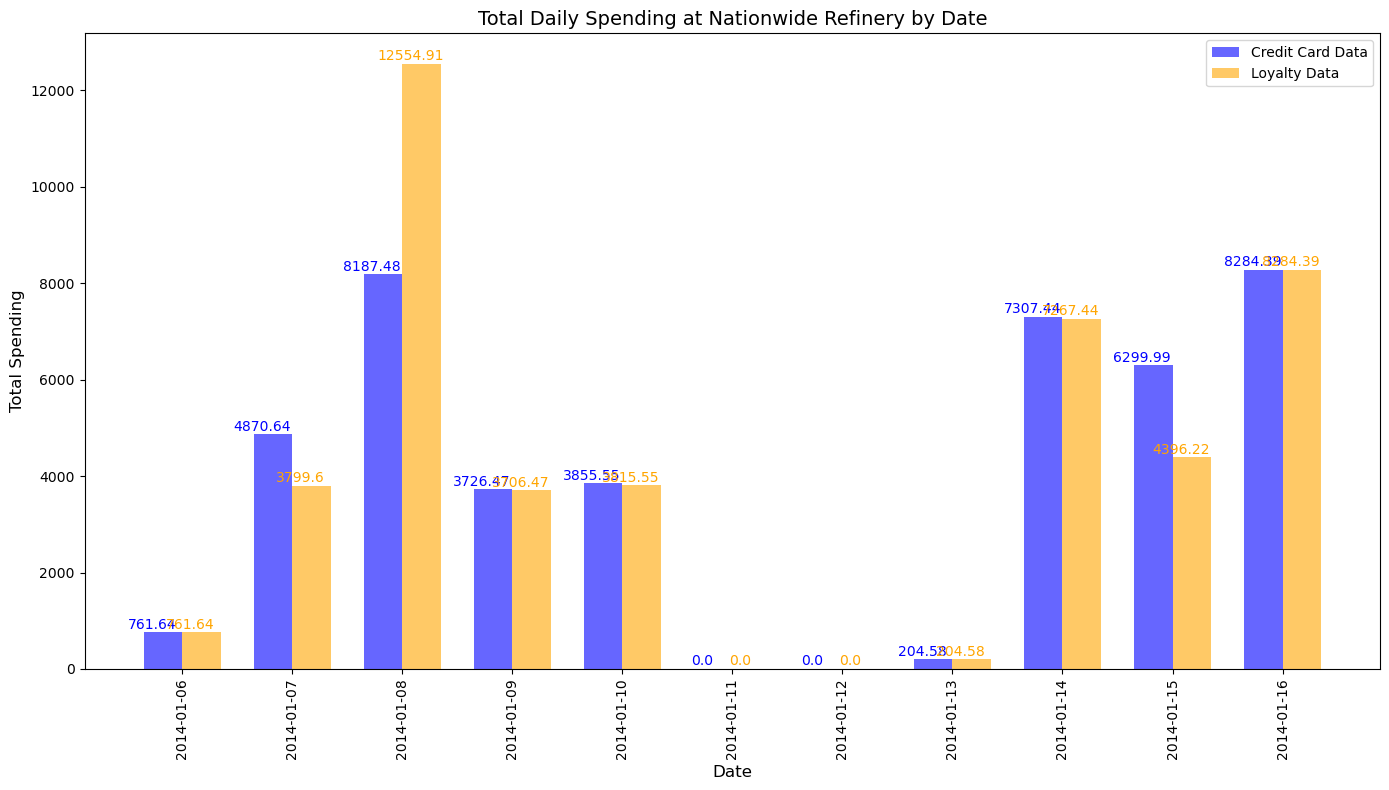

<Figure size 640x480 with 0 Axes>

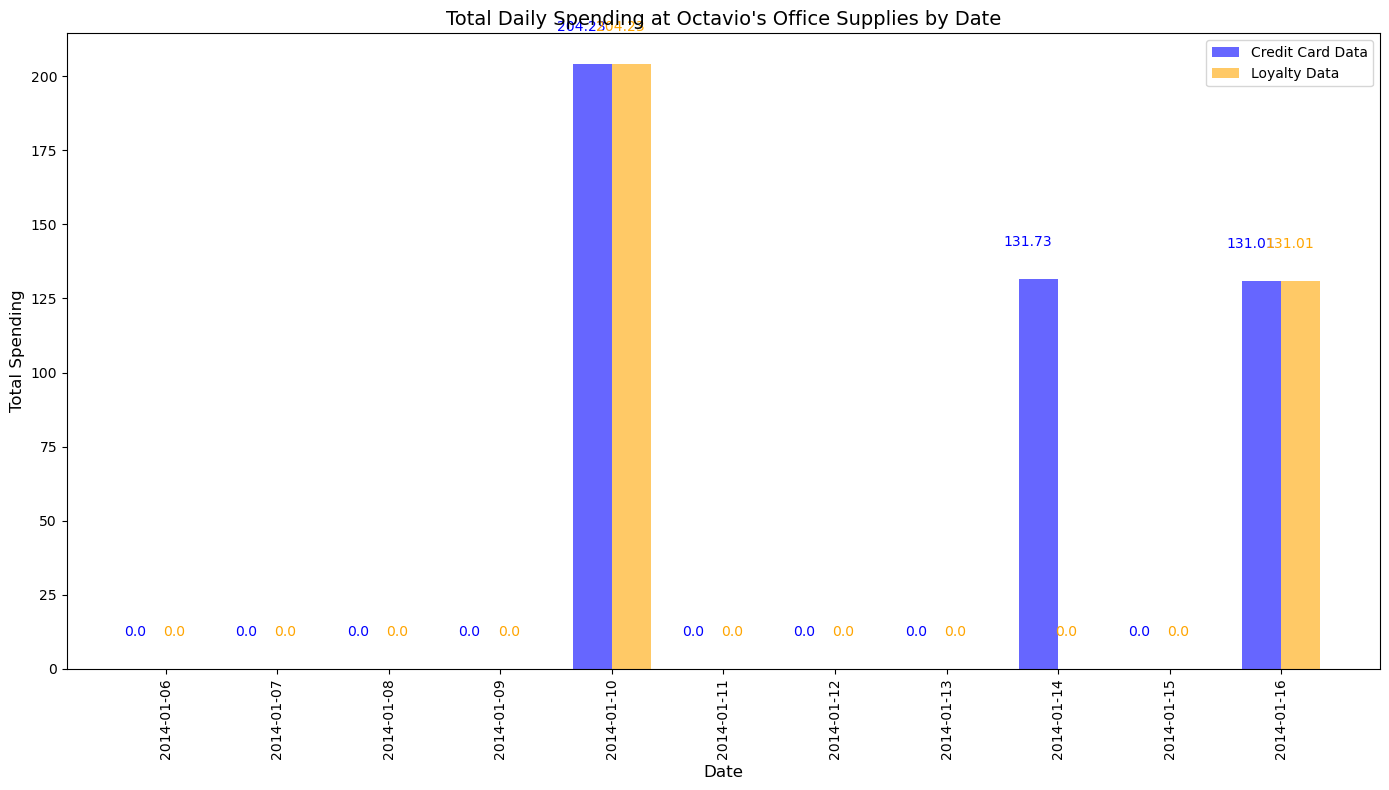

<Figure size 640x480 with 0 Axes>

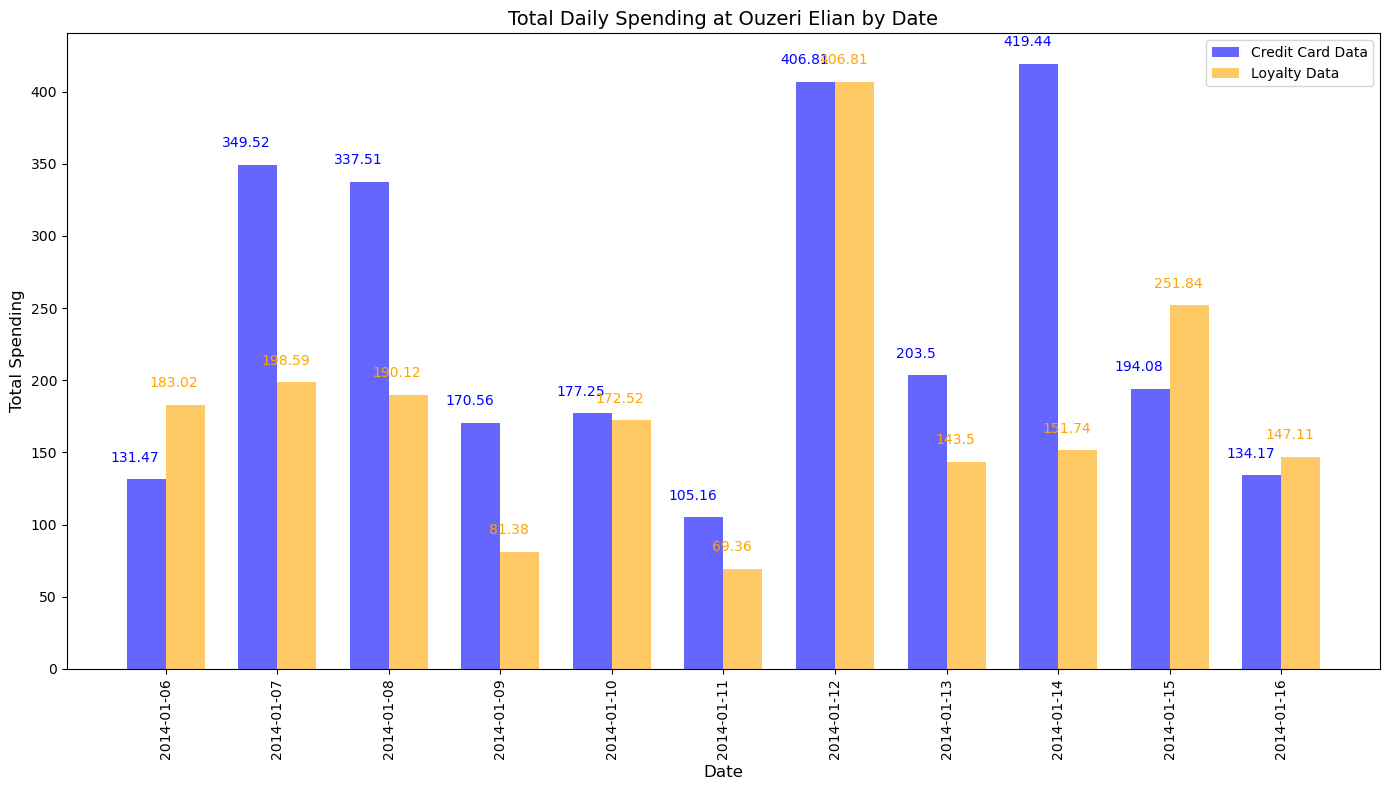

<Figure size 640x480 with 0 Axes>

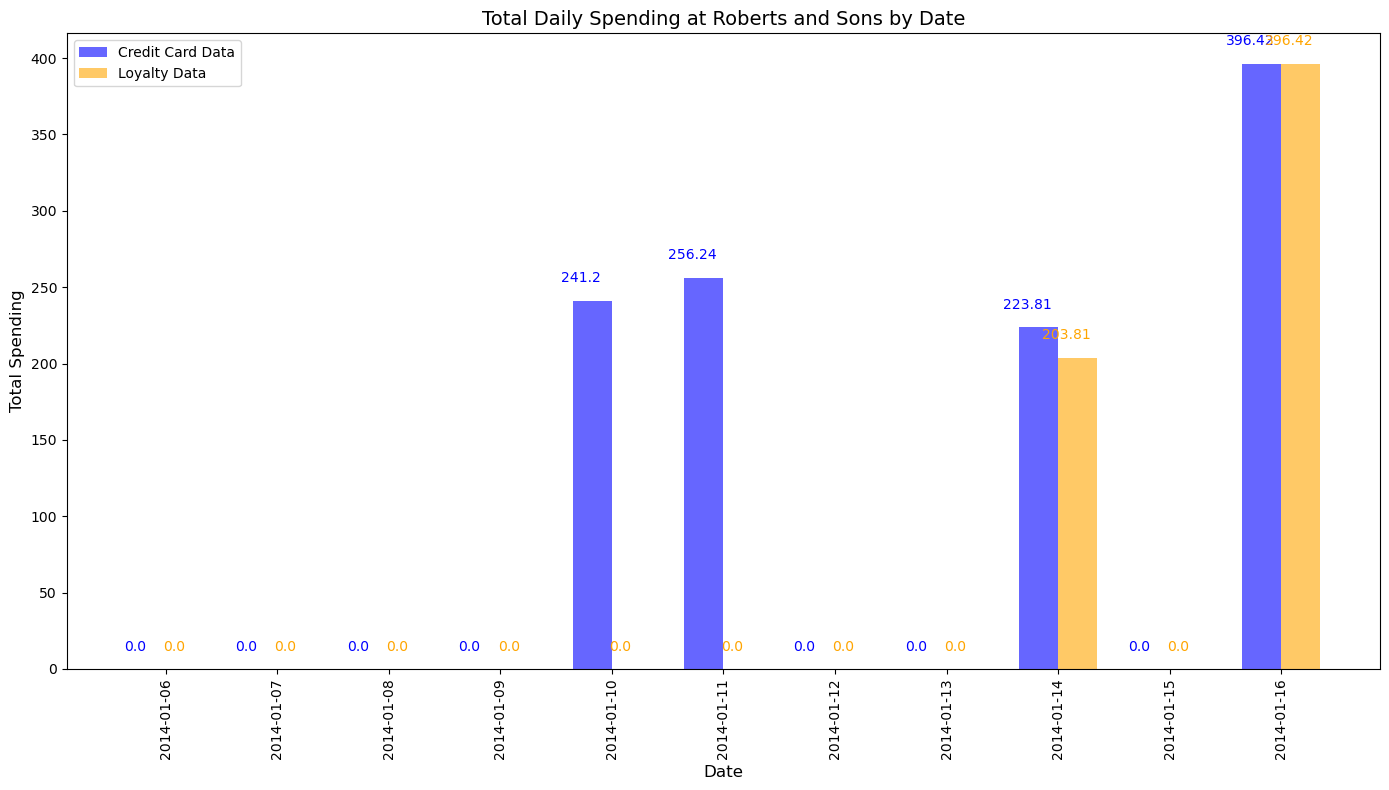

<Figure size 640x480 with 0 Axes>

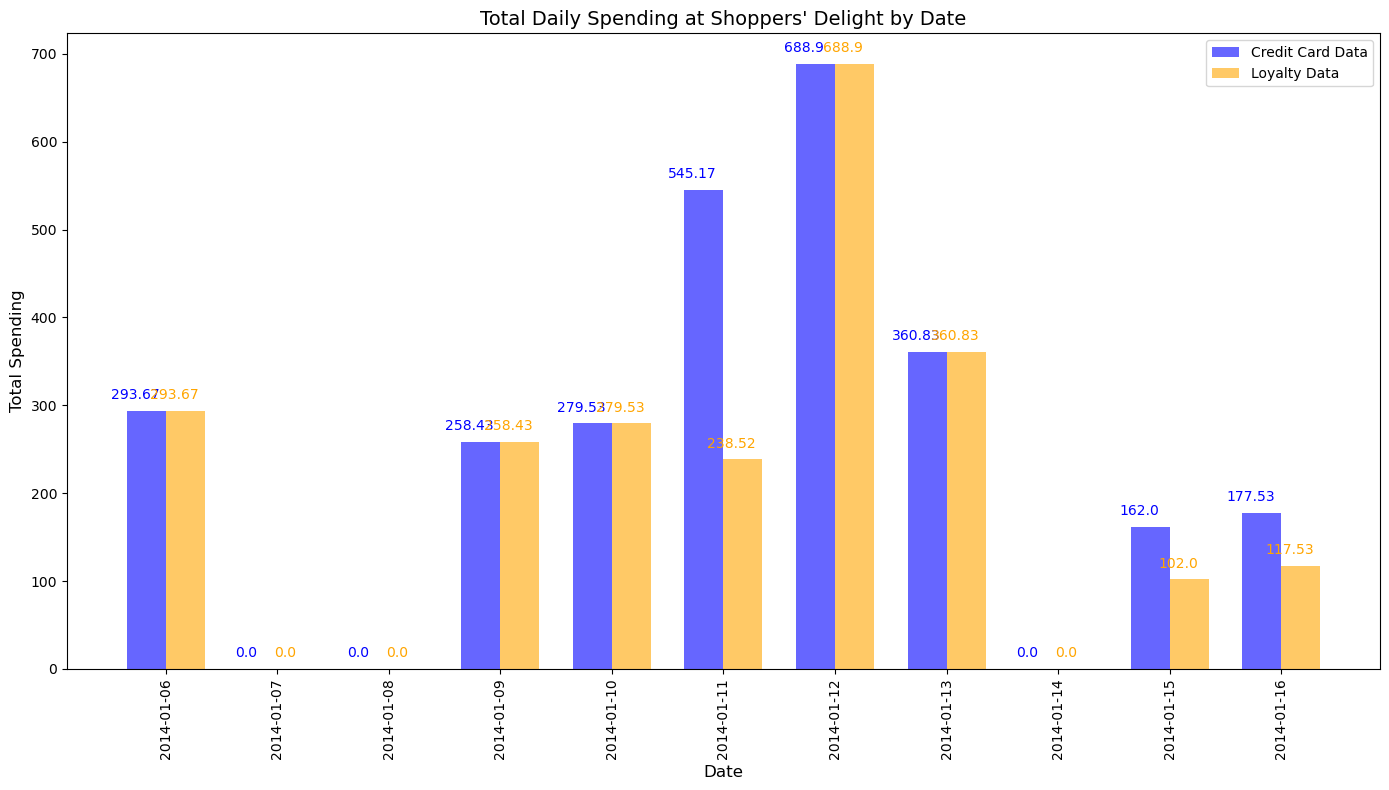

<Figure size 640x480 with 0 Axes>

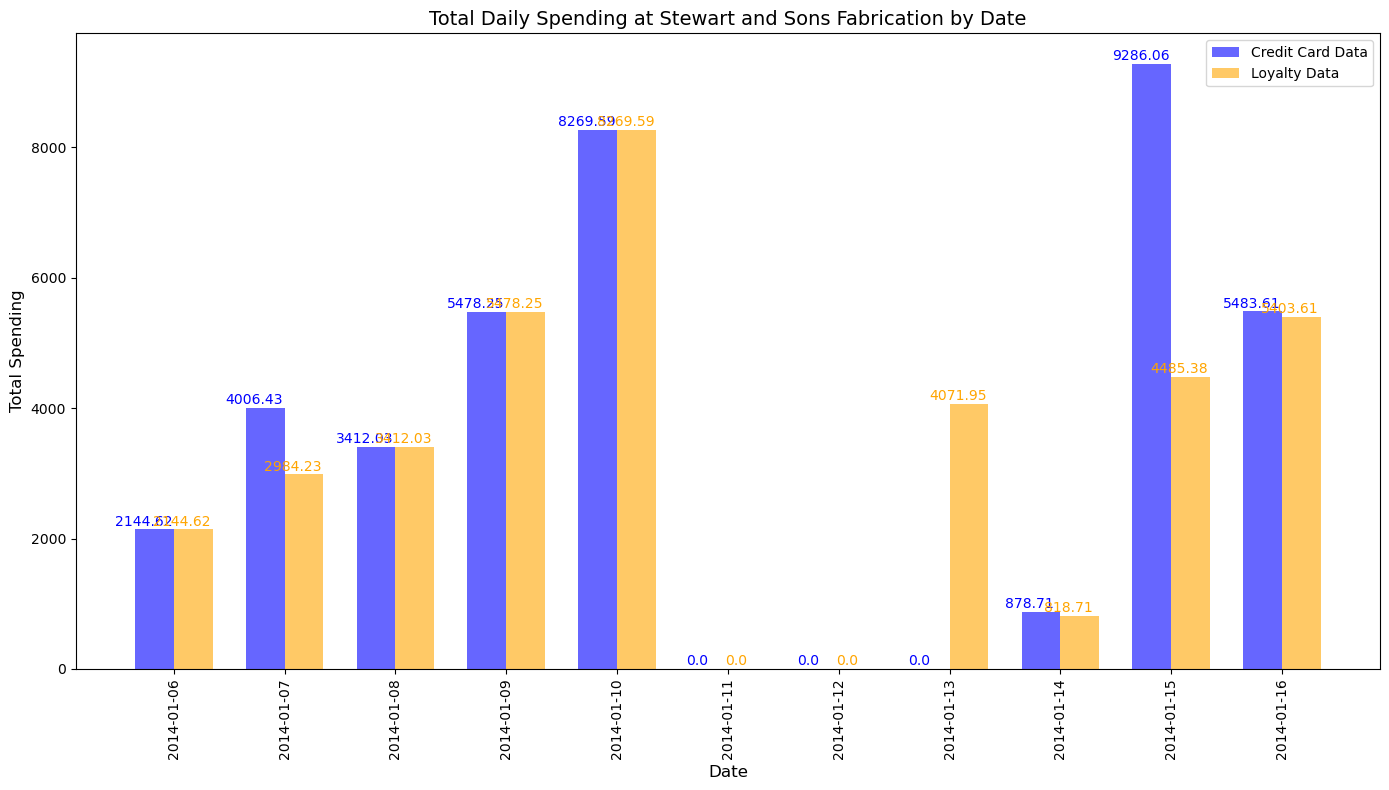

<Figure size 640x480 with 0 Axes>

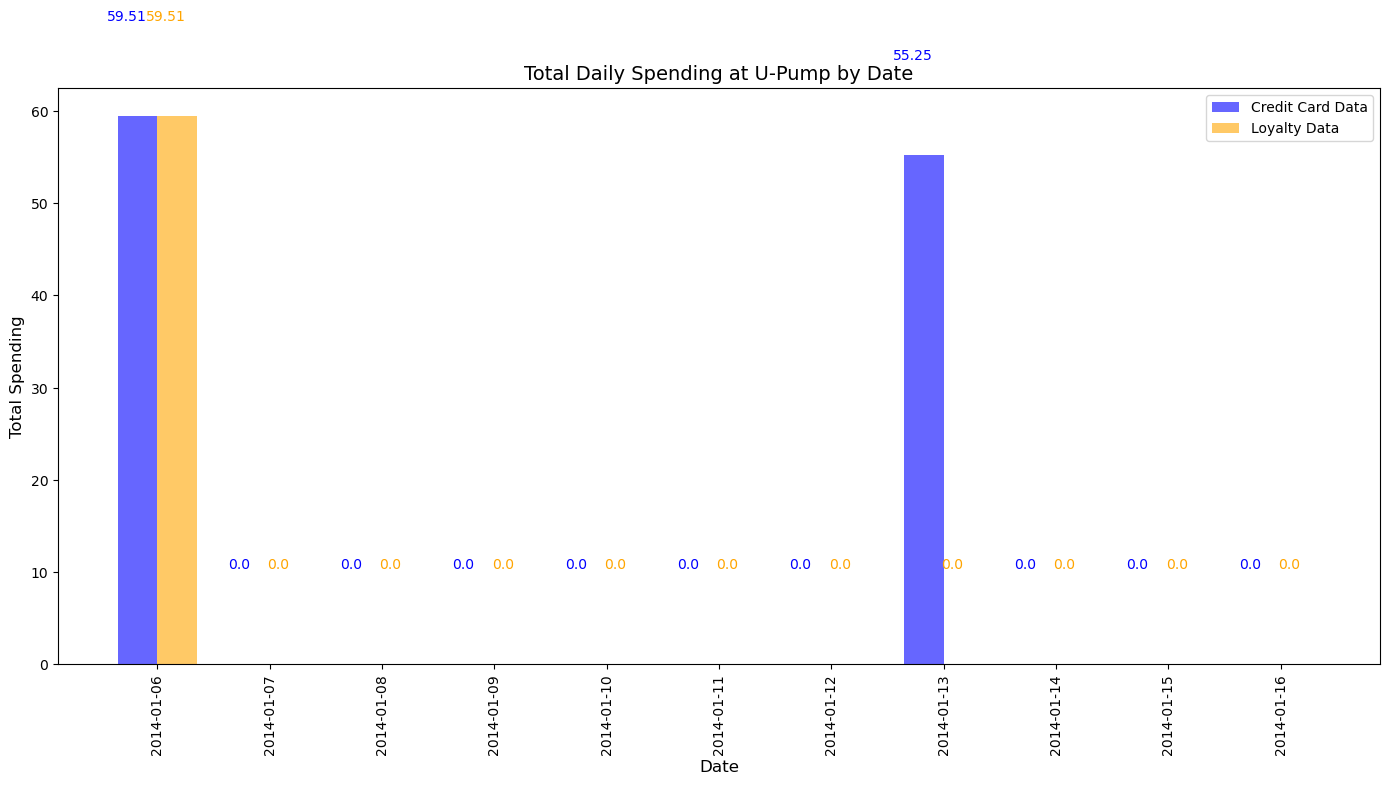

<Figure size 640x480 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cc_data['timestamp'] = pd.to_datetime(cc_data['timestamp'])
loyalty_data['timestamp'] = pd.to_datetime(loyalty_data['timestamp'])

cc_data['date'] = cc_data['timestamp'].dt.date
loyalty_data['date'] = loyalty_data['timestamp'].dt.date

loyalty_data['date'] = loyalty_data['timestamp'].dt.date
locations_cc = cc_data['location'].unique()
locations_loyalty = loyalty_data['location'].unique()
all_locations = np.union1d(locations_cc, locations_loyalty)

def plot_daily_spending(location):
    location_cc = cc_data[cc_data['location'] == location]
    location_loyalty = loyalty_data[loyalty_data['location'] == location]

    daily_spending_cc = location_cc.groupby('date')['price'].sum().reset_index()
    daily_spending_cc.rename(columns={'price': 'TotalSpending_cc'}, inplace=True)

    daily_spending_loyalty = location_loyalty.groupby('date')['price'].sum().reset_index()
    daily_spending_loyalty.rename(columns={'price': 'TotalSpending_loyalty'}, inplace=True)

    all_dates = pd.date_range(start='2014-01-06', end='2014-01-16')
    daily_spending_cc = daily_spending_cc.set_index('date').reindex(all_dates).fillna(0).reset_index().rename(columns={'index': 'date'})
    daily_spending_loyalty = daily_spending_loyalty.set_index('date').reindex(all_dates).fillna(0).reset_index().rename(columns={'index': 'date'})

    daily_spending_combined = pd.merge(
        daily_spending_cc,
        daily_spending_loyalty,
        on='date',
        suffixes=('_cc', '_loyalty')
    )

    fig, ax = plt.subplots(figsize=(14, 8))

    bar_width = 0.35
    index = np.arange(len(daily_spending_combined))

    bar1 = index
    bar2 = index + bar_width

    bars1 = plt.bar(
        bar1,
        daily_spending_combined['TotalSpending_cc'],
        width=bar_width,
        label='Credit Card Data',
        alpha=0.6,
        color='b'
    )

    bars2 = plt.bar(
        bar2,
        daily_spending_combined['TotalSpending_loyalty'],
        width=bar_width,
        label='Loyalty Data',
        alpha=0.6,
        color='orange'
    )

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Spending', fontsize=12)
    plt.title(f'Total Daily Spending at {location} by Date', fontsize=14)
    plt.xticks(index + bar_width / 2, daily_spending_combined['date'].dt.strftime('%Y-%m-%d'), rotation=90)
    plt.legend()

    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 10, round(yval, 2), fontsize=10, color='blue', ha='center', va='bottom')
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 10, round(yval, 2), fontsize=10, color='orange', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    plt.savefig(f'{location}_spending.png')


for location in all_locations:
    plot_daily_spending(location)


In [13]:
specific_date = pd.to_datetime('2014-01-07').date()
location_cc_carlyle = cc_data[(cc_data['location'] == 'Carlyle Chemical Inc.') & (cc_data['date'] == specific_date)]
location_loyalty_carlyle = loyalty_data[(loyalty_data['location'] == 'Carlyle Chemical Inc.') & (loyalty_data['date'] == specific_date)]

location_cc_carlyle, location_loyalty_carlyle
#anamoly1

(              timestamp               location    price FirstName LastName  \
 220 2014-01-07 14:34:00  Carlyle Chemical Inc.  4803.13   Valeria   Morlun   
 
            date  
 220  2014-01-07  ,
      timestamp               location   price FirstName LastName        date
 433 2014-01-07  Carlyle Chemical Inc.  3827.2   Valeria   Morlun  2014-01-07)

In [14]:
specific_date = pd.to_datetime('2014-01-08').date()
location_cc_carlyle = cc_data[(cc_data['location'] == 'Carlyle Chemical Inc.') & (cc_data['date'] == specific_date)]
location_loyalty_carlyle = loyalty_data[(loyalty_data['location'] == 'Carlyle Chemical Inc.') & (loyalty_data['date'] == specific_date)]


location_cc_carlyle, location_loyalty_carlyle
#anamoly2

(              timestamp               location    price FirstName LastName  \
 289 2014-01-08 09:43:00  Carlyle Chemical Inc.  3048.31   Valeria   Morlun   
 309 2014-01-08 13:03:00  Carlyle Chemical Inc.  4983.52     Irene     Nant   
 352 2014-01-08 14:26:00  Carlyle Chemical Inc.  4901.88   Valeria   Morlun   
 
            date  
 289  2014-01-08  
 309  2014-01-08  
 352  2014-01-08  ,
      timestamp               location    price FirstName LastName        date
 533 2014-01-08  Carlyle Chemical Inc.  4901.88   Valeria   Morlun  2014-01-08
 538 2014-01-08  Carlyle Chemical Inc.  4983.52     Irene     Nant  2014-01-08)

In [15]:
specific_date = pd.to_datetime('2014-01-15').date()
location_cc_stewarts = cc_data[(cc_data['location'] == 'Stewart and Sons Fabrication') & (cc_data['date'] == specific_date)]
location_loyalty_stewarts = loyalty_data[(loyalty_data['location'] == 'Stewart and Sons Fabrication') & (loyalty_data['date'] == specific_date)]
cc_transactions_stewarts = location_cc_stewarts[['timestamp', 'location', 'price', 'FirstName', 'LastName']]
loyalty_transactions_stewarts = location_loyalty_stewarts[['timestamp', 'location', 'price', 'FirstName', 'LastName']]

cc_transactions_stewarts, loyalty_transactions_stewarts
#anamoly3

(               timestamp                      location    price FirstName  \
 1034 2014-01-15 11:18:00  Stewart and Sons Fabrication  4545.38      Adan   
 1035 2014-01-15 11:44:00  Stewart and Sons Fabrication  4740.68   Cecilia   
 
        LastName  
 1034     Morlun  
 1035  Morluniau  ,
       timestamp                      location    price FirstName LastName
 1076 2014-01-15  Stewart and Sons Fabrication  4485.38      Adan   Morlun)

In [ ]:
specific_date = pd.to_datetime('2014-01-10').date()
location_cc = cc_data[(cc_data['location'] == 'Abila Airport') & (cc_data['date'] == specific_date)]
location_loyalty = loyalty_data[(loyalty_data['location'] == 'Abila Airport') & (loyalty_data['date'] == specific_date)]


location_cc, location_loyalty
#Anamoly 4

In [ ]:
visit_counts = merged_cc.groupby(['location', 'CurrentEmploymentType']).size().unstack().fillna(0)

# Plot the data
visit_counts.plot(kind='barh', stacked=False, figsize=(12, 8), colormap='tab20')

# Add labels and title
plt.xlabel('Number of Visits')
plt.ylabel('Location')
plt.title('Visits by Employment Type at Each Location')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Show the plot
plt.show()

In [ ]:
it_security_visits_upump = merged_cc[(merged_cc['location'] == 'U-Pump') & 
                                                 (merged_cc['CurrentEmploymentType'].isin(['Information Technology', 'Security']))]

# Select relevant columns and drop duplicates to get unique people
it_security_visits_upump_unique = it_security_visits_upump[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'timestamp']].drop_duplicates()

# Display the results
print(it_security_visits_upump_unique)
#anamoly5

In [ ]:
engineering_security_visits_franks = merged_cc[(merged_cc['location'] == "Frank's Fuel") & 
                                               (merged_cc['CurrentEmploymentType'].isin(['Engineering', 'Security']))]

engineering_security_visits_franks_unique = engineering_security_visits_franks[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'timestamp']]

print(engineering_security_visits_franks_unique)
#anamoly6

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapefile as shp


In [ ]:
# sf = shp.Reader("Kronos_Island.shp")
sf = shp.Reader("Abila.shp")
# sf = 
img = plt.imread("map-tourist.jpg")

fig, ax = plt.subplots(figsize=(30,20))
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,zorder=1)
# First attempt at lining up image and gps
# plt.imshow(img,zorder=0,extent=[24.82, 24.91, 36.04, 36.10])
plt.imshow(img,zorder=0,extent=[24.8235, 24.9108, 36.045, 36.095])
plt.show()

In [ ]:
shapefile_path = "/Users/lalithkonda/Downloads/Kronos Incident Geospatial task2/Geospatial/Abila.shp"
gdf = gpd.read_file(shapefile_path)

# Filter out geometries with empty coordinates
gdf = gdf[~gdf.geometry.is_empty]

# Check for geometry errors
errors = gdf[~gdf.geometry.is_valid]

# Fix simple issues like self-intersections using buffer
gdf.loc[errors.index, 'geometry'] = errors.buffer(0)

# Save the fixed shapefile
gdf.to_file("fixed_shapefile.shp")

In [ ]:
import geopandas as gpd

# Path to your shapefile

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Filter out null geometries
gdf = gdf[~gdf.geometry.is_empty]

# Check for and filter out invalid geometries
invalid_geometries = gdf[~gdf.geometry.is_valid]
gdf = gdf[gdf.geometry.is_valid]

# Attempt to simplify geometries
gdf['geometry'] = gdf.geometry.simplify(tolerance=0.01, preserve_topology=True)

# Save the fixed shapefile
gdf.to_file("fixed_shapefile.shp")


In [ ]:
img = plt.imread("map-tourist.jpg")
plt.imshow(img,zorder=0,extent=[24.8235, 24.9108, 36.045, 36.095])
plt.show()

In [ ]:
merged_data = pd.merge(gps_data, car_assignments, left_on='id', right_on='CarID', how='left')
print("\nMerged Data:")
print(merged_data.head())
print("\nGeneral information about the merged data:")
print(merged_data.info())


In [ ]:
shapefile_path = '/Users/lalithkonda/Downloads/Kronos Incident Geospatial task2/Geospatial/Abila.shp'  
sf = shp.Reader(shapefile_path)

In [ ]:
shape_records = sf.shapeRecords()
shape_records

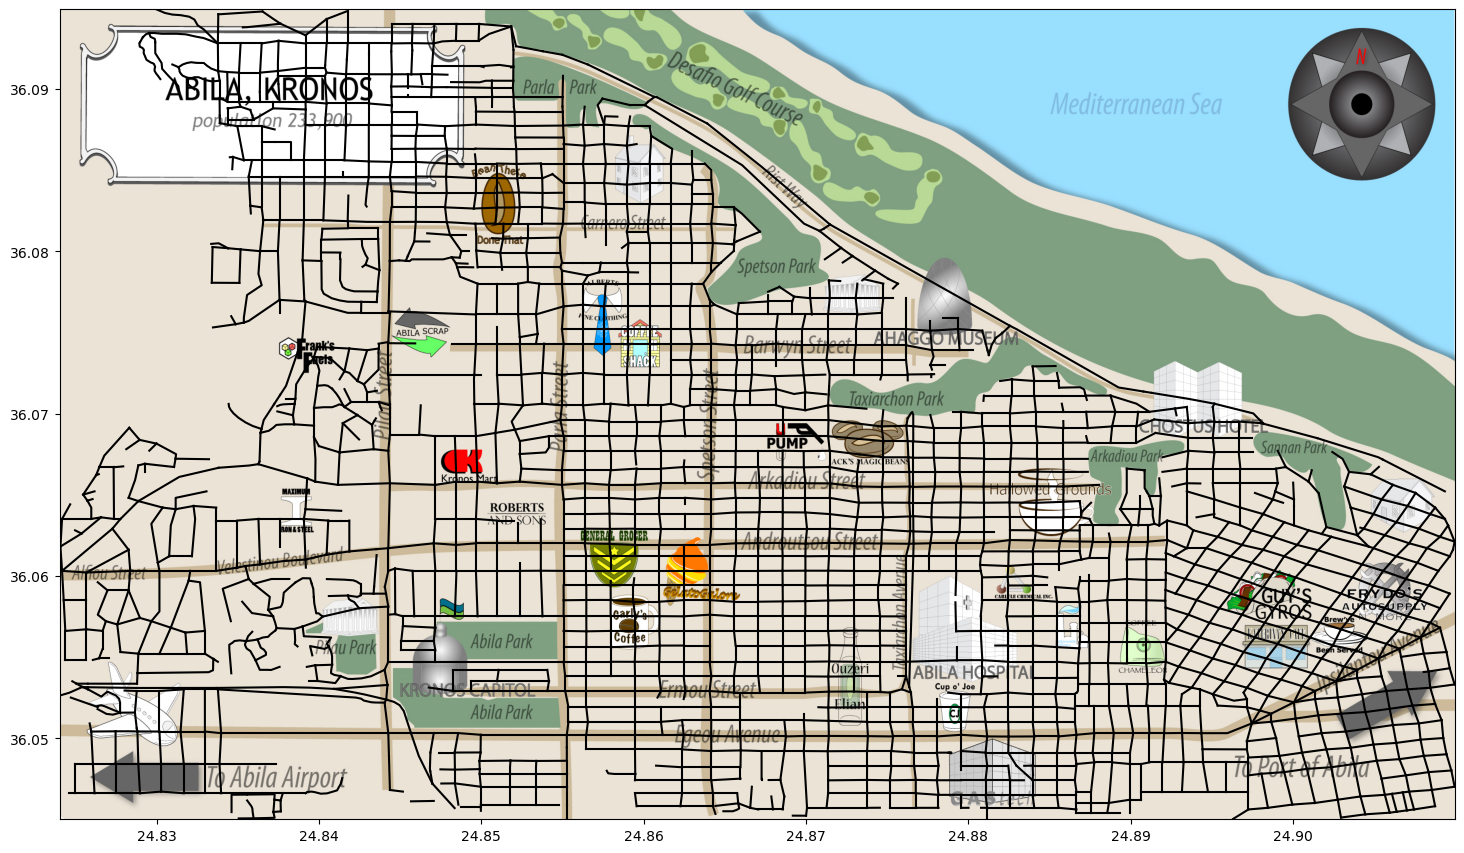

In [65]:
sf = shp.Reader("Geospatial/Abila.shp")

img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(18,18))
ax.imshow(img, extent=[24.824011, 24.909965, 36.045015, 36.094918])
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax = plt.plot(x,y, color ='k')
plt.show()

In [19]:
import shapefile as shp

shapefile_path = "Geospatial/Abila.shp"
sf = shp.Reader(shapefile_path)
min_x, min_y, max_x, max_y = float('inf'), float('inf'), float('-inf'), float('-inf')
for shape in sf.shapes():
    for point in shape.points:
        x, y = point
        if x < min_x:
            min_x = x
        if x > max_x:
            max_x = x
        if y < min_y:
            min_y = y
        if y > max_y:
            max_y = y

(min_x, min_y, max_x, max_y)


(24.824011000000013, 36.045015, 24.909965000000014, 36.094918)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import shapefile as shp
from ipywidgets import interact, Dropdown
from IPython.display import display

gps_data = pd.read_csv('gps.csv')

car_assignments = pd.read_csv('car-assignments.csv')

merged_data = pd.merge(gps_data, car_assignments, left_on='id', right_on='CarID', how='left')

merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])

merged_data['Date'] = merged_data['Timestamp'].dt.date

shapefile_path = 'Geospatial/Abila.shp'
sf = shp.Reader(shapefile_path)

merged_data = merged_data[(merged_data['long'] >= 24.824011) & (merged_data['long'] <= 24.909965) &
                          (merged_data['lat'] >= 36.045015) & (merged_data['lat'] <= 36.094918)]

def plot_paths(car_id, date):
    selected_data = merged_data[(merged_data['CarID'] == car_id) & (merged_data['Date'] == date)]

    img = plt.imread("map-tourist.jpg")

    fig, ax = plt.subplots(figsize=(18, 18))

    ax.imshow(img, extent=[24.824011, 24.909965, 36.045015, 36.094918])

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, color='blue')

    ax.scatter(selected_data['long'], selected_data['lat'], c='red', s=10, label='Path')

    ax.set_title(f'Car ID {car_id} on {date}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.legend()
    plt.show()

car_id_widget = Dropdown(options=merged_data['CarID'].unique().tolist(), description='Car ID:')
date_widget = Dropdown(options=merged_data['Date'].unique().tolist(), description='Date:')

display(car_id_widget, date_widget)
interact(plot_paths, car_id=car_id_widget, date=date_widget)


Dropdown(description='Car ID:', options=(35.0, 4.0, 19.0, 10.0, 7.0, 11.0, 32.0, 34.0, 17.0, 12.0, 18.0, 20.0,…

Dropdown(description='Date:', options=(datetime.date(2014, 1, 6), datetime.date(2014, 1, 7), datetime.date(201…

interactive(children=(Dropdown(description='Car ID:', options=(35.0, 4.0, 19.0, 10.0, 7.0, 11.0, 32.0, 34.0, 1…

<function __main__.plot_paths(car_id, date)>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import shapefile as shp
from ipywidgets import interact, Dropdown
from IPython.display import display

gps_data = pd.read_csv('gps.csv')

car_assignments = pd.read_csv('car-assignments.csv')

merged_data = pd.merge(gps_data, car_assignments, left_on='id', right_on='CarID', how='left')

merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])

merged_data['Date'] = merged_data['Timestamp'].dt.date

merged_data = merged_data[(merged_data['long'] >= 24.824011) & (merged_data['long'] <= 24.909965) &
                          (merged_data['lat'] >= 36.045015) & (merged_data['lat'] <= 36.094918)]

def plot_paths(car_id, date):
    selected_data = merged_data[(merged_data['CarID'] == car_id) & (merged_data['Date'] == date)]

    img = plt.imread("map-tourist.jpg")

    fig, ax = plt.subplots(figsize=(18, 18))

    ax.imshow(img, extent=[24.824011, 24.909965, 36.045015, 36.094918])

    ax.scatter(selected_data['long'], selected_data['lat'], c='red', s=10, label='Path')
    ax.plot(selected_data['long'], selected_data['lat'], c='red')

    ax.set_title(f'Car ID {car_id} on {date}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.legend()
    plt.show()

car_id_widget = Dropdown(options=merged_data['CarID'].unique().tolist(), description='Car ID:')
date_widget = Dropdown(options=merged_data['Date'].unique().tolist(), description='Date:')

display(car_id_widget, date_widget)

interact(plot_paths, car_id=car_id_widget, date=date_widget)


Dropdown(description='Car ID:', options=(35.0, 4.0, 19.0, 10.0, 7.0, 11.0, 32.0, 34.0, 17.0, 12.0, 18.0, 20.0,…

Dropdown(description='Date:', options=(datetime.date(2014, 1, 6), datetime.date(2014, 1, 7), datetime.date(201…

interactive(children=(Dropdown(description='Car ID:', options=(35.0, 4.0, 19.0, 10.0, 7.0, 11.0, 32.0, 34.0, 1…

<function __main__.plot_paths(car_id, date)>

In [30]:
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])
merged_data['Date'] = merged_data['Timestamp'].dt.date
def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

merged_data['TimeOfDay'] = merged_data['Timestamp'].apply(categorize_time_of_day)

merged_data = merged_data[(merged_data['long'] >= 24.824011) & (merged_data['long'] <= 24.909965) &
                          (merged_data['lat'] >= 36.045015) & (merged_data['lat'] <= 36.094918)]

def plot_paths(car_id, date, employment_type, time_of_day):
    selected_data = merged_data[(merged_data['CarID'] == car_id) & 
                                (merged_data['Date'] == date) &
                                (merged_data['CurrentEmploymentType'] == employment_type) & 
                                (merged_data['TimeOfDay'] == time_of_day)]

    img = plt.imread("map-tourist.jpg")

    fig, ax = plt.subplots(figsize=(18, 18))

    ax.imshow(img, extent=[24.824011, 24.909965, 36.045015, 36.094918])

    ax.scatter(selected_data['long'], selected_data['lat'], c='red', s=10, label='Path')
    ax.plot(selected_data['long'], selected_data['lat'], c='red')

    ax.set_title(f'Car ID {car_id} - {employment_type} during {time_of_day} on {date}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.legend()
    plt.show()

car_id_widget = Dropdown(options=merged_data['CarID'].unique().tolist(), description='Car ID:')
date_widget = Dropdown(options=merged_data['Date'].unique().tolist(), description='Date:')
employment_type_widget = Dropdown(options=merged_data['CurrentEmploymentType'].unique().tolist(), description='Employment Type:')
time_of_day_widget = Dropdown(options=['morning', 'afternoon', 'evening', 'night'], description='Time of Day:')

display(car_id_widget, date_widget, employment_type_widget, time_of_day_widget)
interact(plot_paths, car_id=car_id_widget, date=date_widget, employment_type=employment_type_widget, time_of_day=time_of_day_widget)

Dropdown(description='Car ID:', options=(35.0, 4.0, 19.0, 10.0, 7.0, 11.0, 32.0, 34.0, 17.0, 12.0, 18.0, 20.0,…

Dropdown(description='Date:', options=(datetime.date(2014, 1, 6), datetime.date(2014, 1, 7), datetime.date(201…

Dropdown(description='Employment Type:', options=('Executive', 'Engineering', 'Security', 'Information Technol…

Dropdown(description='Time of Day:', options=('morning', 'afternoon', 'evening', 'night'), value='morning')

interactive(children=(Dropdown(description='Car ID:', options=(35.0, 4.0, 19.0, 10.0, 7.0, 11.0, 32.0, 34.0, 1…

<function __main__.plot_paths(car_id, date, employment_type, time_of_day)>

Anamoly 1

In [26]:
it_transactions = merged_cc[(merged_cc['price'] > 5000) & (merged_cc['CurrentEmploymentType'] == 'Information Technology')]
it_transactions


timestamp                   location    price FirstName  \
842 2014-01-13 19:20:00  Frydos Autosupply n' More  10000.0     Lucas   

    LastName  CarID   CurrentEmploymentType CurrentEmploymentTitle  \
842  Alcazar    1.0  Information Technology            IT Helpdesk   

    time_of_day        date  
842     evening  2014-01-13

Anomaly 2

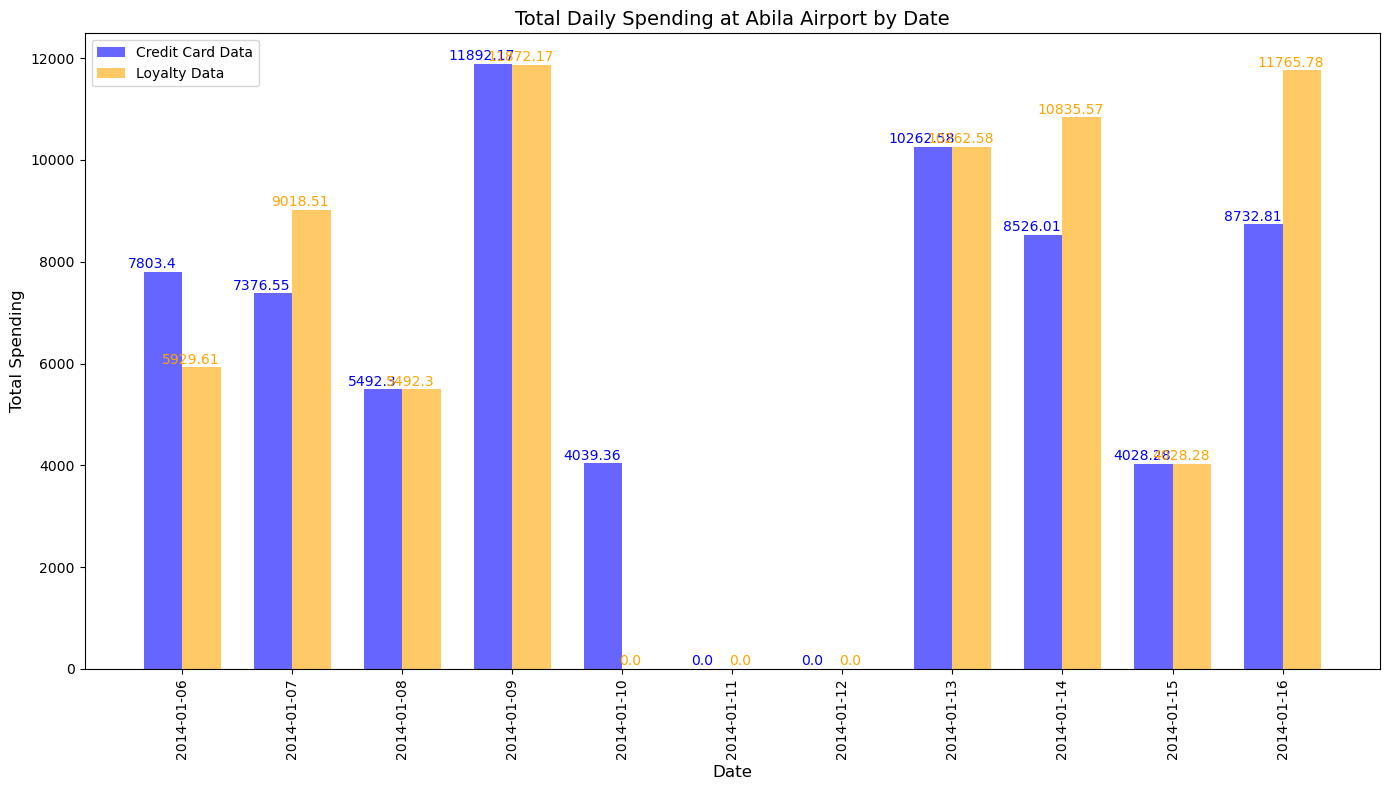

<Figure size 640x480 with 0 Axes>

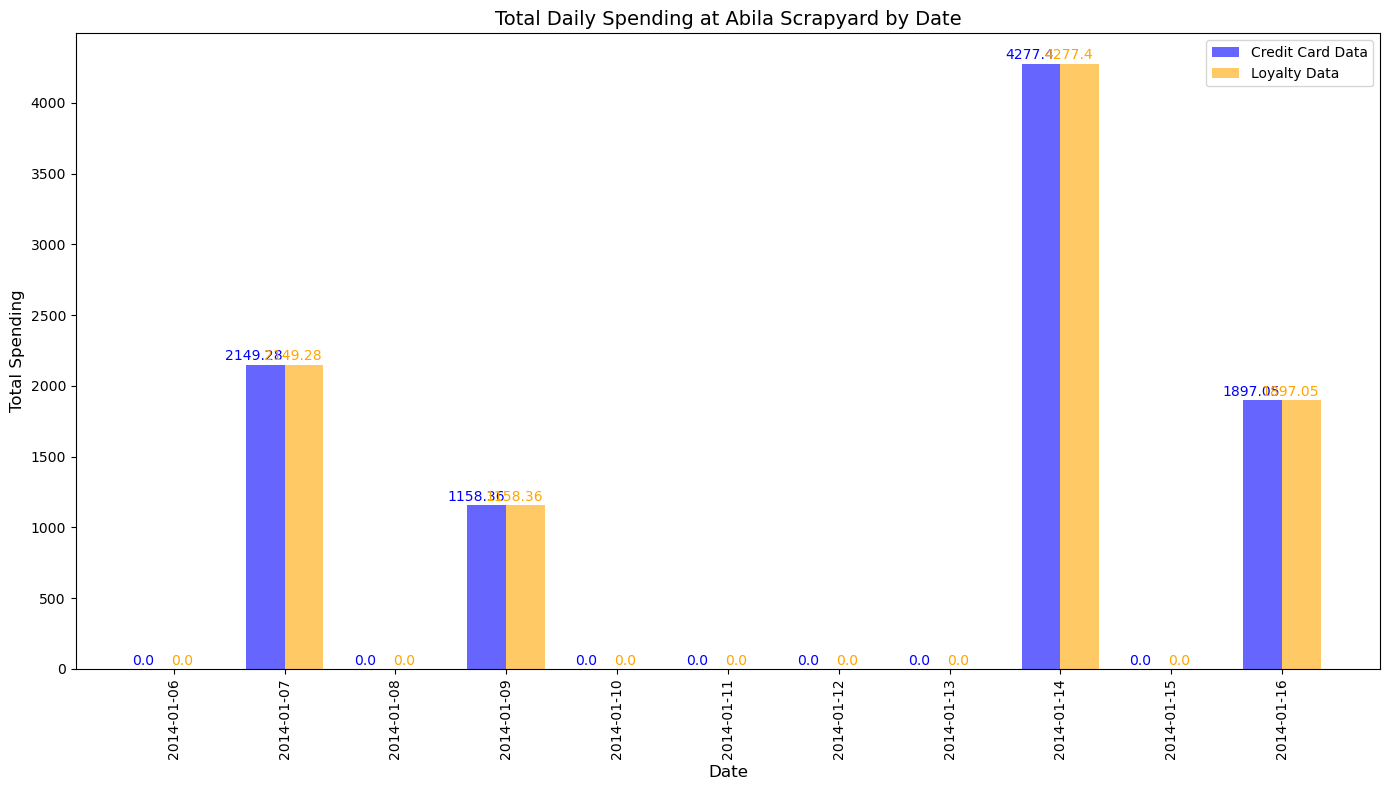

<Figure size 640x480 with 0 Axes>

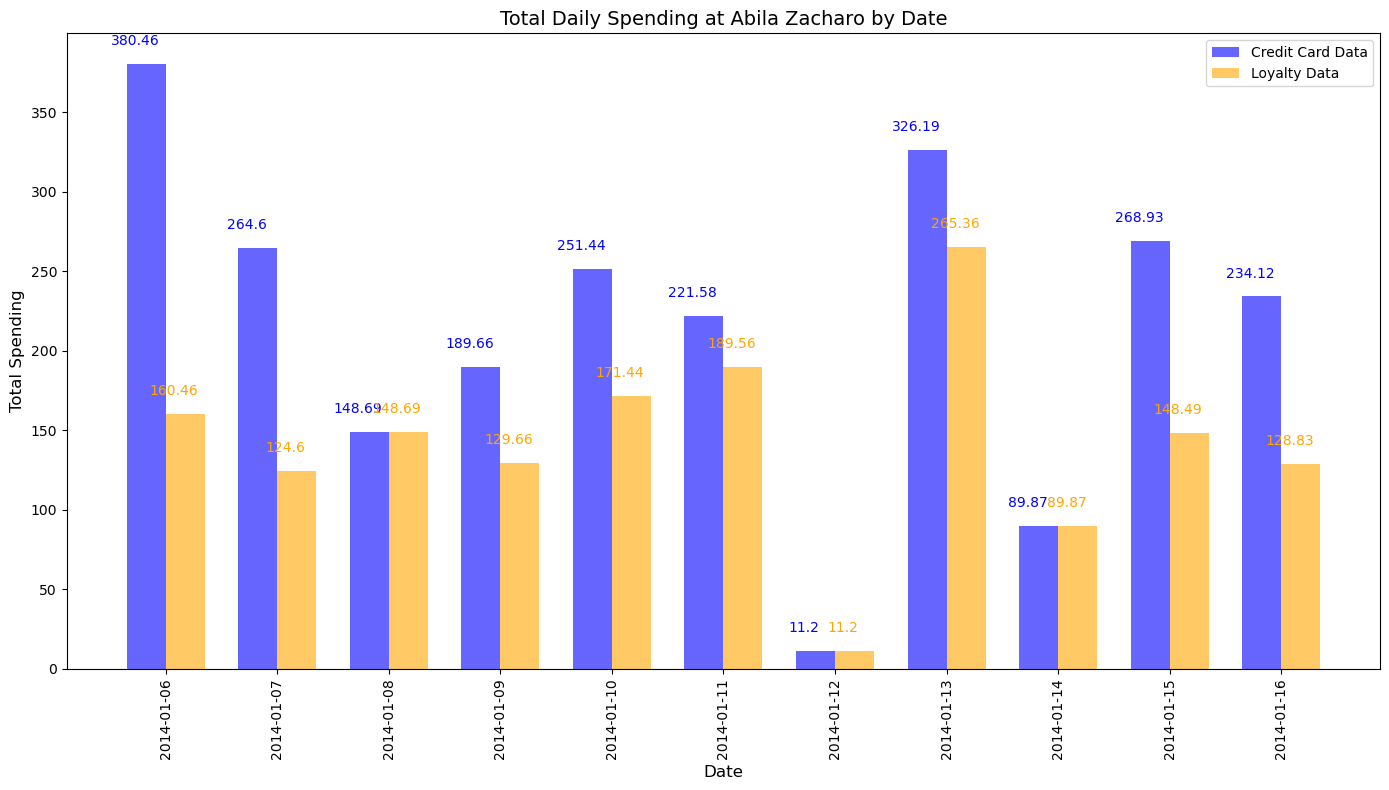

<Figure size 640x480 with 0 Axes>

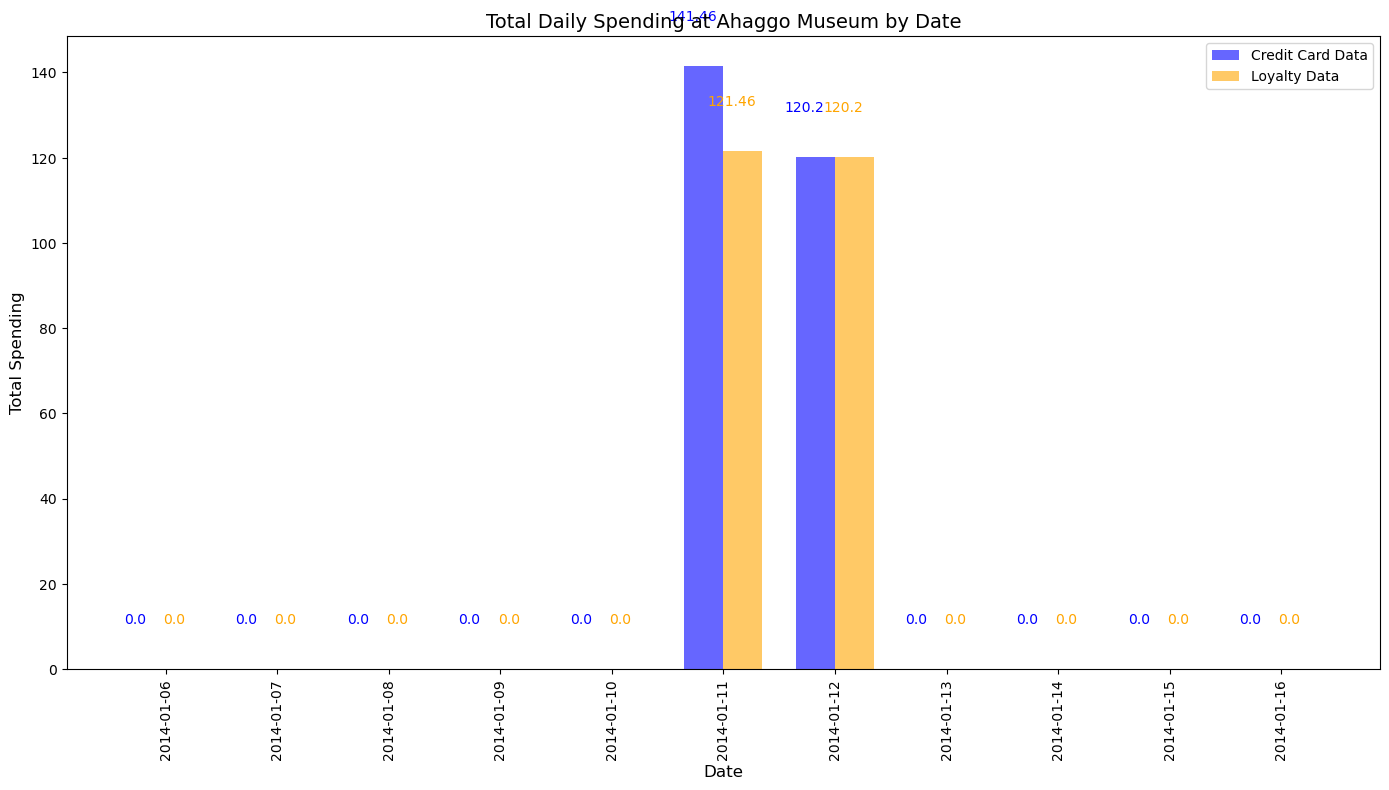

<Figure size 640x480 with 0 Axes>

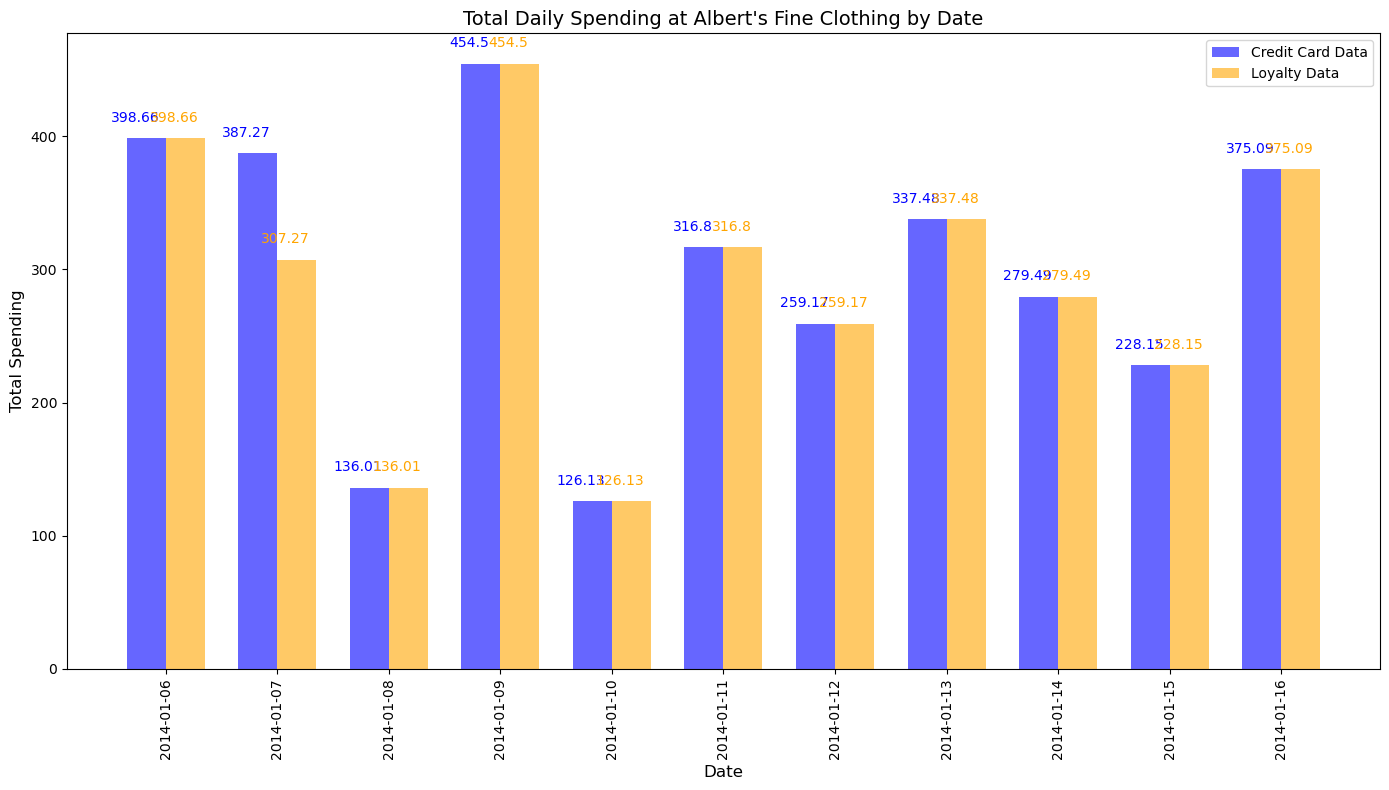

<Figure size 640x480 with 0 Axes>

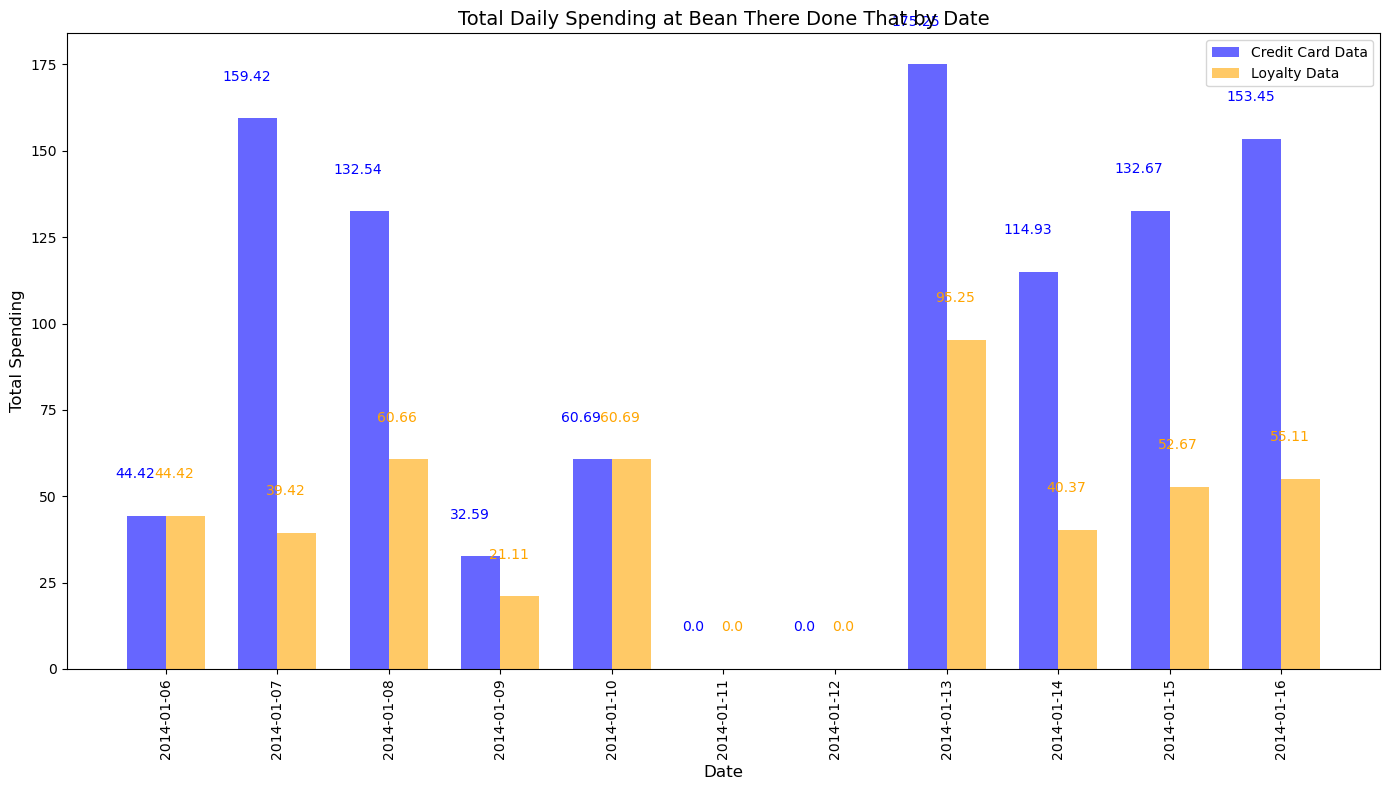

<Figure size 640x480 with 0 Axes>

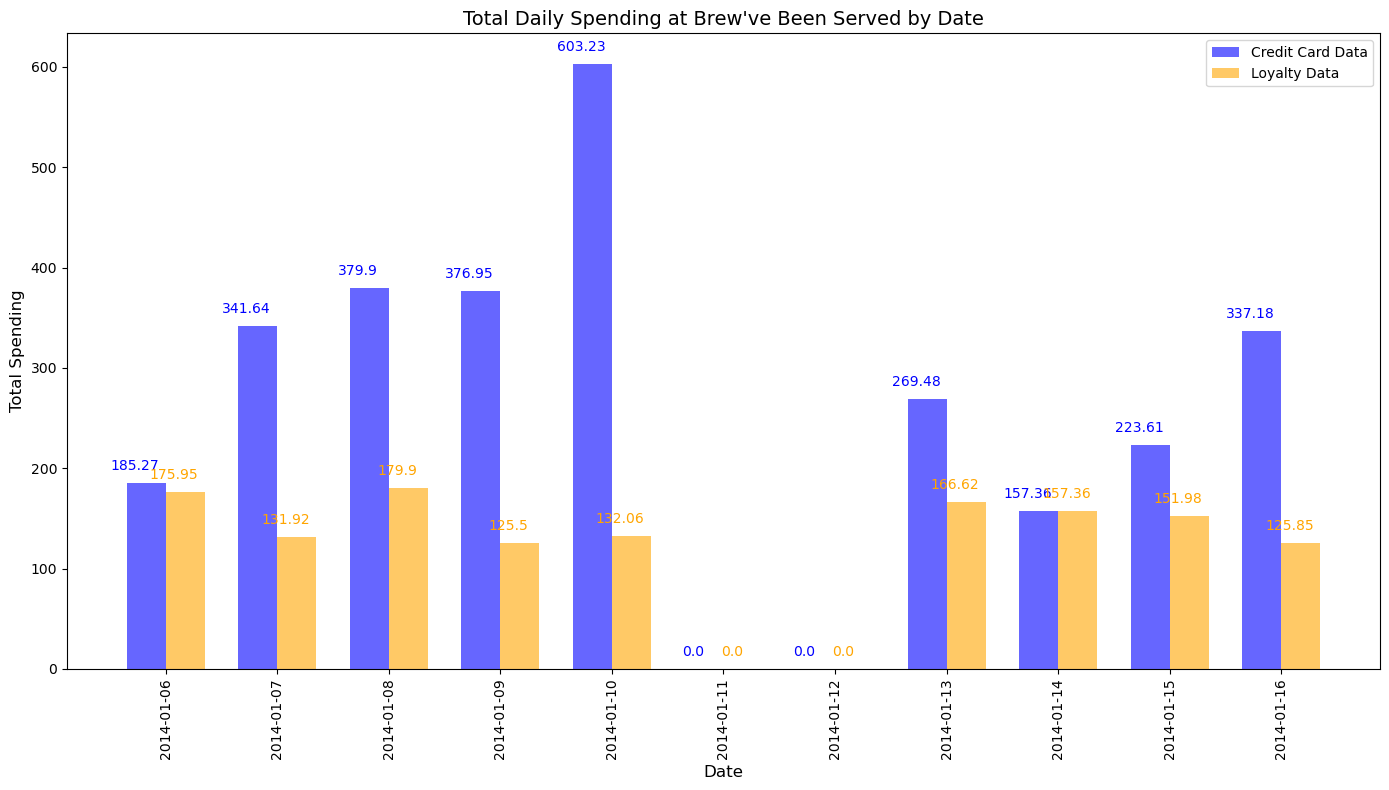

<Figure size 640x480 with 0 Axes>

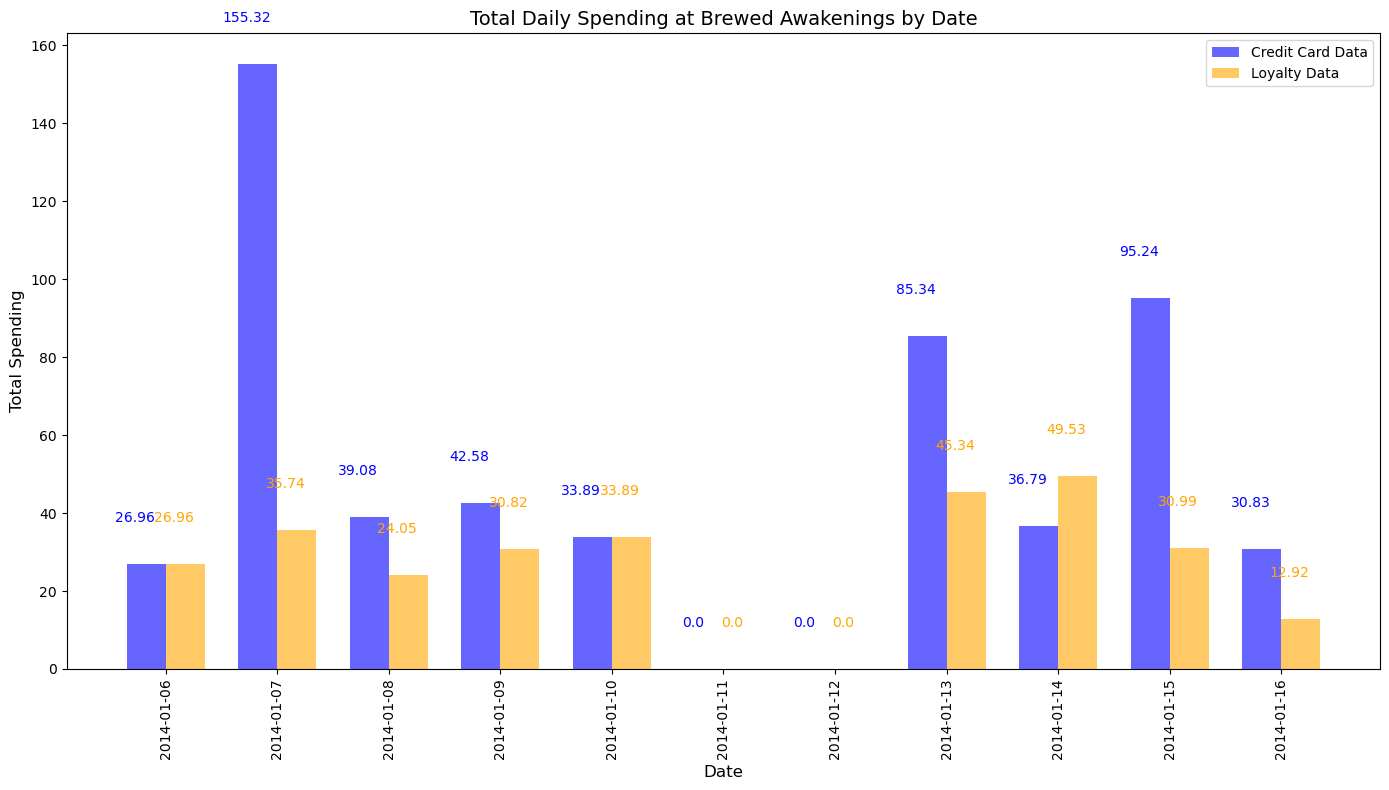

<Figure size 640x480 with 0 Axes>

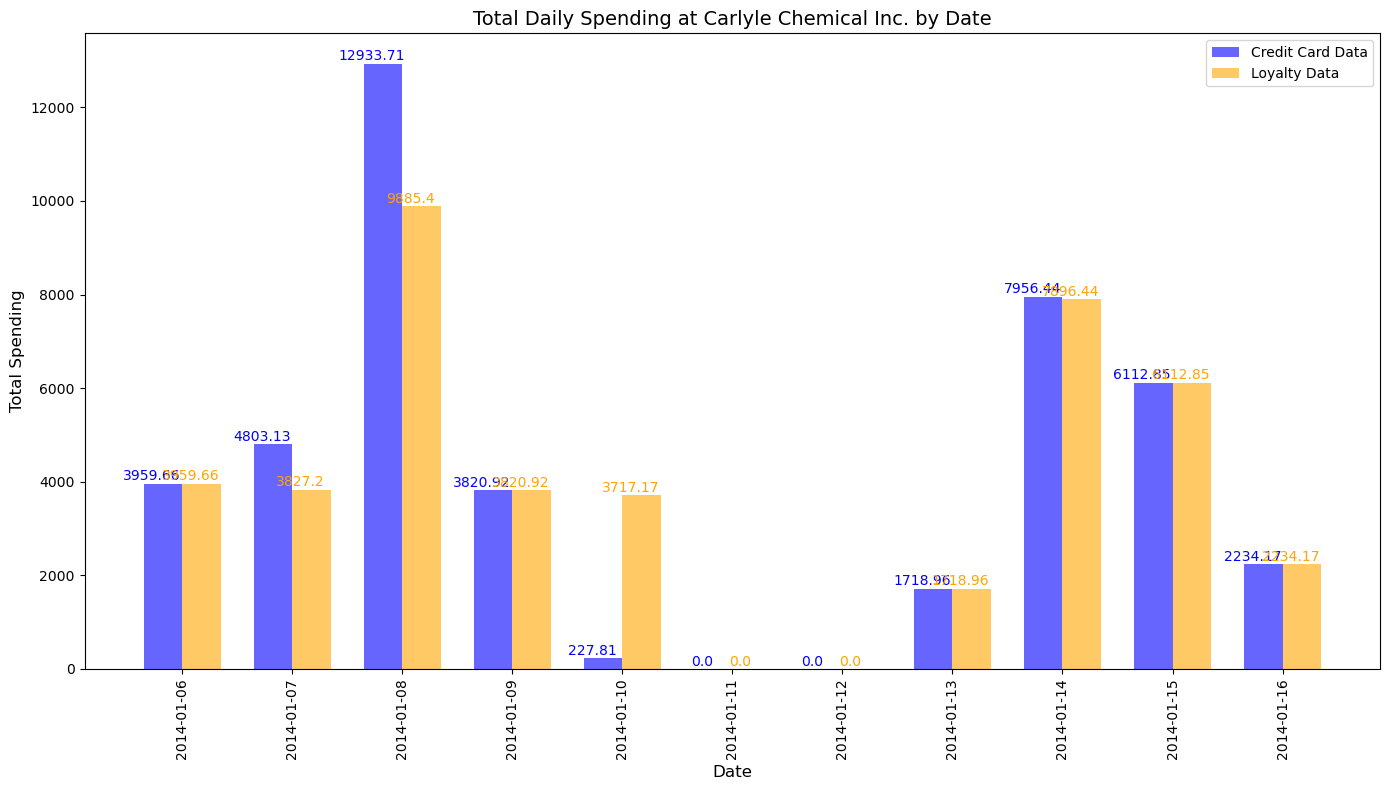

<Figure size 640x480 with 0 Axes>

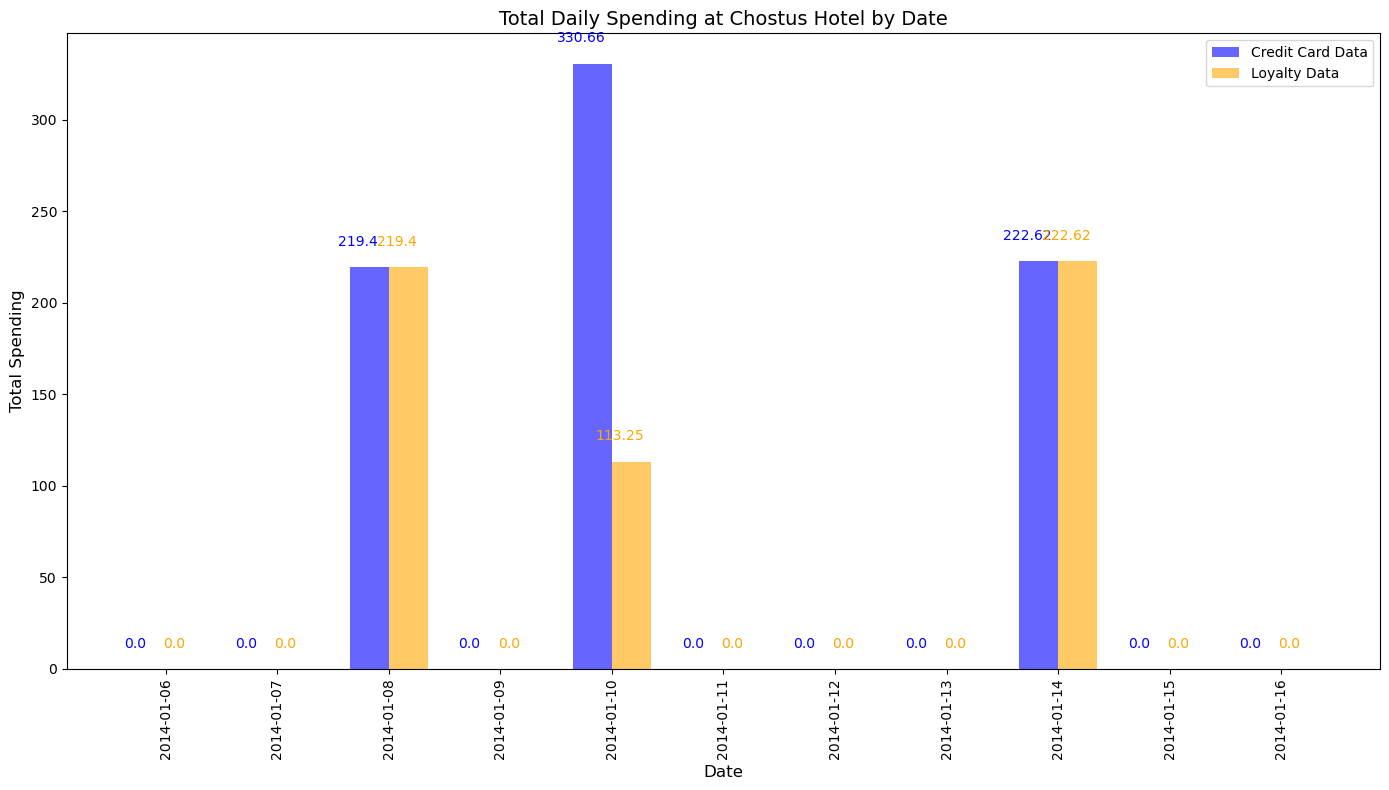

<Figure size 640x480 with 0 Axes>

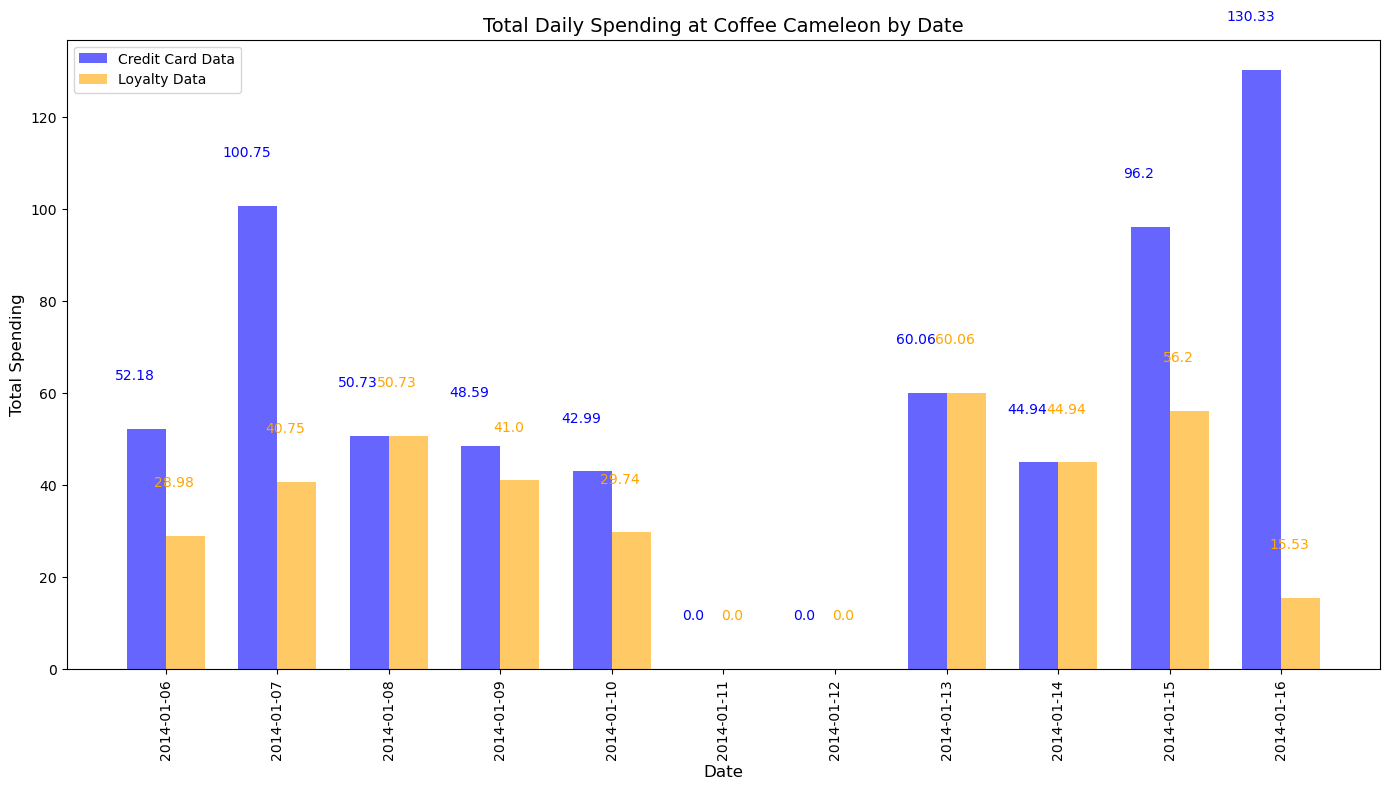

<Figure size 640x480 with 0 Axes>

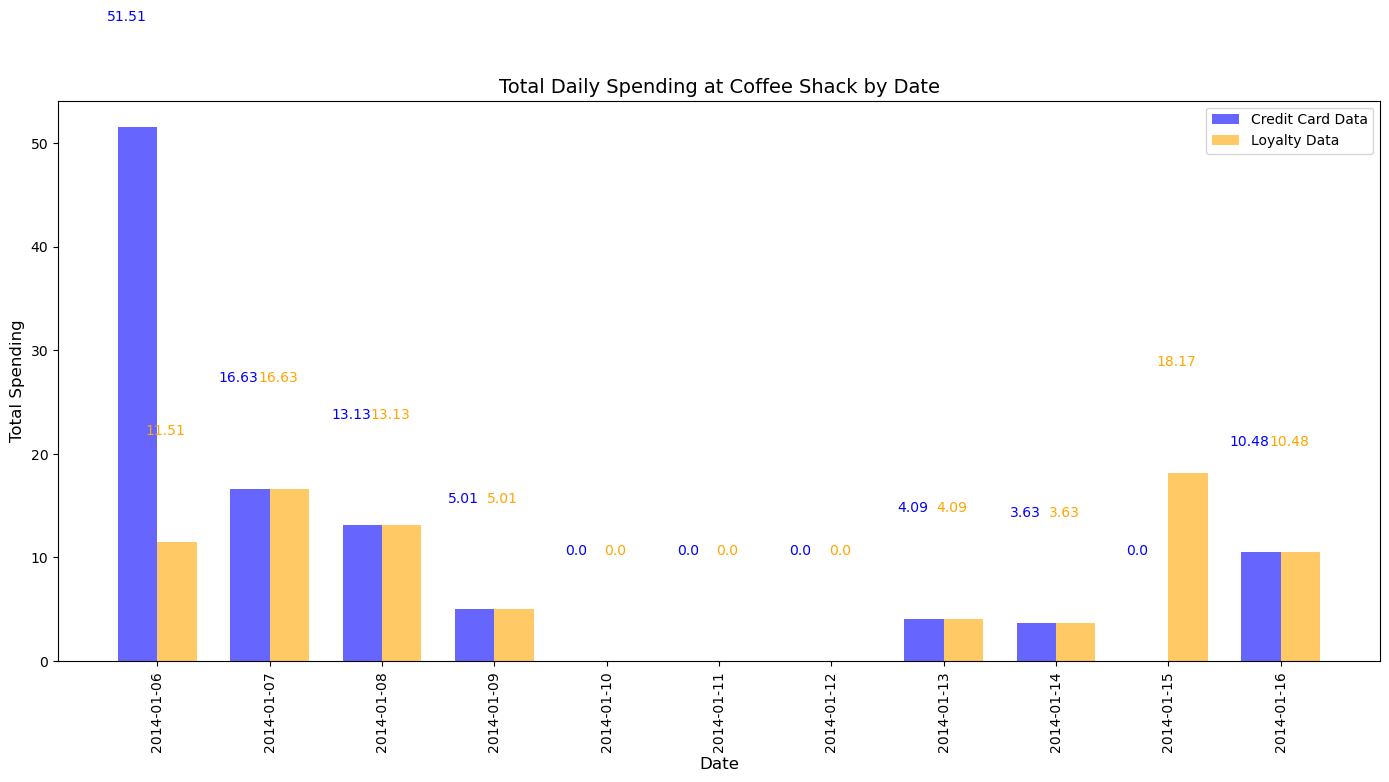

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/420135645.py:73: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

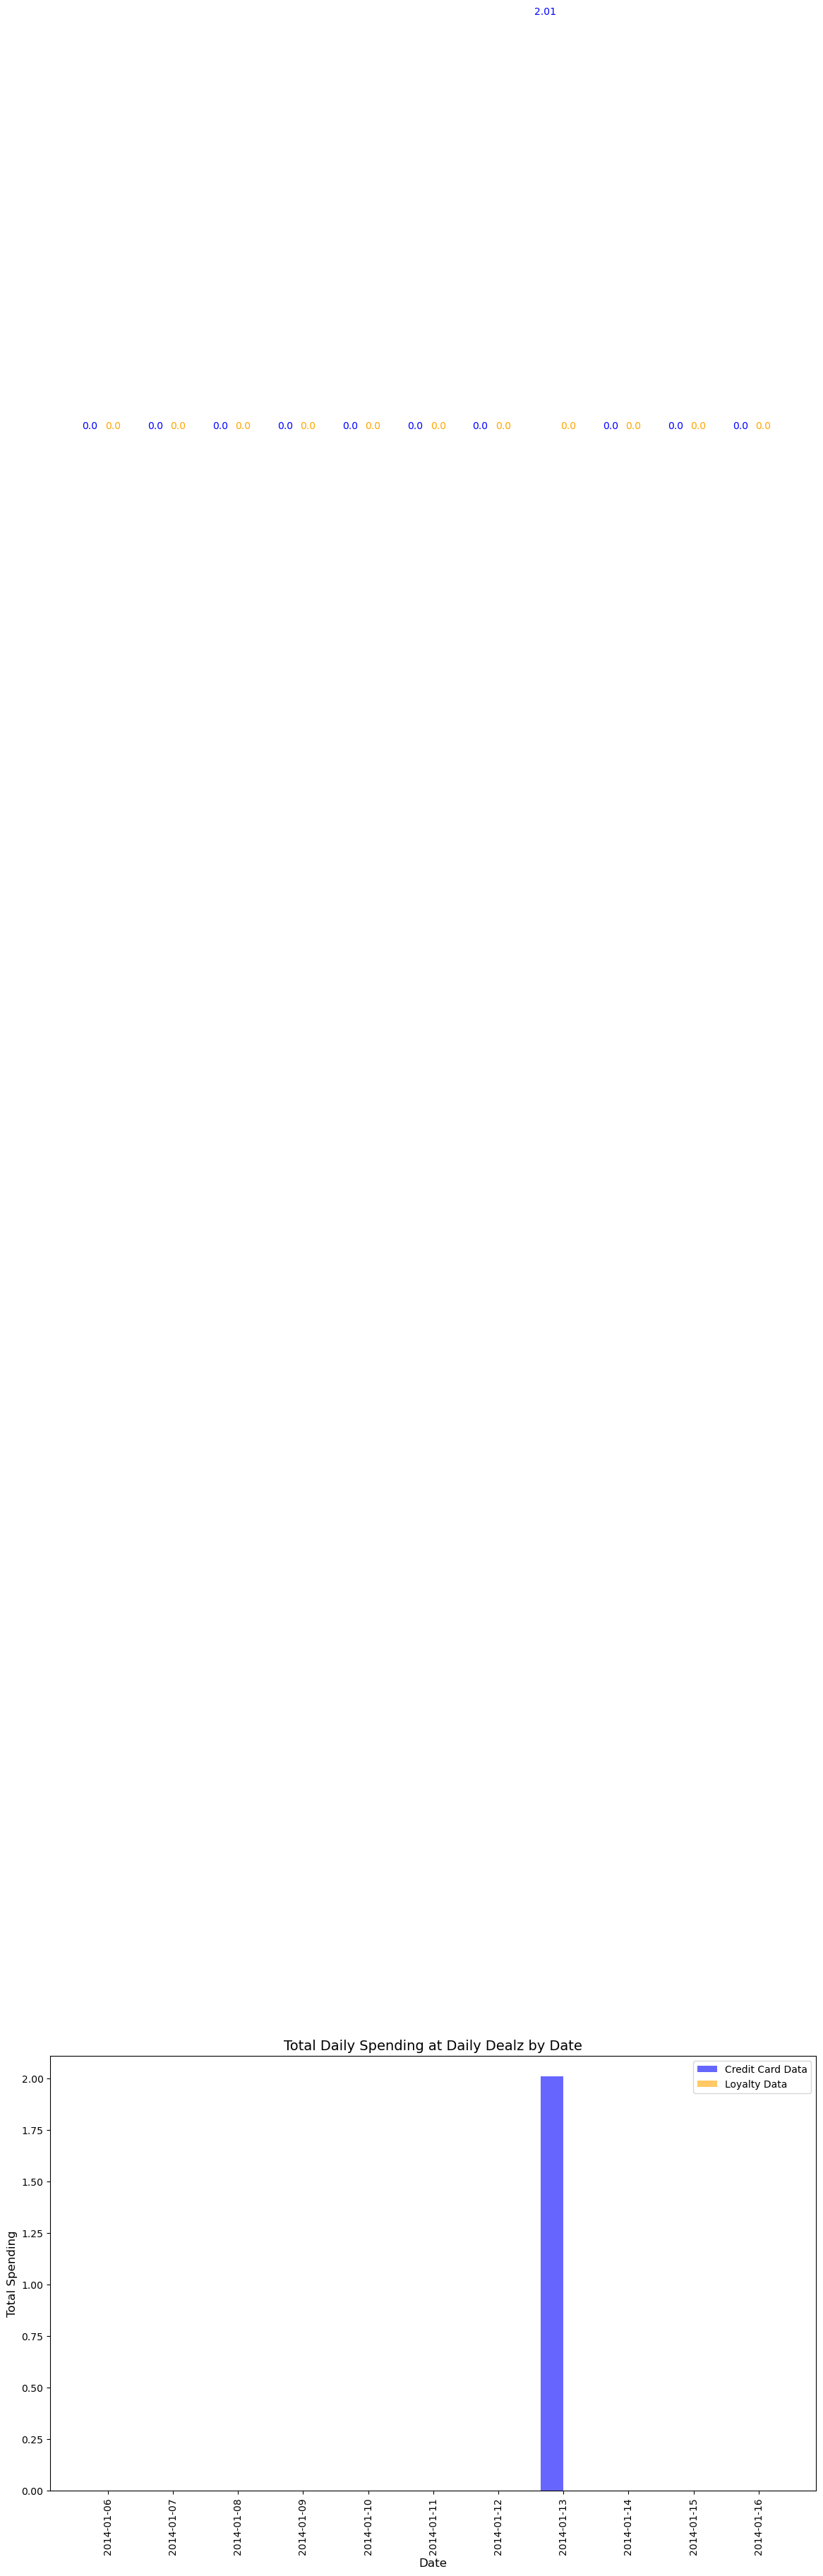

<Figure size 640x480 with 0 Axes>

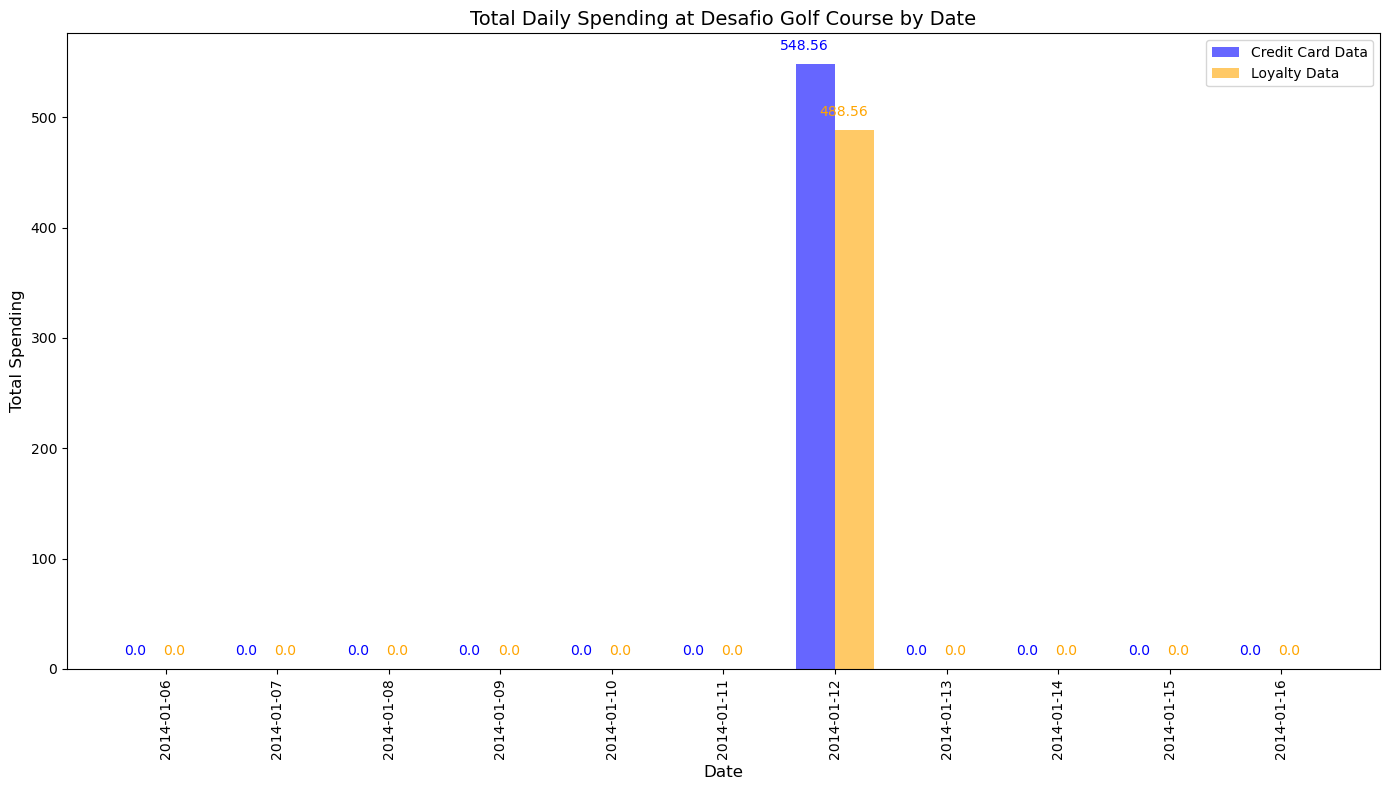

<Figure size 640x480 with 0 Axes>

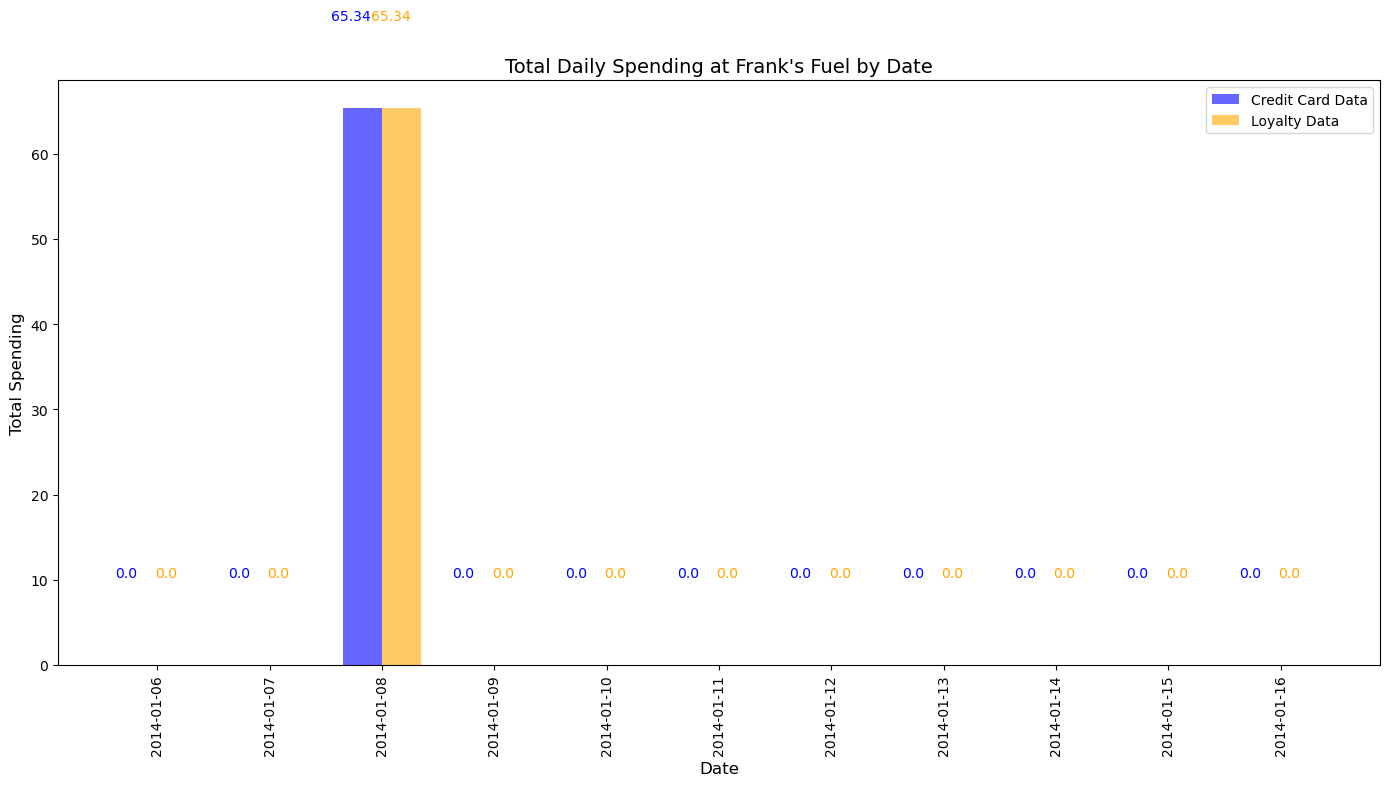

<Figure size 640x480 with 0 Axes>

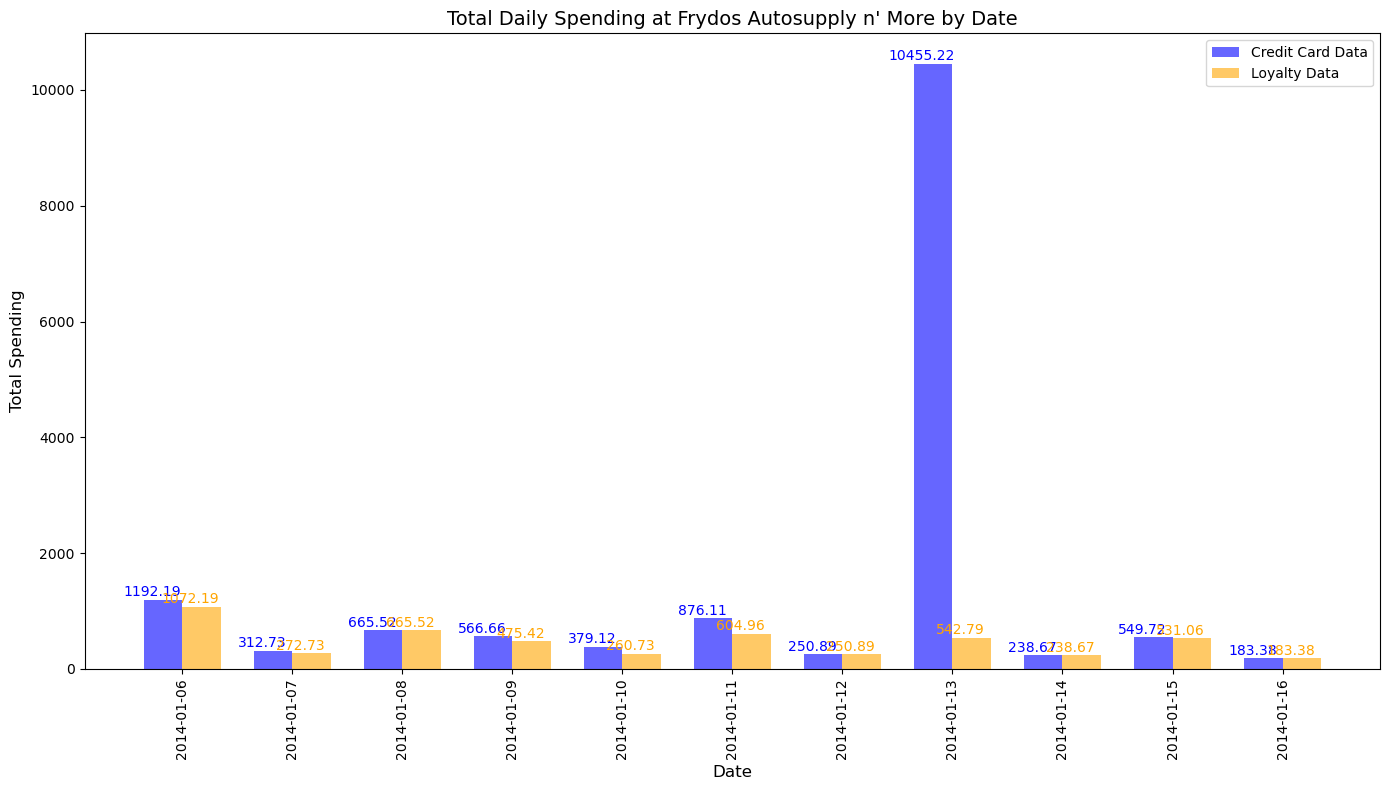

<Figure size 640x480 with 0 Axes>

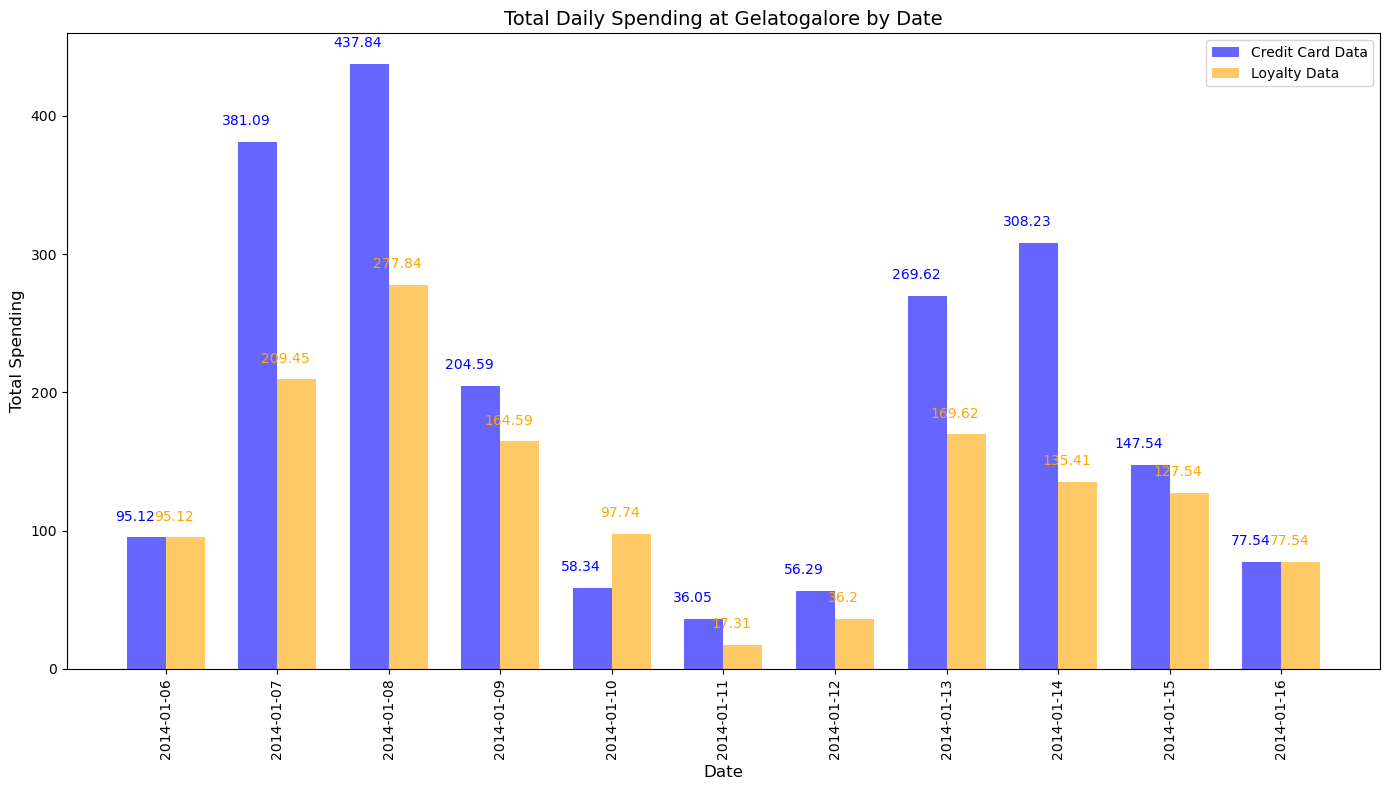

<Figure size 640x480 with 0 Axes>

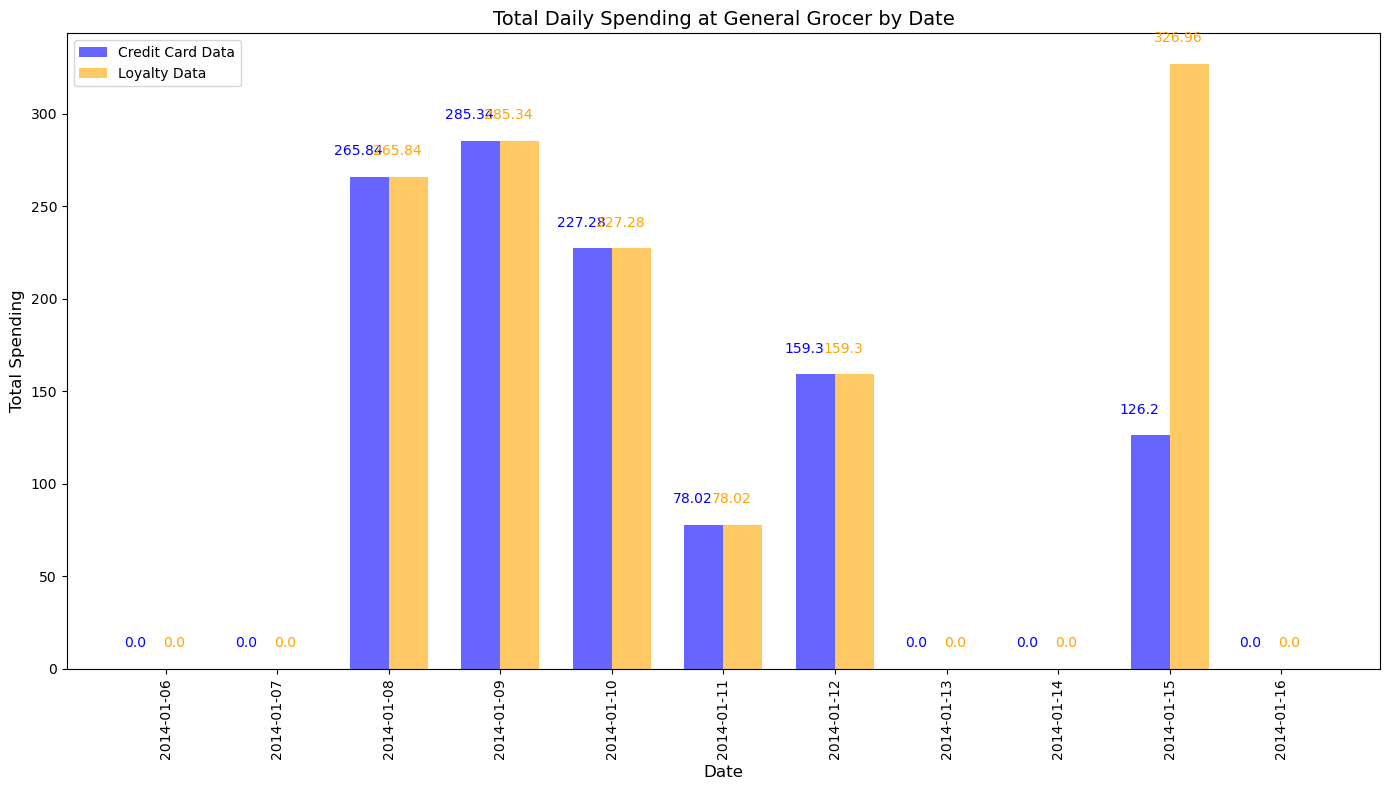

<Figure size 640x480 with 0 Axes>

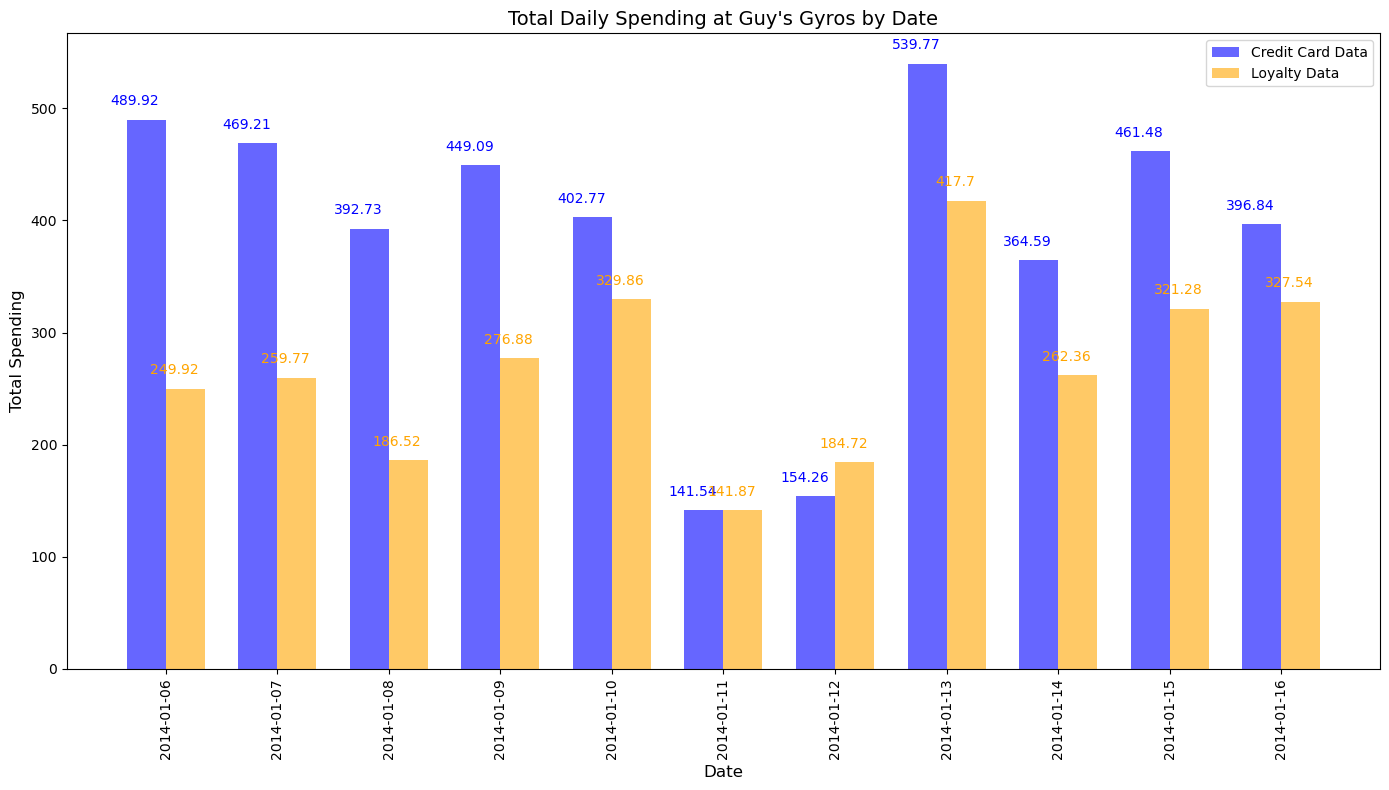

<Figure size 640x480 with 0 Axes>

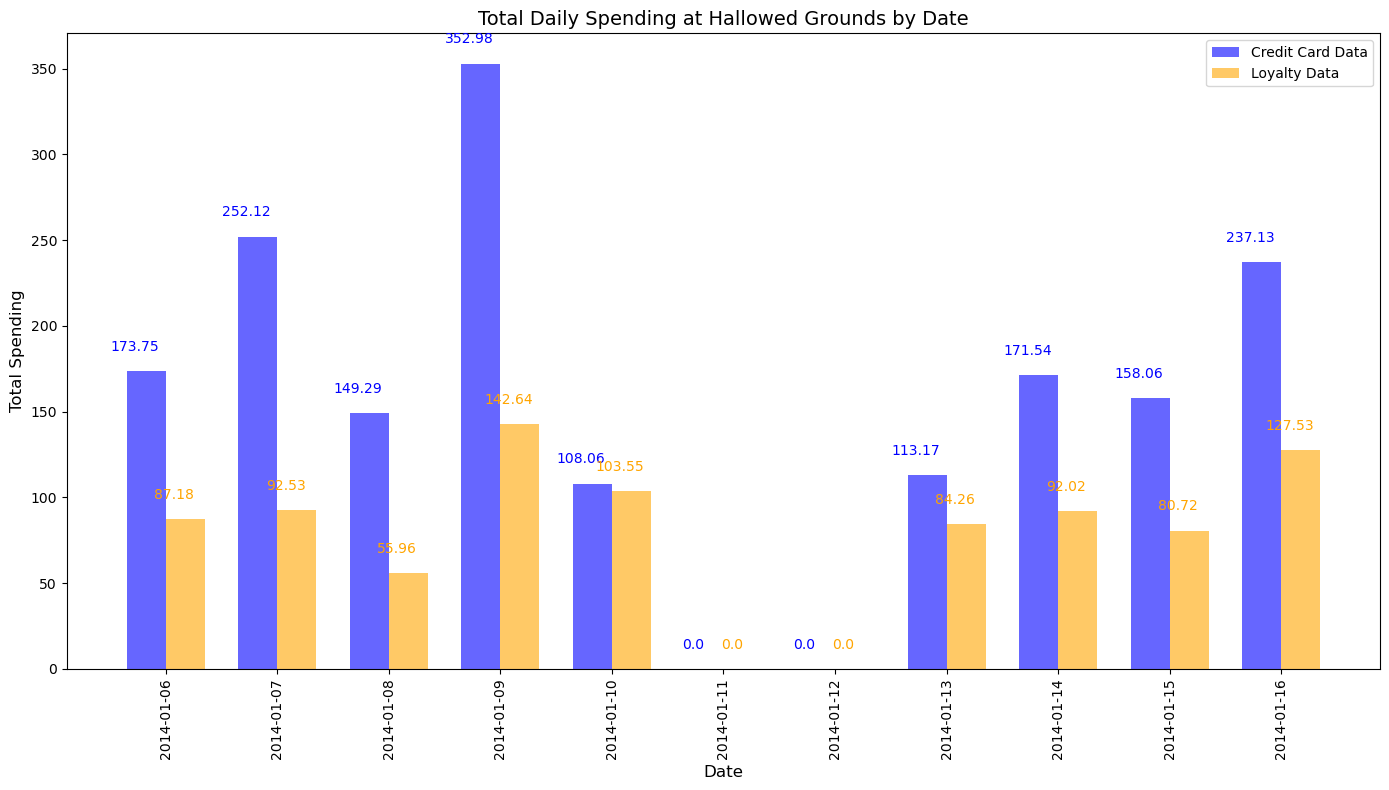

<Figure size 640x480 with 0 Axes>

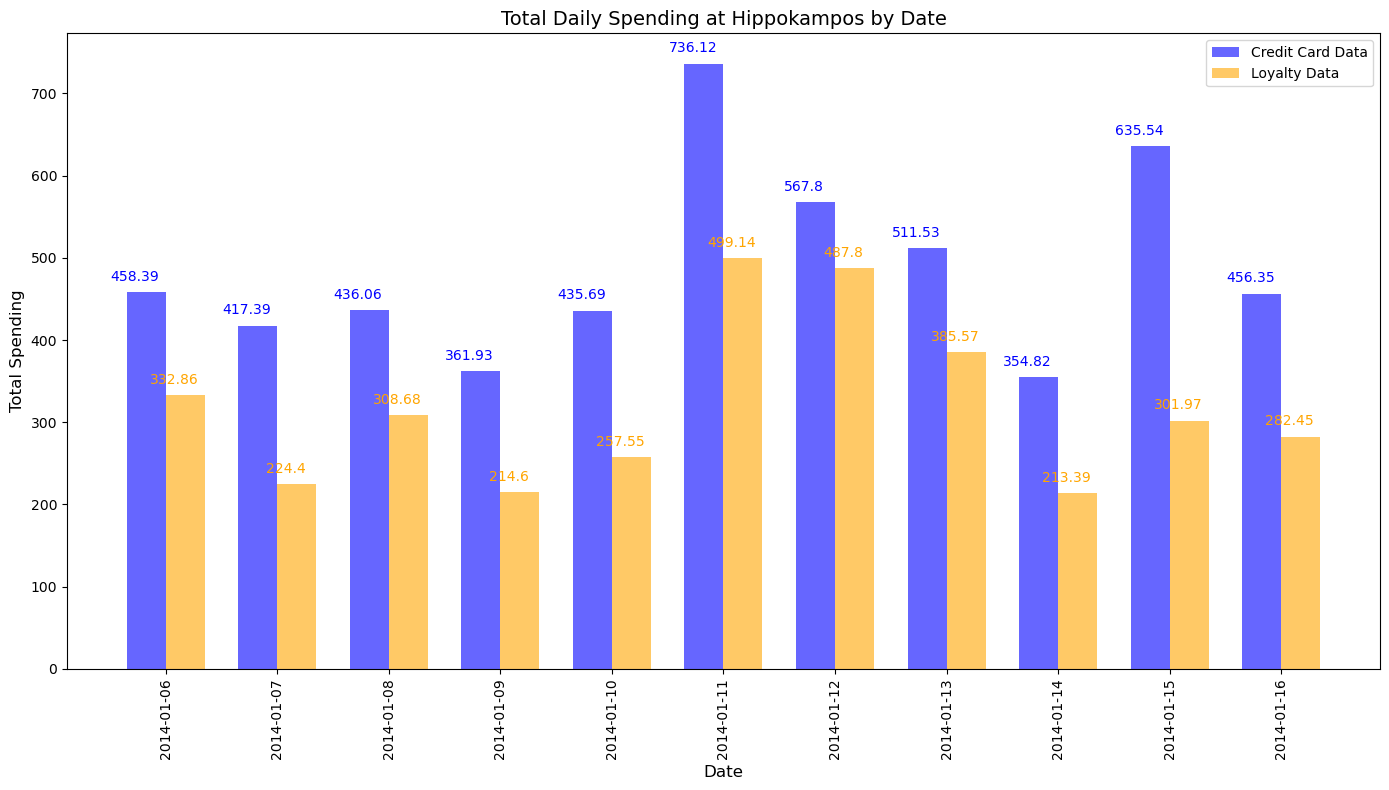

<Figure size 640x480 with 0 Axes>

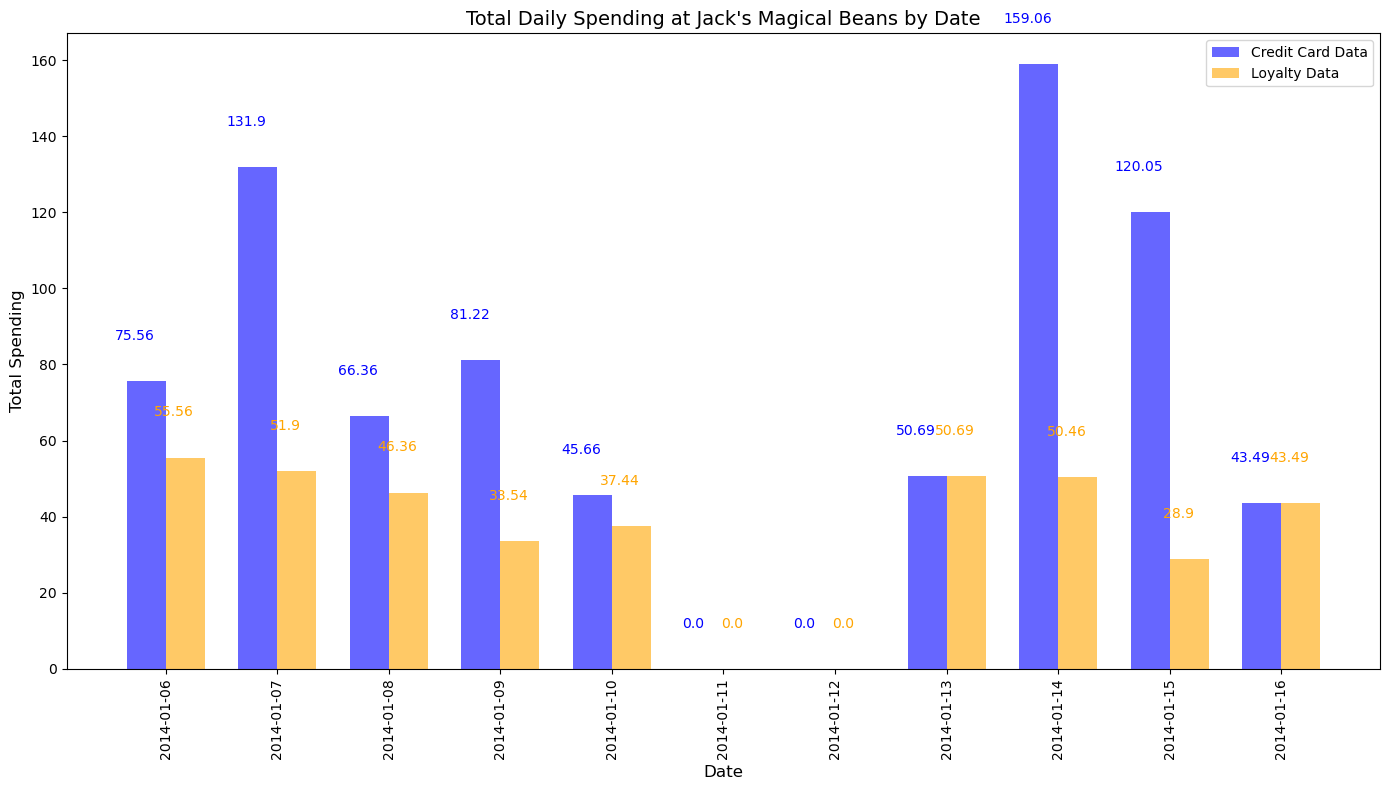

<Figure size 640x480 with 0 Axes>

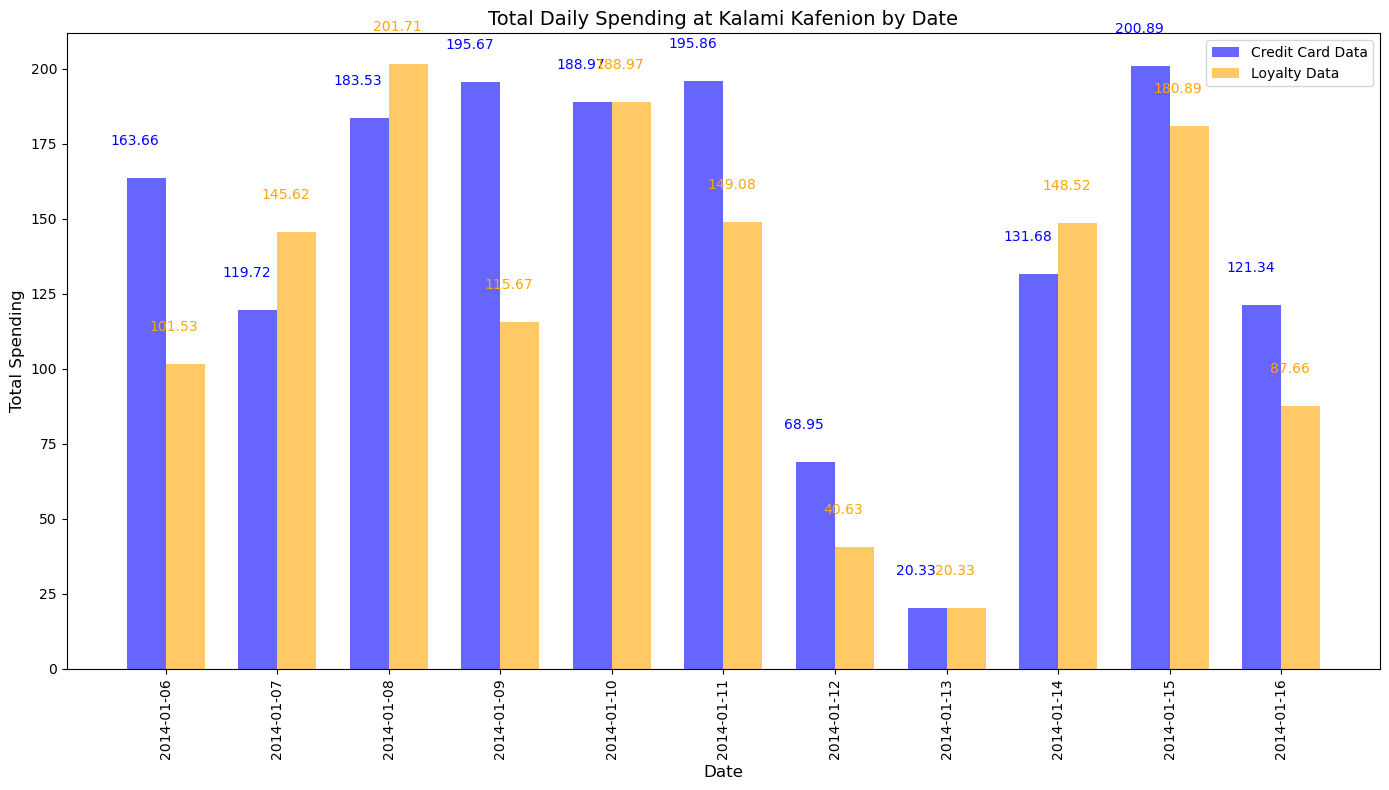

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/420135645.py:73: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


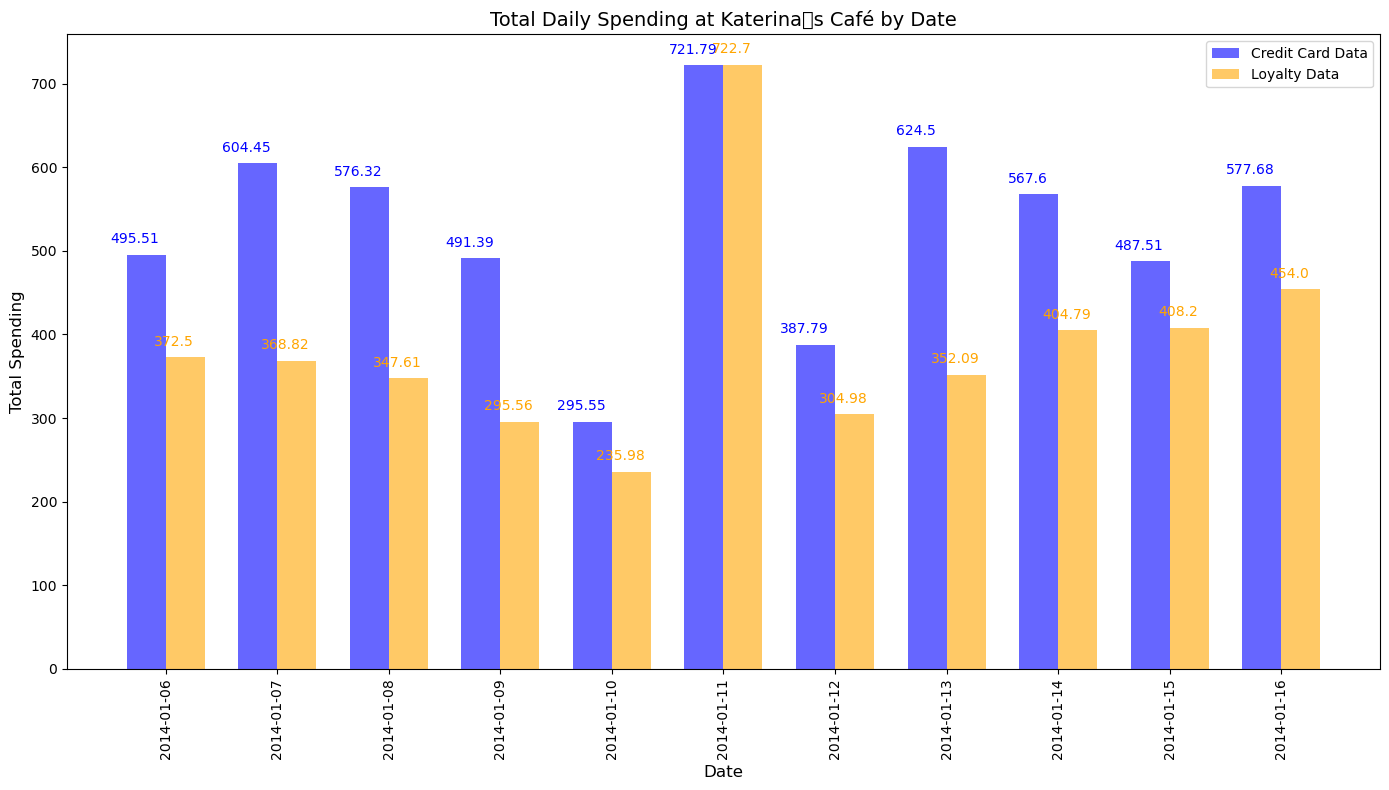

<Figure size 640x480 with 0 Axes>

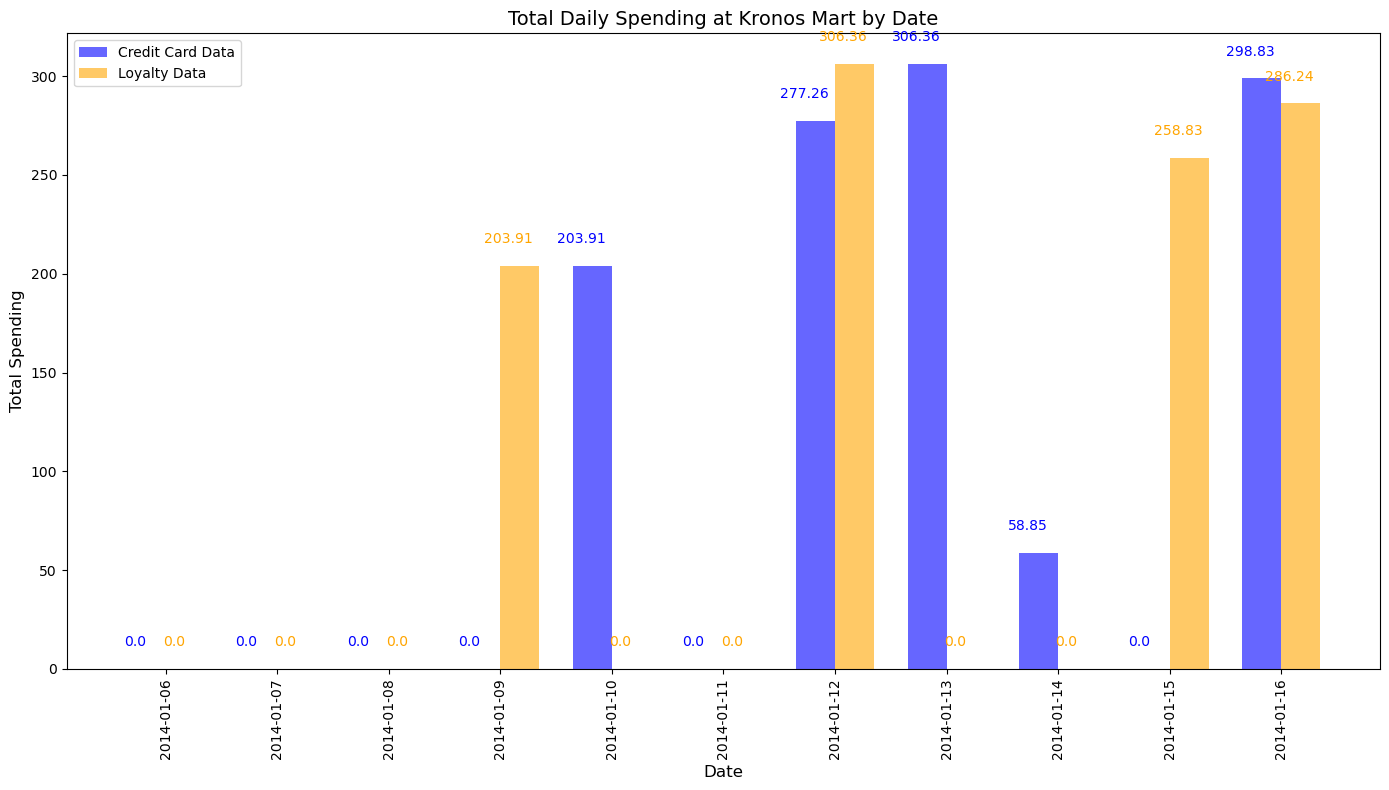

<Figure size 640x480 with 0 Axes>

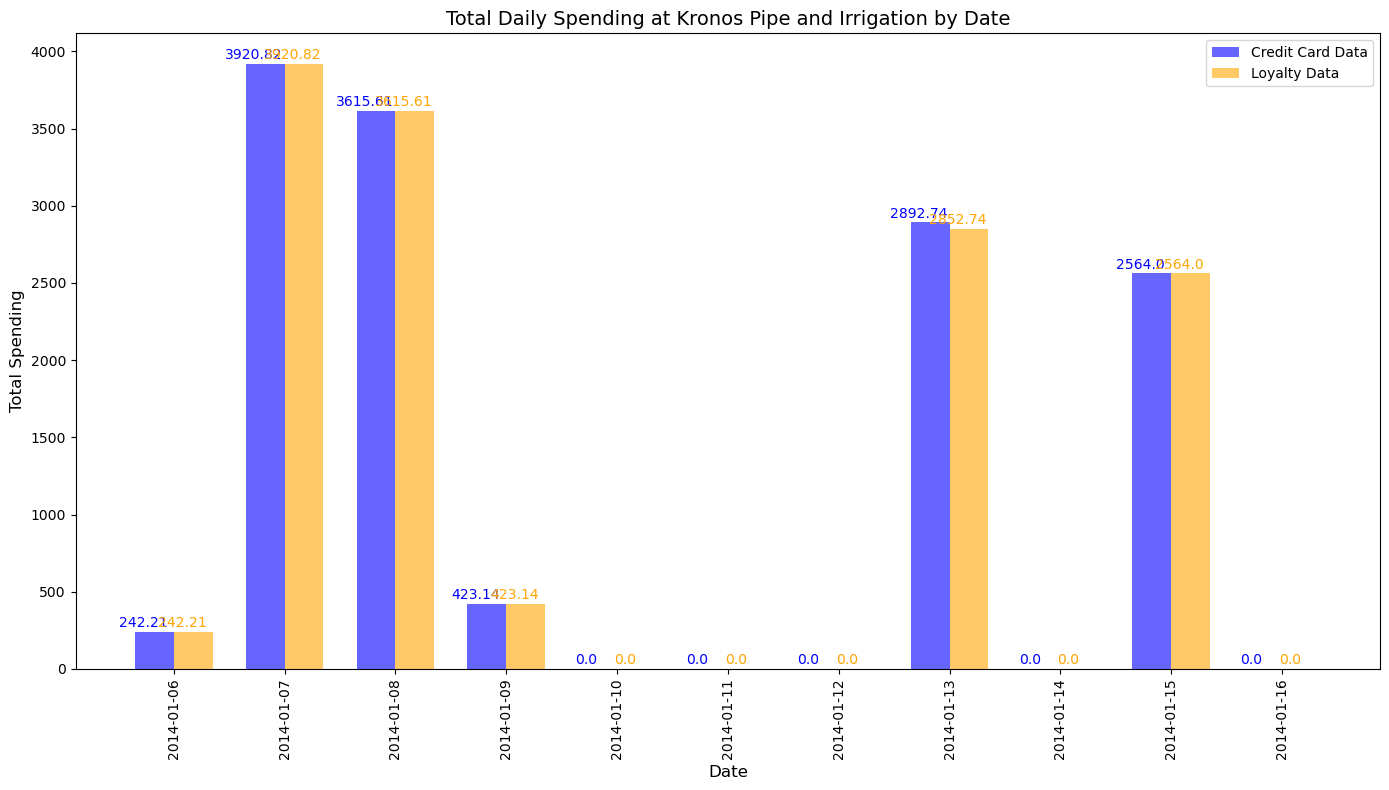

<Figure size 640x480 with 0 Axes>

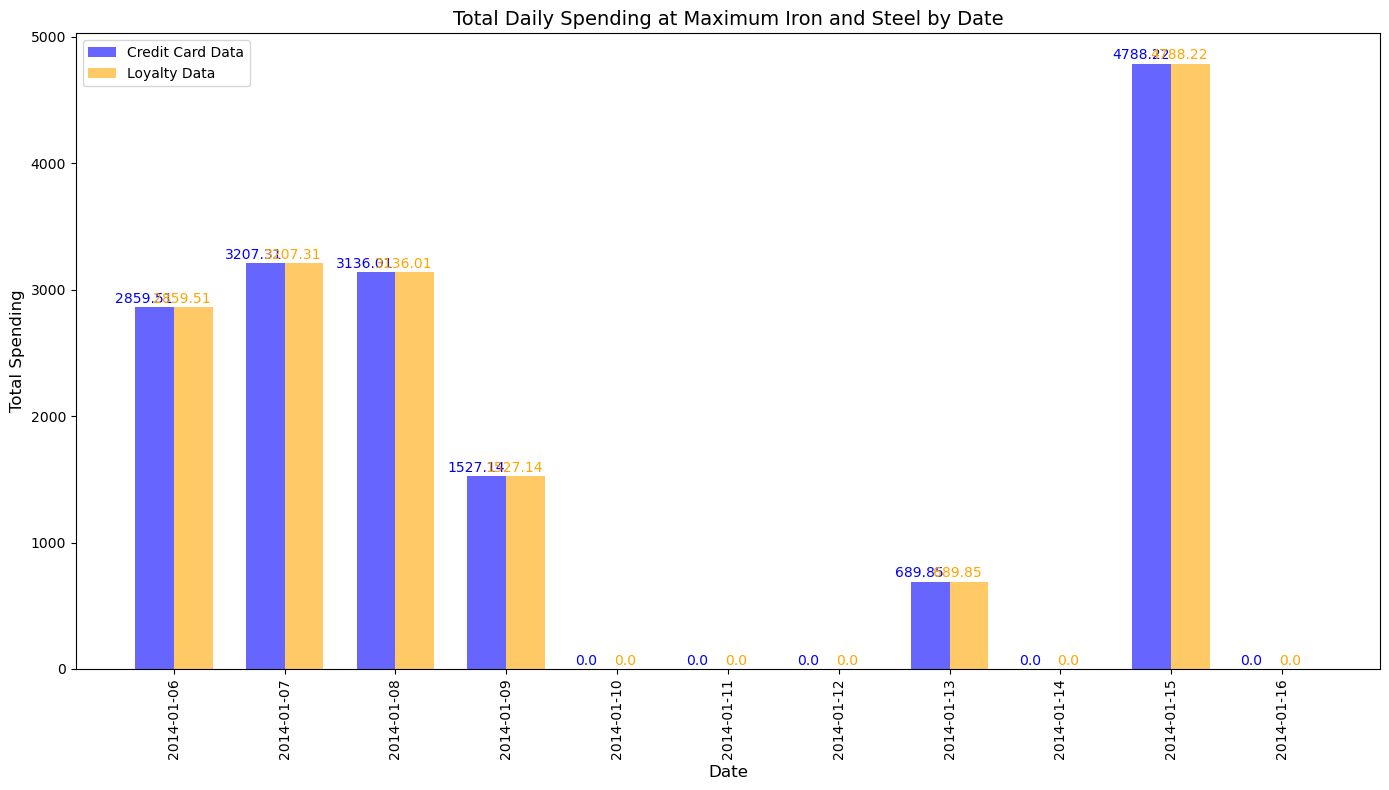

<Figure size 640x480 with 0 Axes>

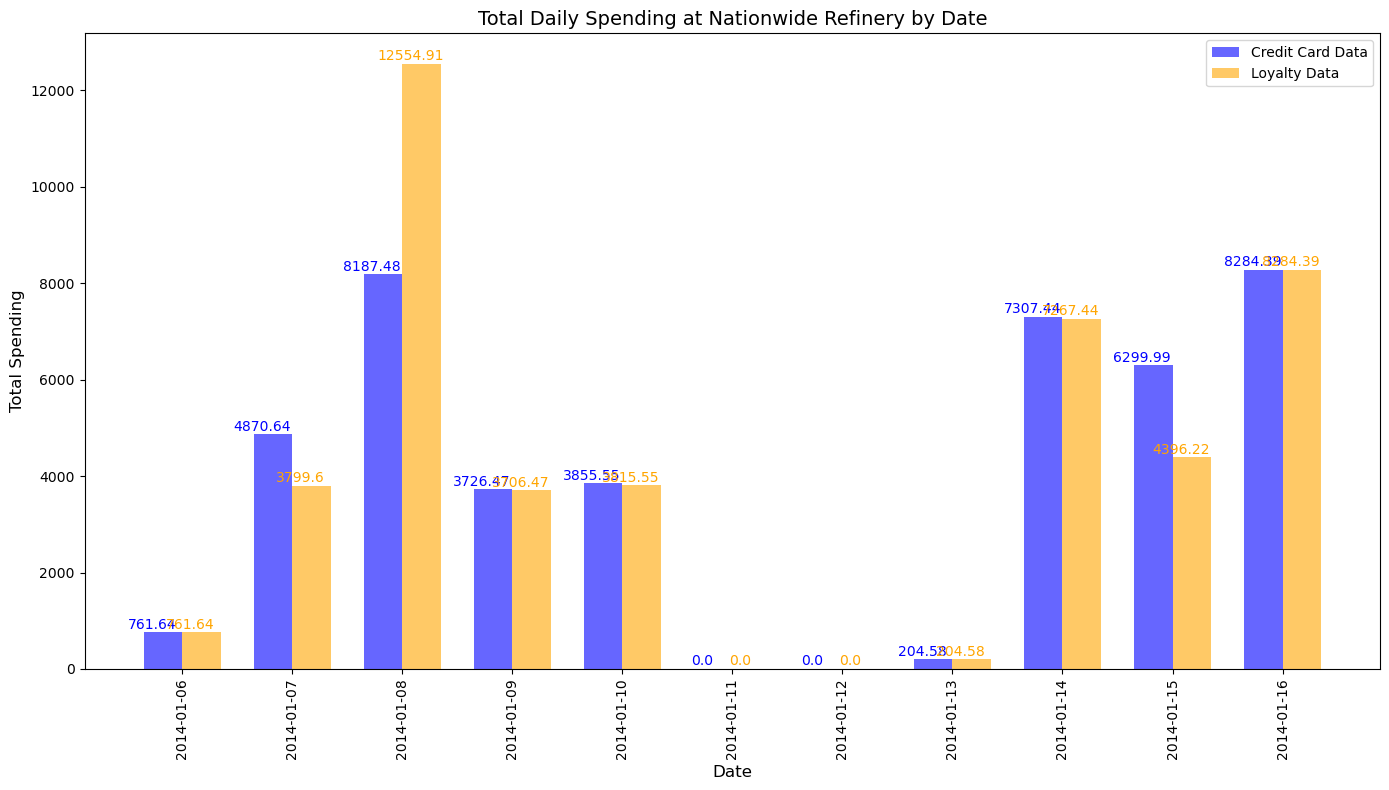

<Figure size 640x480 with 0 Axes>

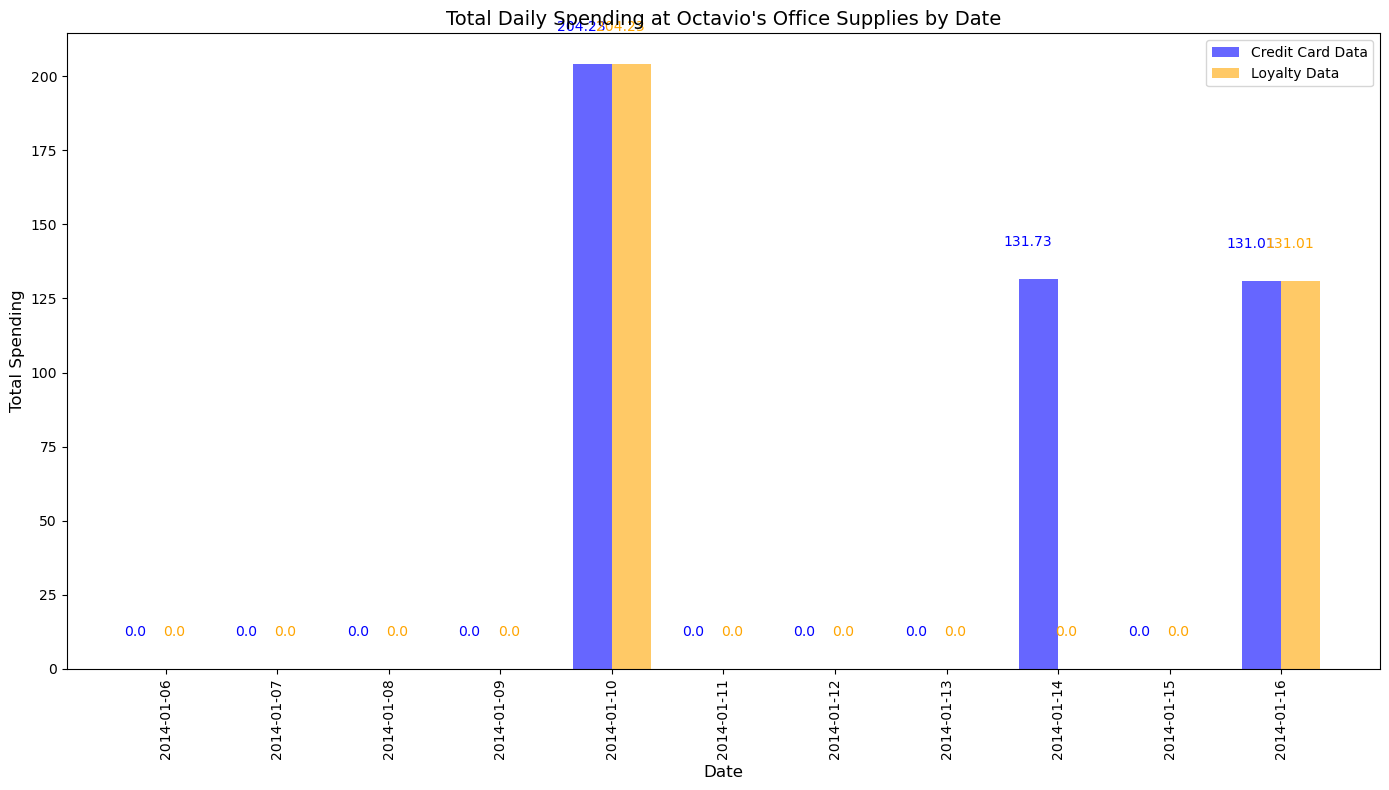

<Figure size 640x480 with 0 Axes>

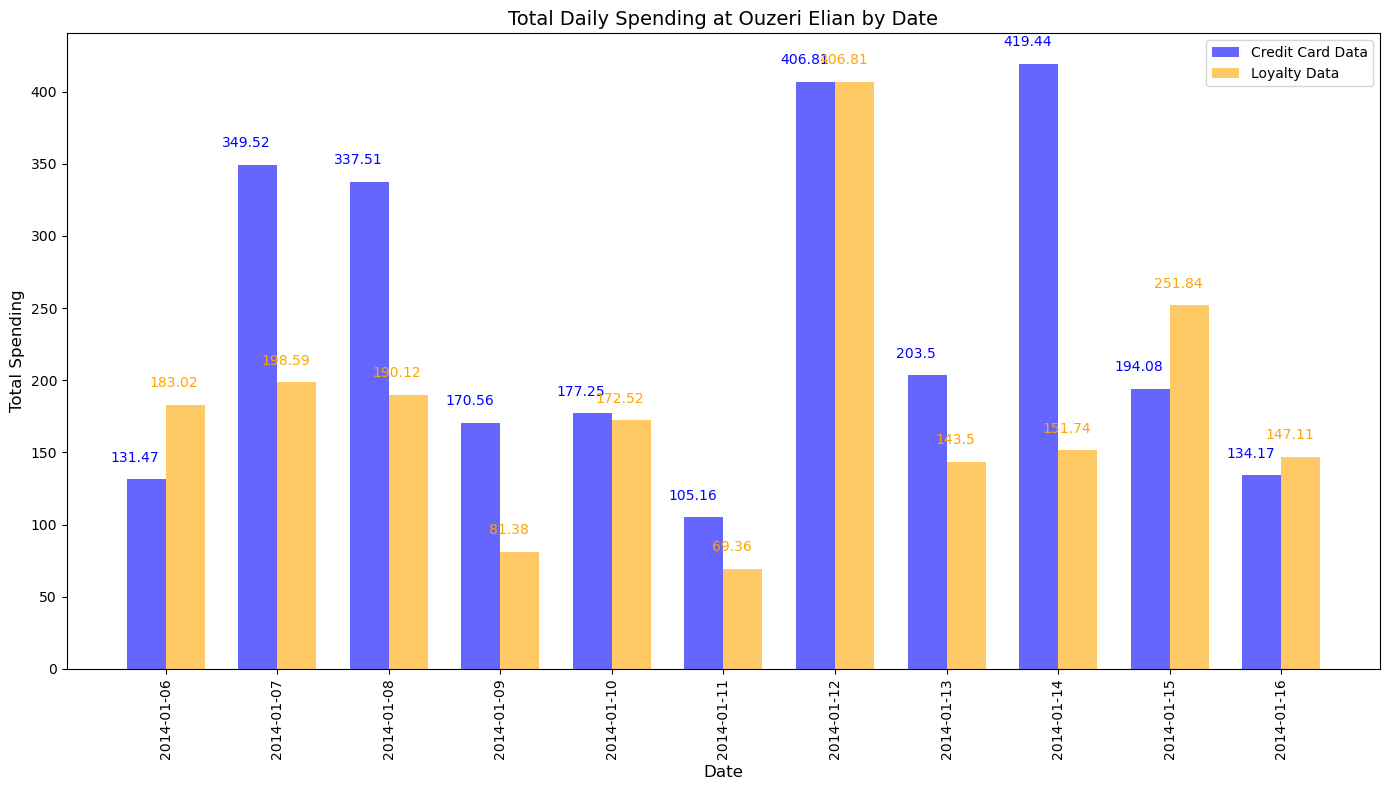

<Figure size 640x480 with 0 Axes>

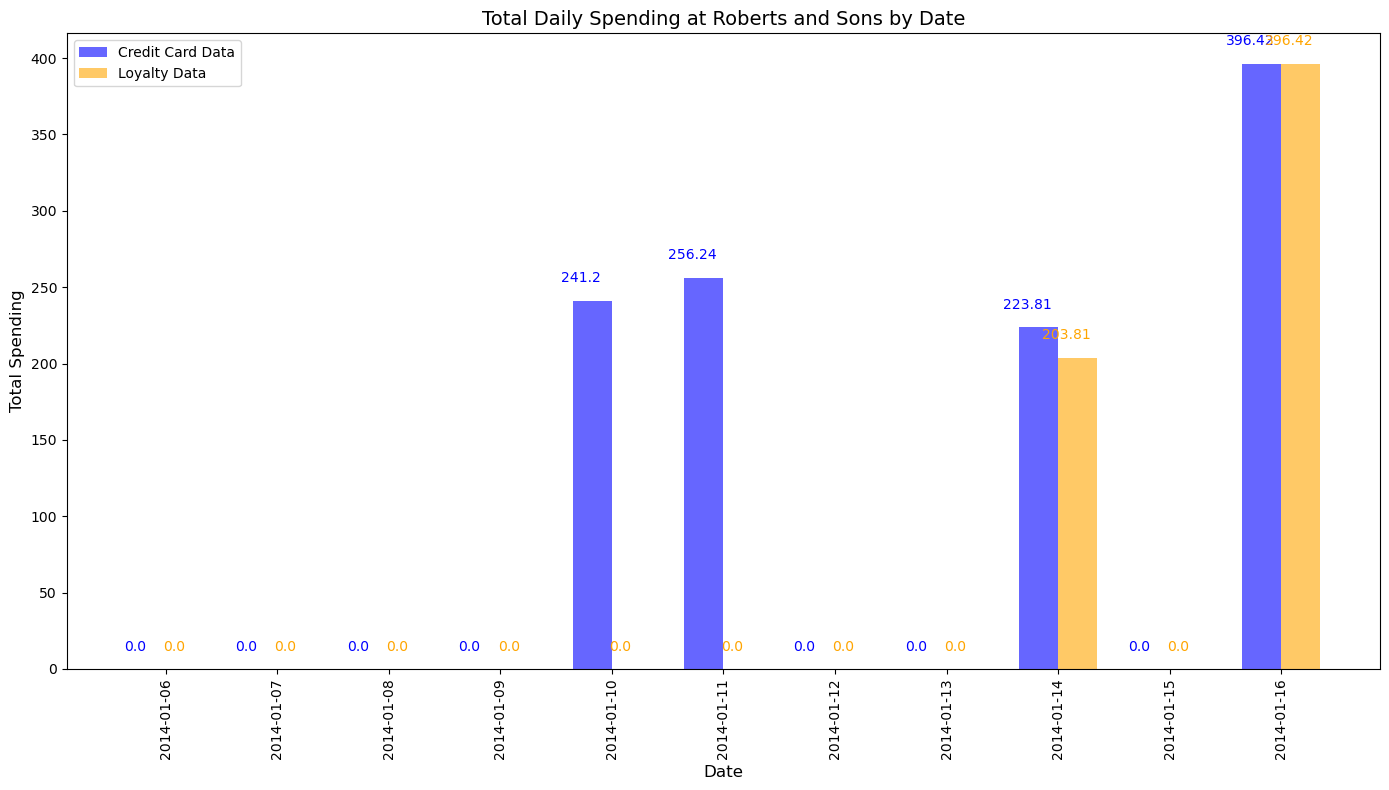

<Figure size 640x480 with 0 Axes>

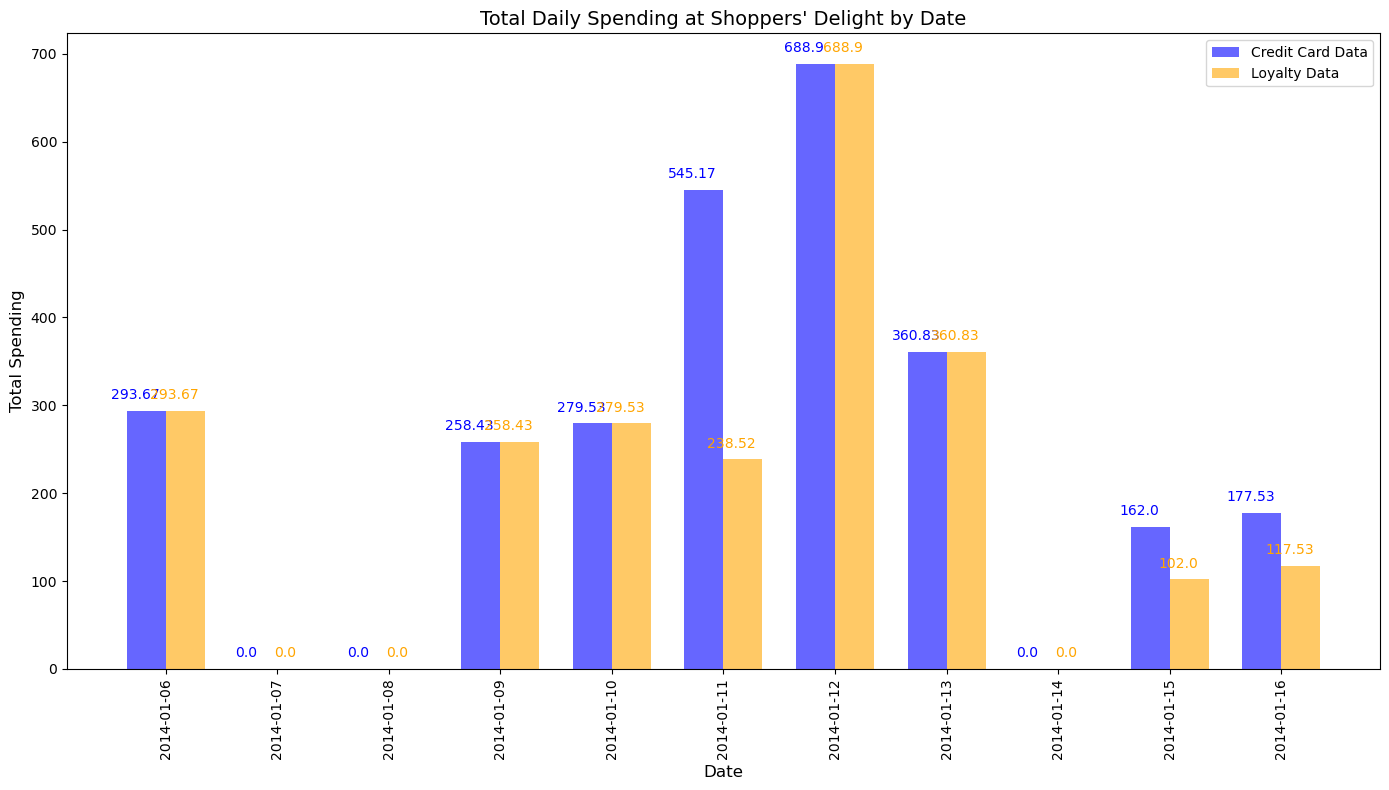

<Figure size 640x480 with 0 Axes>

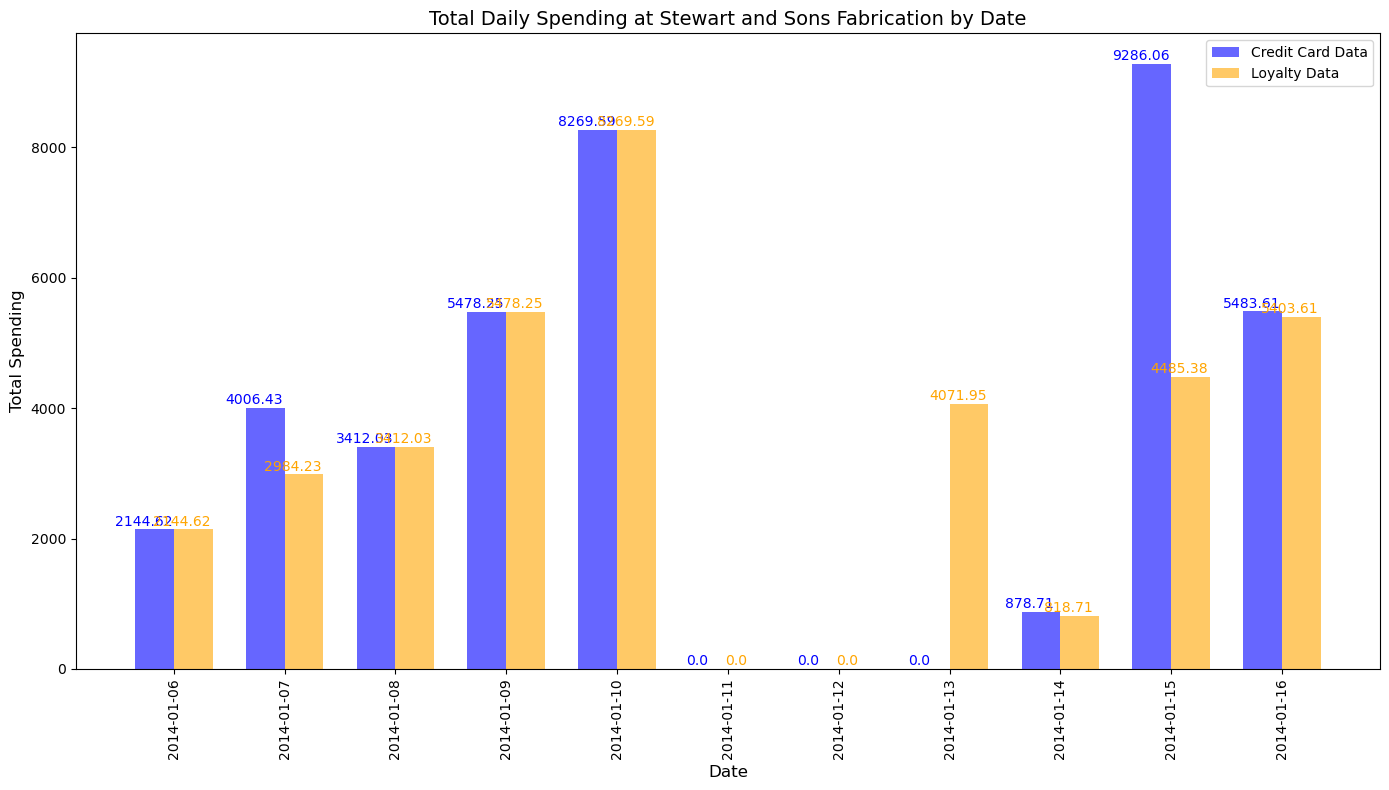

<Figure size 640x480 with 0 Axes>

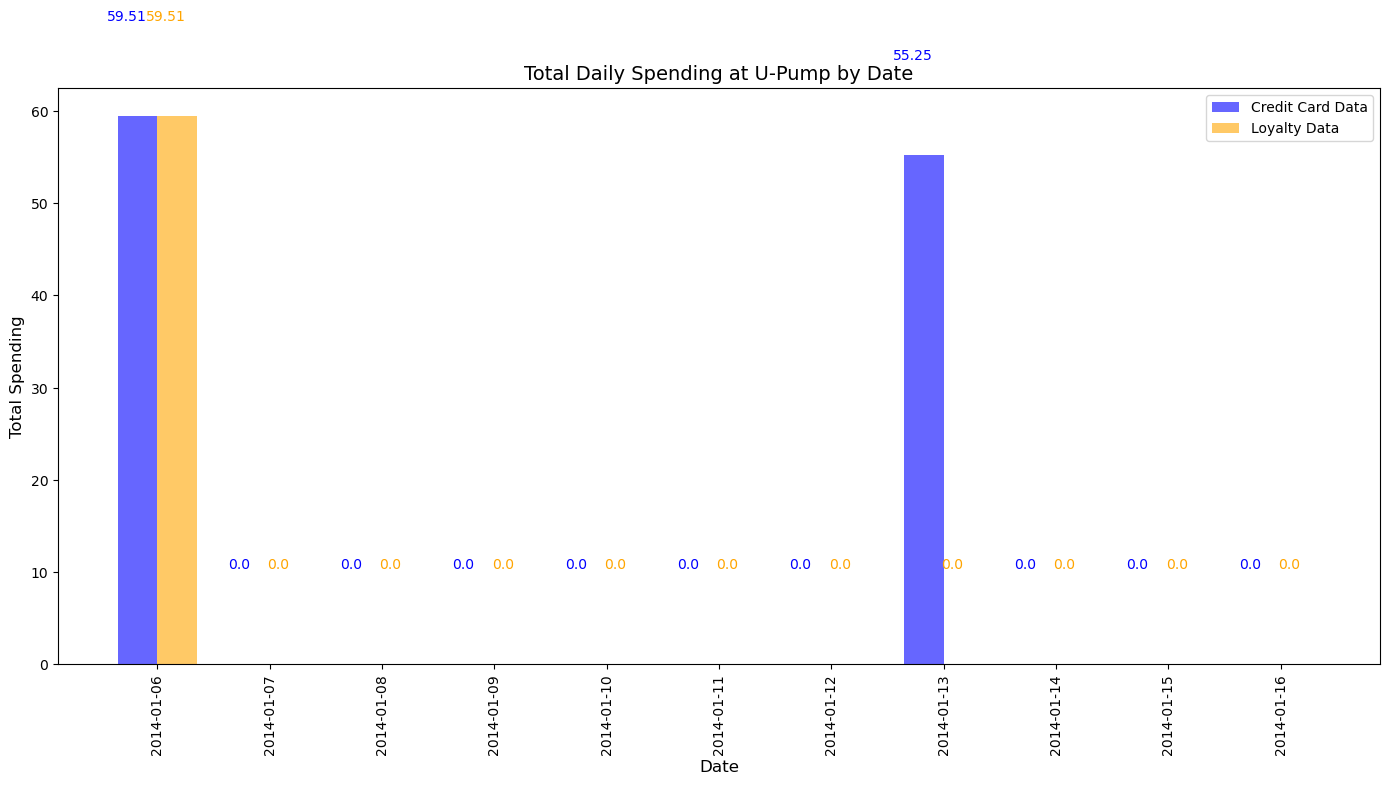

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cc_data['timestamp'] = pd.to_datetime(cc_data['timestamp'])
loyalty_data['timestamp'] = pd.to_datetime(loyalty_data['timestamp'])

cc_data['date'] = cc_data['timestamp'].dt.date
loyalty_data['date'] = loyalty_data['timestamp'].dt.date

loyalty_data['date'] = loyalty_data['timestamp'].dt.date
locations_cc = cc_data['location'].unique()
locations_loyalty = loyalty_data['location'].unique()
all_locations = np.union1d(locations_cc, locations_loyalty)

def plot_daily_spending(location):
    location_cc = cc_data[cc_data['location'] == location]
    location_loyalty = loyalty_data[loyalty_data['location'] == location]
    daily_spending_cc = location_cc.groupby('date')['price'].sum().reset_index()
    daily_spending_cc.rename(columns={'price': 'TotalSpending_cc'}, inplace=True)
    daily_spending_loyalty = location_loyalty.groupby('date')['price'].sum().reset_index()
    daily_spending_loyalty.rename(columns={'price': 'TotalSpending_loyalty'}, inplace=True)

    all_dates = pd.date_range(start='2014-01-06', end='2014-01-16')
    daily_spending_cc = daily_spending_cc.set_index('date').reindex(all_dates).fillna(0).reset_index().rename(columns={'index': 'date'})
    daily_spending_loyalty = daily_spending_loyalty.set_index('date').reindex(all_dates).fillna(0).reset_index().rename(columns={'index': 'date'})

    daily_spending_combined = pd.merge(
        daily_spending_cc,
        daily_spending_loyalty,
        on='date',
        suffixes=('_cc', '_loyalty')
    )

    fig, ax = plt.subplots(figsize=(14, 8))

    bar_width = 0.35
    index = np.arange(len(daily_spending_combined))

    bar1 = index
    bar2 = index + bar_width

    bars1 = plt.bar(
        bar1,
        daily_spending_combined['TotalSpending_cc'],
        width=bar_width,
        label='Credit Card Data',
        alpha=0.6,
        color='b'
    )

    bars2 = plt.bar(
        bar2,
        daily_spending_combined['TotalSpending_loyalty'],
        width=bar_width,
        label='Loyalty Data',
        alpha=0.6,
        color='orange'
    )

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Spending', fontsize=12)
    plt.title(f'Total Daily Spending at {location} by Date', fontsize=14)
    plt.xticks(index + bar_width / 2, daily_spending_combined['date'].dt.strftime('%Y-%m-%d'), rotation=90)
    plt.legend()

    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 10, round(yval, 2), fontsize=10, color='blue', ha='center', va='bottom')
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 10, round(yval, 2), fontsize=10, color='orange', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    plt.savefig(f'{location}_spending.png')

for location in all_locations:
    plot_daily_spending(location)


Loyalty card is  a preset rewards card that most of the employees use when they make a business purchase, sometimes the loyalty card data or transactions get updated the next day. But Transactions where loyalty card is not all used should be flagged and are worth further examining.

In [28]:
specific_date = pd.to_datetime('2014-01-07').date()
location_cc_carlyle = cc_data[(cc_data['location'] == 'Carlyle Chemical Inc.') & (cc_data['date'] == specific_date)]
location_loyalty_carlyle = loyalty_data[(loyalty_data['location'] == 'Carlyle Chemical Inc.') & (loyalty_data['date'] == specific_date)]
location_cc_carlyle, location_loyalty_carlyle

(              timestamp               location    price FirstName LastName  \
 220 2014-01-07 14:34:00  Carlyle Chemical Inc.  4803.13   Valeria   Morlun   
 
            date  
 220  2014-01-07  ,
      timestamp               location   price FirstName LastName        date
 433 2014-01-07  Carlyle Chemical Inc.  3827.2   Valeria   Morlun  2014-01-07)

Anamoly 3

In [29]:
abila_airport_2014_01_10 = cc_data[(cc_data['location'] == 'Abila Airport') & (cc_data['date'] == pd.to_datetime('2014-01-10').date())]
abila_airport_2014_01_10_sorted = abila_airport_2014_01_10.sort_values(by='price', ascending=False)
abila_airport_2014_01_10_sorted
#anamoly 4

timestamp       location    price FirstName LastName        date
541 2014-01-10 07:59:00  Abila Airport  4039.36   Claudio  Hawelon  2014-01-10

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/3958075527.py:11: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


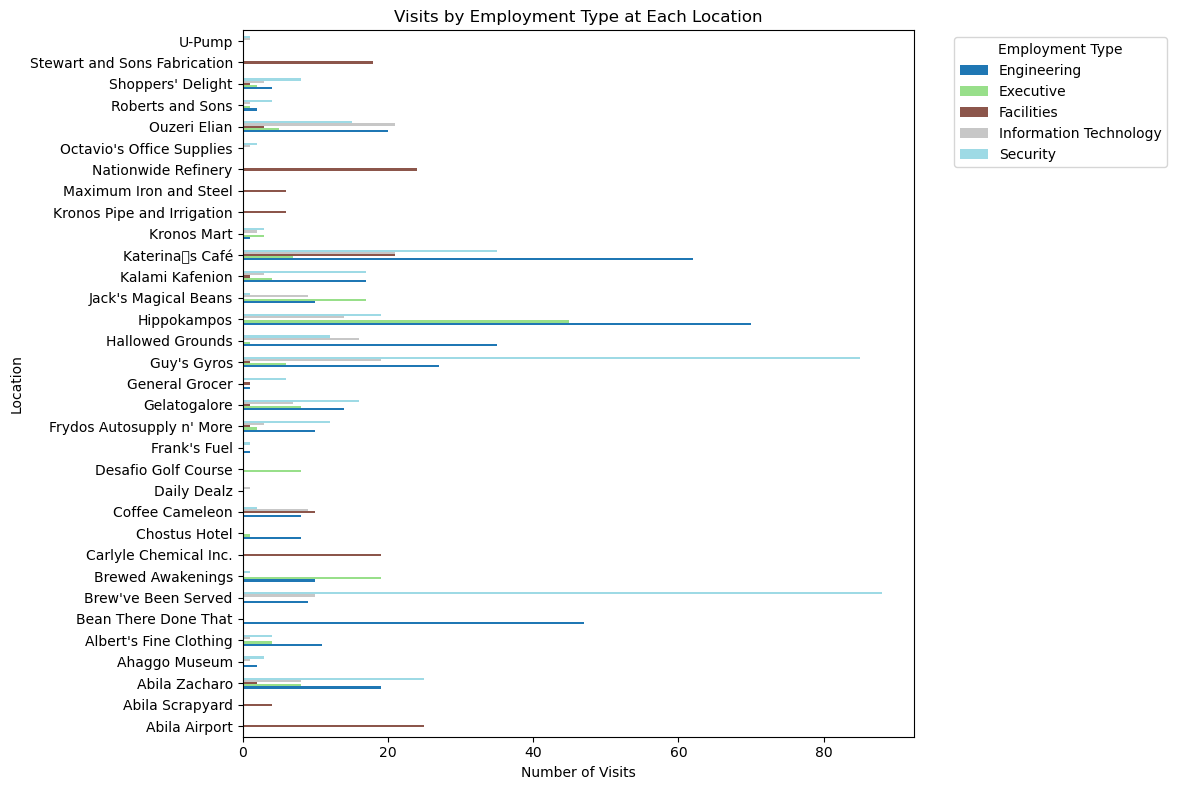

In [31]:
visit_counts = merged_cc.groupby(['location', 'CurrentEmploymentType']).size().unstack().fillna(0)
visit_counts.plot(kind='barh', stacked=False, figsize=(12, 8), colormap='tab20')
plt.xlabel('Number of Visits')
plt.ylabel('Location')
plt.title('Visits by Employment Type at Each Location')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [37]:
cc_data['Timestamp'] = pd.to_datetime(cc_data['timestamp'])
merged_cc_assignments = pd.merge(cc_data, car_assignments, on=['FirstName', 'LastName'])

it_security_visits_upump = merged_cc_assignments[(merged_cc_assignments['location'] == 'U-Pump') & 
                                                 (merged_cc_assignments['CurrentEmploymentType'].isin([ 'Security']))]
it_security_visits_upump_unique = it_security_visits_upump[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'Timestamp','CarID']].drop_duplicates()
print(it_security_visits_upump_unique)
#anomaly 5

    FirstName LastName CurrentEmploymentType location  price  \
403     Varja    Lagos              Security   U-Pump  59.51   

              Timestamp  CarID  
403 2014-01-06 17:28:00   23.0  


In [39]:
it_security_visits_octavio = merged_cc_assignments[(merged_cc_assignments['location'] == "Octavio's Office Supplies") & 
                                                 (merged_cc_assignments['CurrentEmploymentType'].isin(['Information Technology']))]

it_security_visits_octavio_unique = it_security_visits_octavio[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'Timestamp','CarID']].drop_duplicates()

# Display the results
print(it_security_visits_octavio_unique)
#anomaly 6

    FirstName LastName   CurrentEmploymentType                   location  \
169    Linnea   Bergen  Information Technology  Octavio's Office Supplies   

     price           Timestamp  CarID  
169  64.51 2014-01-10 16:07:00    6.0  


In [42]:
engineering_security_visits_franks = merged_cc_assignments[(merged_cc_assignments['location'] == "Frank's Fuel") & 
                                                           (merged_cc_assignments['CurrentEmploymentType'].isin(['Engineering', 'Security']))]

engineering_security_visits_franks_unique = engineering_security_visits_franks[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'Timestamp','CarID']].drop_duplicates()

print(engineering_security_visits_franks_unique)
#anomaly7

    FirstName LastName CurrentEmploymentType      location  price  \
508    Loreto  Bodrogi              Security  Frank's Fuel  65.34   
967     Felix    Balas           Engineering  Frank's Fuel  52.66   

              Timestamp  CarID  
508 2014-01-08 12:29:00   15.0  
967 2014-01-18 18:39:00    3.0  


In [46]:
it_security_visits_daily = merged_cc_assignments[(merged_cc_assignments['location'] == "Daily Dealz") & 
                                                 (merged_cc_assignments['CurrentEmploymentType'].isin(['Information Technology']))]

it_security_visits_daily_unique = it_security_visits_daily[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'Timestamp','CarID']].drop_duplicates()
print(it_security_visits_daily_unique)
#anomaly 8

    FirstName LastName   CurrentEmploymentType     location  price  \
387     Lucas  Alcazar  Information Technology  Daily Dealz   2.01   

              Timestamp  CarID  
387 2014-01-13 06:04:00    1.0  


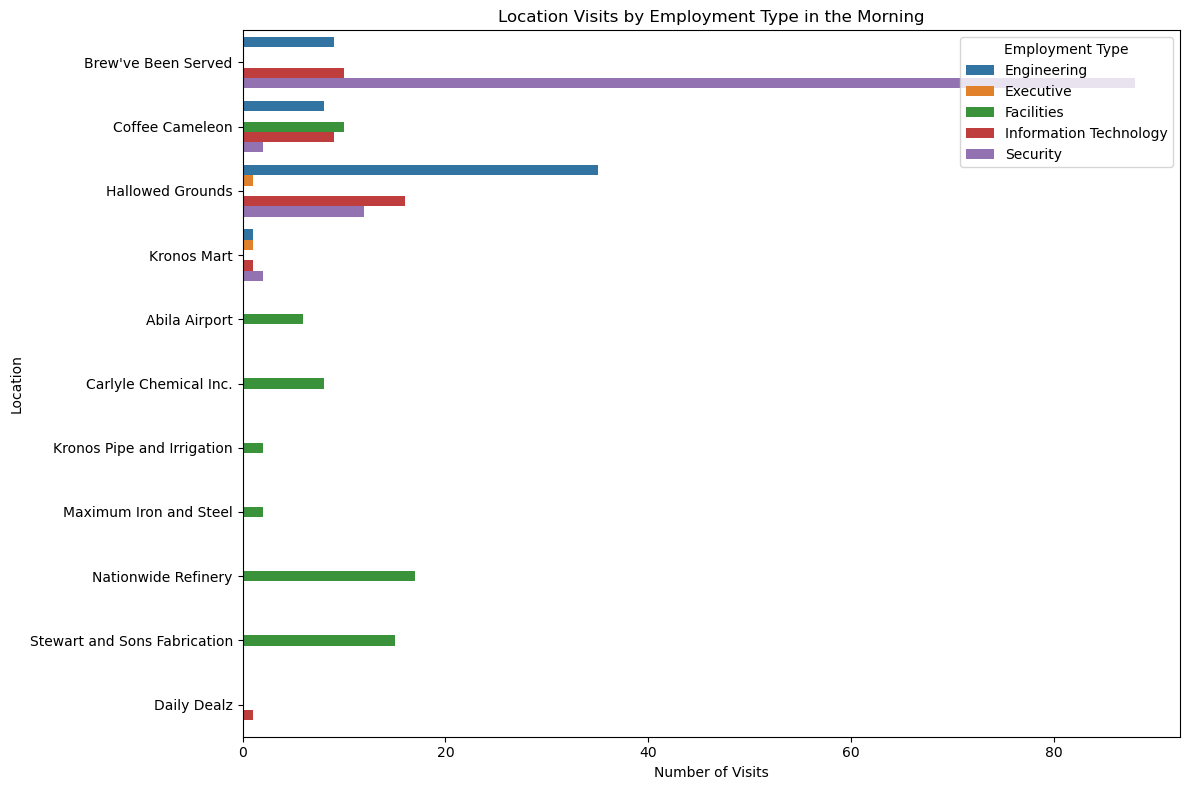

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'location_visits_{period}.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


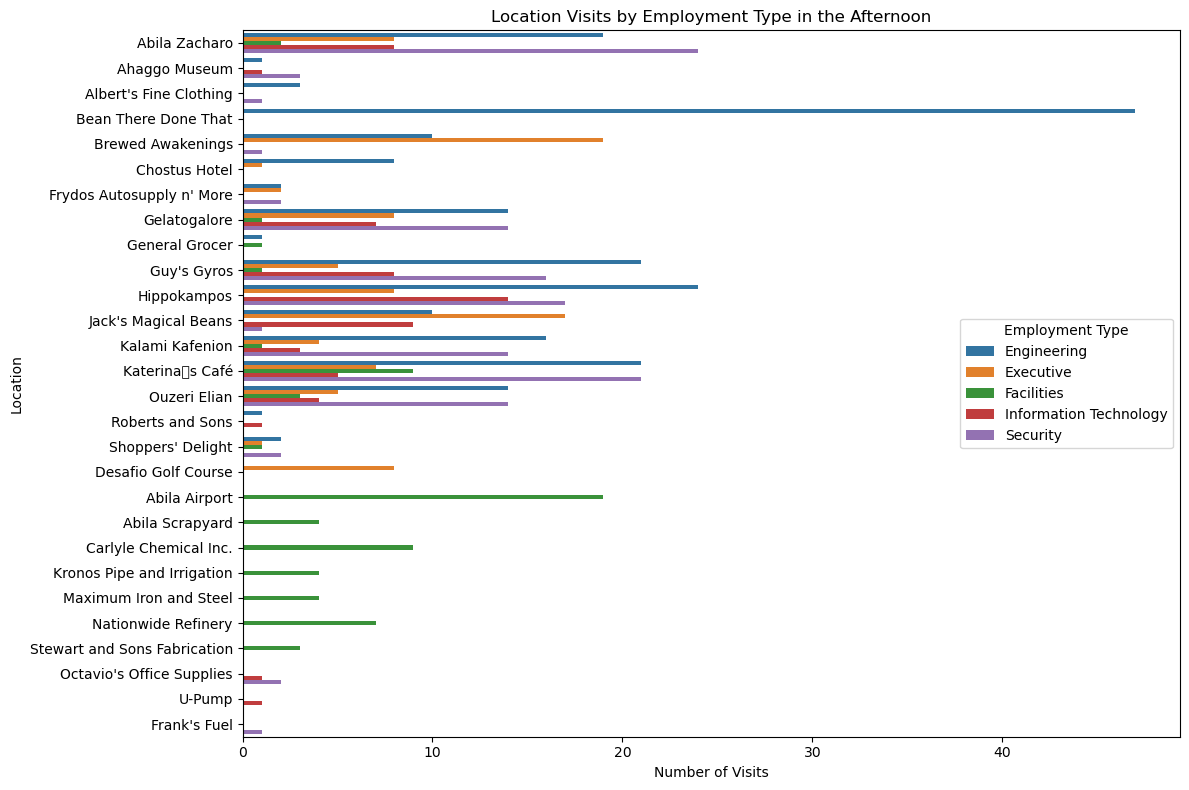

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'location_visits_{period}.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


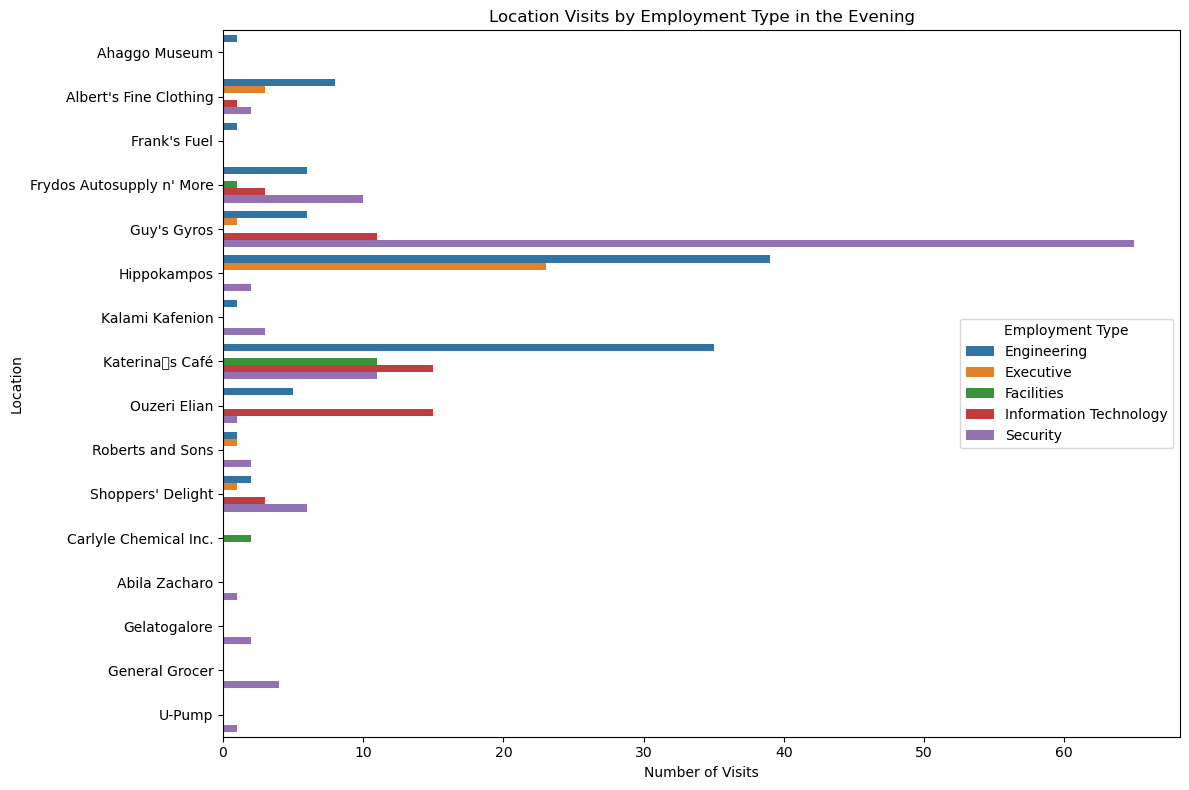

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:13: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1531793402.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(f'location_visits_{period}.png')
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


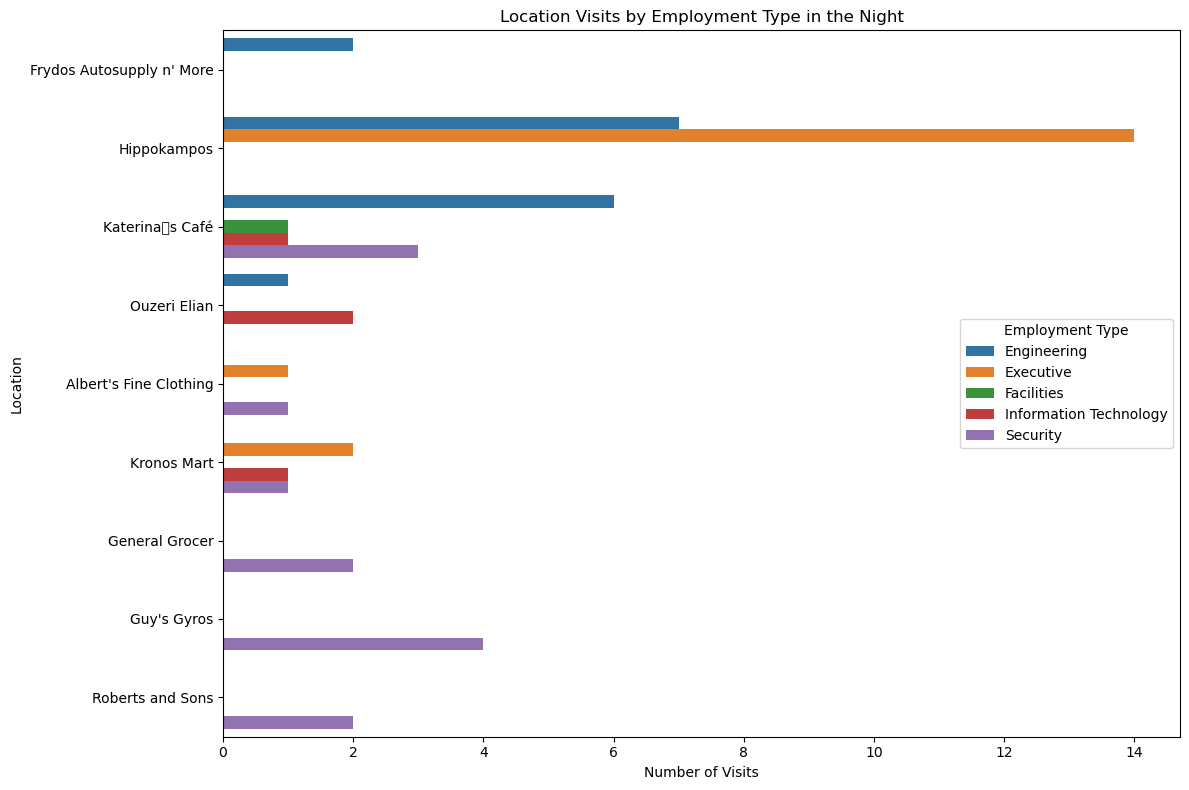

In [48]:
location_counts = merged_cc.groupby(['CurrentEmploymentType', 'time_of_day', 'location']).size().reset_index(name='count')

time_of_day_periods = ['morning', 'afternoon', 'evening', 'night']

for period in time_of_day_periods:
    plt.figure(figsize=(12, 8))
    data = location_counts[location_counts['time_of_day'] == period]
    sns.barplot(x='count', y='location', hue='CurrentEmploymentType', data=data)
    plt.title(f'Location Visits by Employment Type in the {period.capitalize()}')
    plt.xlabel('Number of Visits')
    plt.ylabel('Location')
    plt.legend(title='Employment Type')
    plt.tight_layout()
    plt.savefig(f'location_visits_{period}.png')
    plt.show()

In [55]:
alberts_night_visits = merged_cc[
    (merged_cc['location'] == "Albert's Fine Clothing") & 
    (merged_cc['time_of_day'] == 'night') & 
    (merged_cc['CurrentEmploymentType'].isin([ 'Security']))
]

unique_employees = alberts_night_visits[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'timestamp','CarID']]

unique_employees
#anomaly 9

FirstName LastName CurrentEmploymentType                location   price  \
122     Minke     Mies              Security  Albert's Fine Clothing  121.76   

              timestamp  CarID  
122 2014-01-06 21:03:00   24.0

In [57]:
shoppers_visits = merged_cc[
    (merged_cc['location'] == "Shoppers' Delight") & 
    (merged_cc['time_of_day'] == 'afternoon') & 
    (merged_cc['CurrentEmploymentType'].isin([ 'Executive']))
]

shoppers_employees = shoppers_visits[['FirstName', 'LastName', 'CurrentEmploymentType', 'location', 'price', 'timestamp','CarID']]

shoppers_employees
#anomaly 10

FirstName LastName CurrentEmploymentType           location   price  \
1400     Orhan    Strum             Executive  Shoppers' Delight  258.33   

               timestamp  CarID  
1400 2014-01-18 15:40:00   32.0

In [60]:
carid_nan_data = merged_cc_assignments[merged_cc_assignments['CarID'].isna()]
print(carid_nan_data)


               timestamp                      location    price FirstName  \
636  2014-01-06 08:23:00                 Abila Airport  4540.08    Albina   
637  2014-01-06 09:06:00    Kronos Pipe and Irrigation   242.21    Albina   
638  2014-01-06 10:18:00        Maximum Iron and Steel  2859.51    Albina   
639  2014-01-06 11:57:00         Carlyle Chemical Inc.  3959.66    Albina   
640  2014-01-06 15:14:00                 Abila Airport   777.06    Albina   
...                  ...                           ...      ...       ...   
1174 2014-01-15 11:18:00  Stewart and Sons Fabrication  4545.38      Adan   
1175 2014-01-10 07:59:00                 Abila Airport  4039.36   Claudio   
1176 2014-01-10 09:09:00         Carlyle Chemical Inc.   227.81   Claudio   
1177 2014-01-10 10:40:00           Nationwide Refinery  2302.73   Claudio   
1178 2014-01-10 12:10:00  Stewart and Sons Fabrication  4195.49   Claudio   

     LastName        date           Timestamp  CarID CurrentEmploymentType 

/var/folders/lh/1wrj86xn1bn82gyyvk02kl_40000gn/T/ipykernel_30626/1297497004.py:12: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


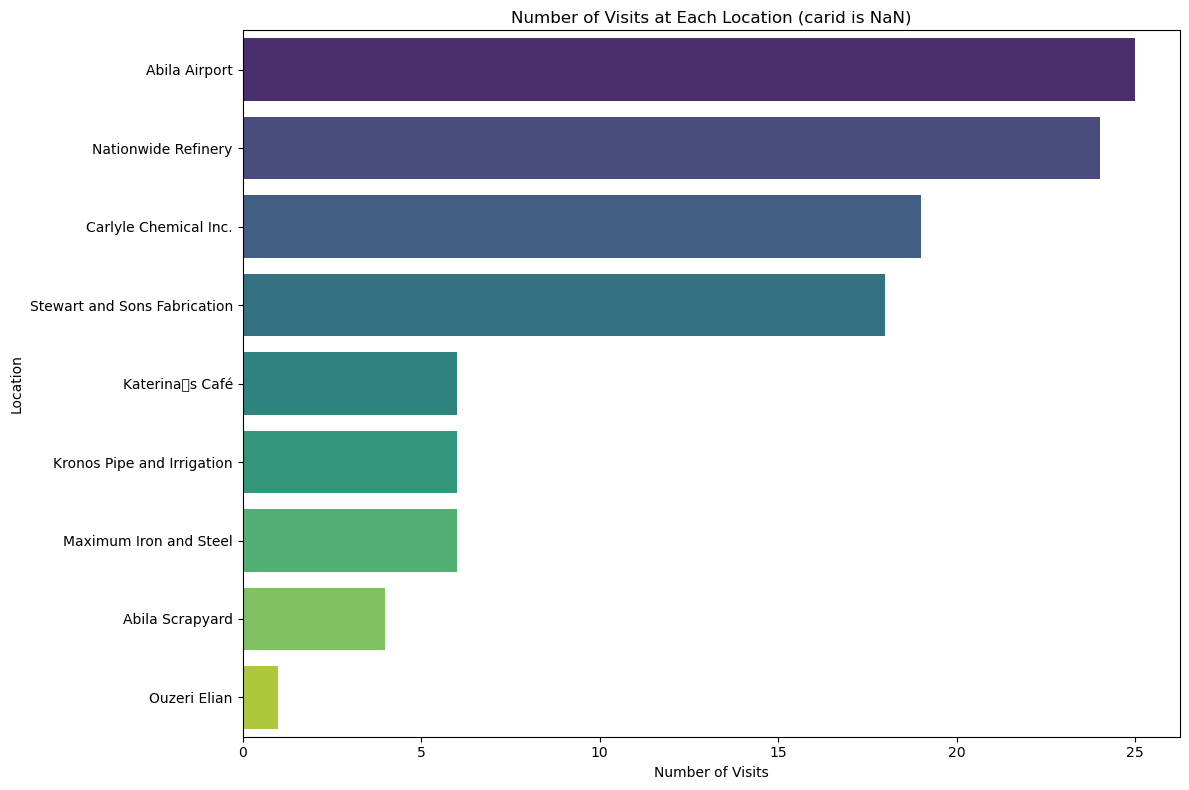

In [61]:
location_counts_nan = carid_nan_data.groupby('location').size().reset_index(name='count')

location_counts_nan = location_counts_nan.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='location', data=location_counts_nan, palette='viridis')
plt.title('Number of Visits at Each Location (carid is NaN)')
plt.xlabel('Number of Visits')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

In [63]:
katrinas_cafe_visits = carid_nan_data[carid_nan_data['location'] == "Katerina\x92s Café"]

print(katrinas_cafe_visits)
#anomaly 11

               timestamp         location  price FirstName LastName  \
1125 2014-01-07 13:08:00  Katerinas Café  59.07   Valeria   Morlun   
1128 2014-01-08 13:19:00  Katerinas Café  29.26   Valeria   Morlun   
1132 2014-01-09 13:23:00  Katerinas Café  16.98   Valeria   Morlun   
1137 2014-01-14 13:21:00  Katerinas Café  34.45   Valeria   Morlun   
1142 2014-01-15 13:13:00  Katerinas Café  24.15   Valeria   Morlun   
1147 2014-01-16 13:23:00  Katerinas Café  34.90   Valeria   Morlun   

            date           Timestamp  CarID CurrentEmploymentType  \
1125  2014-01-07 2014-01-07 13:08:00    NaN            Facilities   
1128  2014-01-08 2014-01-08 13:19:00    NaN            Facilities   
1132  2014-01-09 2014-01-09 13:23:00    NaN            Facilities   
1137  2014-01-14 2014-01-14 13:21:00    NaN            Facilities   
1142  2014-01-15 2014-01-15 13:13:00    NaN            Facilities   
1147  2014-01-16 2014-01-16 13:23:00    NaN            Facilities   

     CurrentEmploy

In [64]:
ouzeri_visits = carid_nan_data[carid_nan_data['location'] == "Ouzeri Elian"]

print(ouzeri_visits)
#anomaly 12

              timestamp      location  price FirstName LastName        date  \
645 2014-01-13 12:55:00  Ouzeri Elian  19.82    Albina    Hafon  2014-01-13   

              Timestamp  CarID CurrentEmploymentType CurrentEmploymentTitle  
645 2014-01-13 12:55:00    NaN            Facilities           Truck Driver  
